<a href="https://colab.research.google.com/github/o-semenkova/ml_home_tasks/blob/main/Credit%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому ноутбуці ми проведемо дослідницький аналіз даних про історичні платежі по кредитам клієнтами.

[Опис колонок в даних тут.](https://drive.google.com/file/d/1Yp2aOdC33QFAVfTyxav_gKGwi4M9VN1Z/view?usp=sharing)

Цільова змінна TARGET тут має наступне значення: 1 – клієнт із труднощами з оплатою: він/вона прострочив платіж понад X днів принаймні одного з перших Y платежів кредиту в нашій вибірці, 0 – усі інші випадки

Задача - виявити, яким клієнтам видавати кредит, а яким - не варто, бо вони з високою імовірністю його не повернуть.

Дані взяті з [Kaggle](https://www.kaggle.com/datasets/gauravduttakiit/loan-defaulter). Прошу використовувати саме ті, які надані в нашому курсі, аби нам бути впевненими, що ми точно працюємо з одними і тими ж даними.

# Імпорт необхідних бібліотек

In [7]:
pip install seaborn

In [8]:
pip install matplotlib

In [9]:
pip install numpy

In [10]:
pip install pandas

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

# Імпорт даних

Вмонтуємо наш диск, якщо Ви працюєте в Google Colab. Якщо працюєте локально, пропустіть наступну клітинку.

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Знайдемо, де лежать наші файли з даними. В мене вони знаходяться тут:

In [13]:
!ls 'drive/MyDrive/colab_notebooks/machine-learning-by-hanna-pylieva/ml-course-notebooks/data/credit'

application_data.csv.zip  application_data_processed.zip  columns_description.csv


Якщо треба зчитати опис, то робимо це аналогічно.

In [14]:
# Place of data on the local machine
# descr = pd.read_csv("/Users/oksana/Documents/pylieva-ml-course/data/Credit-EDA/columns_description.csv")

# Place of data on the Google Drive
descr = pd.read_csv("drive/MyDrive/colab_notebooks/machine-learning-by-hanna-pylieva/ml-course-notebooks/data/credit/columns_description.csv")

In [15]:
descr.loc[1].Description

'Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)'

Зчитуємо дані.

In [16]:
df = pd.read_csv("drive/MyDrive/colab_notebooks/machine-learning-by-hanna-pylieva/ml-course-notebooks/data/credit/application_data.csv.zip")

# df = pd.read_csv("/Users/oksana/Documents/pylieva-ml-course/data/Credit-EDA/application_data.csv.zip")

In [17]:
# Огляд декількох записів з датафрейму
df.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0         202500.00   406597.50     24700.50   
1               N             0         270000.00  1293502.50     35698.50   
2               Y             0          67500.00   135000.00      6750.00   
3               Y             0         135000.00   312682.50     29686.50   
4               Y             0         121500.00   513000.00     21865.50   
5               Y             0          99000.00   490495.50     27517.50   
6               Y             1         171000.00  1560726.00     41301.00   
7               Y             0         360000.00  1530000.00     42075.00   
8               Y             0         112500.00  1019610.00     33826.50   
9               Y             0         135000.00   405000.00     20250.00   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0        351000.00    Unaccompanied               Working   
1       1129500.00           Family         State servant   
2        135000.00    Unaccompanied               Working   
3        297000.00    Unaccompanied               Working   
4        513000.00    Unaccompanied               Working   
5        454500.00  Spouse, partner         State servant   
6       1395000.00    Unaccompanied  Commercial associate   
7       1530000.00    Unaccompanied         State servant   
8        913500.00         Children             Pensioner   
9        405000.00    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                        0.02       -9461           -637           -3648.00   
1                        0.00      -16765          -1188           -1186.00   
2                        0.01      -19046           -225           -4260.00   
3                        0.01      -19005          -3039           -9833.00   
4                        0.03      -19932          -3038           -4311.00   
5                        0.04      -16941          -1588           -4970.00   
6                        0.04      -13778          -3130           -1213.00   
7                        0.00      -18850           -449           -4597.00   
8                        0.02      -20099         365243           -7427.00   
9                        0.02      -14469          -2019          -14437.0

# Перевірка структури даних

In [18]:
df.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [19]:
df.shape

(307511, 122)

Маємо ~307k рядків та 122 колонки.

## Статистичний звіт для числових змінних

In [20]:
df.describe()

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count   307511.00 307511.00     307511.00         307511.00   307511.00   
mean    278180.52      0.08          0.42         168797.92   599026.00   
std     102790.18      0.27          0.72         237123.15   402490.78   
min     100002.00      0.00          0.00          25650.00    45000.00   
25%     189145.50      0.00          0.00         112500.00   270000.00   
50%     278202.00      0.00          0.00         147150.00   513531.00   
75%     367142.50      0.00          1.00         202500.00   808650.00   
max     456255.00      1.00         19.00      117000000.00  4050000.00   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count    307499.00        307233.00                   307511.00   307511.00   
mean      27108.57        538396.21                        0.02   -16037.00   
std       14493.74        369446.46                        0.01     4363.99   
min        1615.50         40500.00                        0.00   -25229.00   
25%       16524.00        238500.00                        0.01   -19682.00   
50%       24903.00        450000.00                        0.02   -15750.00   
75%       34596.00        679500.00                        0.03   -12413.00   
max      258025.50       4050000.00                        0.07    -7489.00   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
count      307511.00          307511.00        307511.00    104582.00   
mean        63815.05           -4986.12         -2994.20        12.06   
std        141275.77            3522.89          1509.45        11.94   
min        -17912.00          -24672.00         -7197.00         0.00   
25%         -2760.00           -7479.50         -4299.00         5.00   
50%         -1213.00           -4504.00         -3254.00         9.00   
75%          -289.00           -2010.00         -1720.00        15.00   
max        365243.00               0.00             0.00        91.00   

       FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count   307511.00       307511.00        307511.00         307511.00   
mean         1.00            0.82             0.20              1.00   
std          0.00            0.38             0.40              0.04   
min          0.00            0.00             0.00              0.00   
25%          1.00            1.00             0.00              1.00   
50%          1.00            1.00             0.00              1.00   
75%          1.00            1.00             0.00              1.00   
max          1.00            1.00             1.00              1.00   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count   307511.00   307511.00        307509.00             307511.00   
mean         0.28        0.06             2.15                  2.05   
std          0.45        0.23             0.91                  0.51   
min          0.00        0.00             1.00                  1.00   
25%          0.00        0.00             2.00                  2.00   
50%          0.00        0.00             2.00                  2.00   
75%          1.00        0.00             3.00                  2.00   
max          1.00        1.00            20.00                  3.00   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                    307511.00                307511.00   
mean                          2.03                    12.06   
std                           0.50                     3.27   
min                           1.00                     0.00   
25%                           2.00                    10.00   
50%                           2.00                    12.00   
75%                           2.00                    14.00   
max                           3.00                    23.00   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                   307511

# Аналіз категоріальних змінних

In [21]:
df.select_dtypes(include = "object").columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [22]:
# Перевірка кількості категоріальних змінних
len(df.select_dtypes(include = "object").columns)

16

Дані містять 16 `categorical` змінних

# Аналіз числових змінних

In [23]:
number_df = df.select_dtypes(include="number")

In [24]:
number_df.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [25]:
# Перевірка кількості числових змінних
len(number_df.columns)

106

Дані міятять 106 `numerical` змінних

In [26]:
number_df.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0         202500.00   406597.50   
1      100003       0             0         270000.00  1293502.50   
2      100004       0             0          67500.00   135000.00   
3      100006       0             0         135000.00   312682.50   
4      100007       0             0         121500.00   513000.00   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0     24700.50        351000.00                        0.02       -9461   
1     35698.50       1129500.00                        0.00      -16765   
2      6750.00        135000.00                        0.01      -19046   
3     29686.50        297000.00                        0.01      -19005   
4     21865.50        513000.00                        0.03      -19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0           -637           -3648.00            -2120          NaN           1   
1          -1188           -1186.00             -291          NaN           1   
2           -225           -4260.00            -2531        26.00           1   
3          -3039           -9833.00            -2437          NaN           1   
4          -3038           -4311.00            -3458          NaN           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0             1.00                     2                            2   
1             2.00                     1                            1   
2             1.00                     2                            2   
3             2.00                     2                            2   
4             1.00                     2                            2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0          0.08          0.26          0.14            0.02              0.04   
1          0.31          0.62           NaN            0.10              0.05   
2           NaN          0.56          0.73             NaN               NaN   
3           NaN          0.65           NaN             NaN               NaN   
4           NaN          0.32           NaN             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COM

# Робота з некоректними типами даних

Перевірка, чи немає у нас стовпця з неправильним типом даних

In [27]:
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64
FLAG_PHONE                        int64
FLAG_EMAIL                        int64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
WEEKDAY_APPR_PROCESS_START       object
HOUR_APPR_PROCESS_START           int64
REG_REGION_NOT_LIVE_REGION        int64
REG_REGION_NOT_WORK_REGION        int64
LIVE_REGION_NOT_WORK_REGION       int64
REG_CITY_NOT_LIVE_CITY            int64
REG_CITY_NOT_WORK_CITY            int64
LIVE_CITY_NOT_WORK_CITY           int64
ORGANIZATION_TYPE                object
EXT_SOURCE_1                    float64
EXT_SOURCE_2                    float64
EXT_SOURCE_3                    float64
APARTMENTS_AVG                  float64
BASEMENTAREA_AVG                float64
YEARS_BEGINEXPLUATATION_AVG     float64
YEARS_BUILD_AVG                 float64
COMMONAREA_AVG                  float64
ELEVATORS_AVG                   float64
ENTRANCES_AVG                   float64
FLOORSMAX_AVG                   float64
FLOORSMIN_AVG                   float64
LANDAREA_AVG                    float64
LIVINGAPARTMENTS_AVG            float64
LIVINGAREA_AVG                  float64
NONLIVINGAPARTMENTS_AVG         float64
NONLIVINGAREA_AVG               float64
APARTMENTS_MODE                 float64
BASEMENTAREA_MODE               float64
YEARS_BEGINEXPLUATATION_MODE    float64
YEARS_BUILD_MODE                float64
COMMONAREA_MODE                 float64
ELEVATORS_MODE                  float64
ENTRANCES_MODE                  float64
FLOORSMAX_MODE                  float64
FLOORSMIN_MODE                  float64
LANDAREA_MODE                   float64
LIVINGAPARTMENTS_MODE           float64
LIVINGAREA_MODE                 float64
NONLIVINGAPARTMENTS_MODE        float64
NONLIVINGAREA_MODE              float64
APARTMENTS_MEDI                 float64
BASEMENTAREA_MEDI               float64
YEARS_BEGINEXPLUATATION_MEDI    float64
YEARS_BUILD_MEDI                float64
COMMONAREA_MEDI                 float64
ELEVATORS_MEDI                  float64
ENTRANCES_MEDI                  float64
FLOORSMAX_MEDI                  float64
FLOORSMIN_MEDI                  float64
LANDAREA_MEDI                   float64
LIVINGAPARTMENTS_MEDI           float64
LIVINGAREA_MEDI                 float64
NONLIVINGAPARTMENTS_MEDI        float64
NONLIVINGAREA_MEDI              float64
FONDKAPREMONT_MODE               object
HOUSETYPE_MODE                   object
TOTALAREA_MODE                  float64
WALLSMATERIAL_MODE               object
EMERGENCYSTATE_MODE              object
OBS_30_CNT_SOCIAL_CIRCLE        float64
DEF_30_CNT_SOCIAL_CIRCLE        float64
OBS_60_CNT_SOCIAL_CIRCLE        float64
DEF_60_CNT_SOCIAL_CIRCLE        float64
DAYS_LAST_PHONE_CHANGE          float64
FLAG_DOCUMENT_2                   int64
FLAG_DOCUMENT_3                   int64
FLAG_DOCUMENT_4                   int64
FLAG_DOCUMENT_5                   int64


Дивлячись на дані та відповідні їм типи даних, можна змінити тип стовпчика SKU.

In [28]:
df['SK_ID_CURR'] = df['SK_ID_CURR'].astype("str")

Також ми можемо змінити всі стовпці `flag` на тип даних, який є більш економний для зберігання.

Ось скільки пам'яті в Мб займають наші дані зараз.

In [29]:
df.memory_usage().sum()/1024/1024

286.2270965576172

In [30]:
'flag' in 'SK_ID_CURR'.lower()

False

In [31]:
flag_cols = ['flag' in col.lower() for col in df.columns]

In [32]:
df[df.columns[flag_cols]].head()

FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            N               Y           1               1                0   
1            N               N           1               1                0   
2            Y               Y           1               1                1   
3            N               Y           1               1                0   
4            N               Y           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0                 1           1           0                0                1   
1                 1           1           0                0                1   
2                 1           1           0                0                0   
3                 1           0           0                0                1   
4                 1           0           0                0                0   

   FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0                 0   
4                1                0                 0                 0   

   FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0

In [33]:
df[df.columns[flag_cols]].nunique()

FLAG_OWN_CAR        2
FLAG_OWN_REALTY     2
FLAG_MOBIL          2
FLAG_EMP_PHONE      2
FLAG_WORK_PHONE     2
FLAG_CONT_MOBILE    2
FLAG_PHONE          2
FLAG_EMAIL          2
FLAG_DOCUMENT_2     2
FLAG_DOCUMENT_3     2
FLAG_DOCUMENT_4     2
FLAG_DOCUMENT_5     2
FLAG_DOCUMENT_6     2
FLAG_DOCUMENT_7     2
FLAG_DOCUMENT_8     2
FLAG_DOCUMENT_9     2
FLAG_DOCUMENT_10    2
FLAG_DOCUMENT_11    2
FLAG_DOCUMENT_12    2
FLAG_DOCUMENT_13    2
FLAG_DOCUMENT_14    2
FLAG_DOCUMENT_15    2
FLAG_DOCUMENT_16    2
FLAG_DOCUMENT_17    2
FLAG_DOCUMENT_18    2
FLAG_DOCUMENT_19    2
FLAG_DOCUMENT_20    2
FLAG_DOCUMENT_21    2
dtype: int64

Типи даних в pandas взяті з numpy, і ось тут список всіх типів даних в numpy:

https://numpy.org/doc/stable/user/basics.types.html

Кожен тип даних займає певну кількість байт у пам'яті. Давайте з'ясуємо, скільки займає 1 тип int8 та 1 тип int64 і скільки пам'яті ми заощадимо, якщо змінимо тип.

In [34]:
import numpy as np
from sys import getsizeof

In [35]:
getsizeof(np.int64(1))

32

In [36]:
getsizeof(np.int8(1))

25

In [37]:
7 * df.shape[0] * sum(flag_cols) / 1024 / 1024

57.48000717163086

Отже, ми можемо потенційно заощадити 57 Мб пам'яті! І трансформувати наш фрейм даних буде простіше. Давайте змінимо тип.


In [38]:
str_flag_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

In [39]:
for col in str_flag_cols:
  df[col] = np.where(df[col]=='Y', 1, 0)

In [40]:
df[str_flag_cols].nunique()

FLAG_OWN_CAR       2
FLAG_OWN_REALTY    2
dtype: int64

In [41]:
df.columns[flag_cols]

Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

In [42]:
df[df.columns[flag_cols]] = df[df.columns[flag_cols]].astype('int8')

In [43]:
df.memory_usage().sum()/1024/1024

228.74708938598633

# Робота з пропущеними значеннями

Найпростіше емпіричне правило для опрацювання пропущених значень: якщо пропущених значень більше за 40% - видаляємо колонку, якщо менше за 40% - аналізуємо, як можна заповнити і чи треба.

Зазвичай, якщо відсоток пропущених даних більший за 10 і немає чіткої (яка значно виділяється) моди (найчастішого) значення в даних, то лишаємо дані як є до використання методів машинного навчання. Далі якщо метод вимагає заповення пропущених значень, можемо експериментувати із заповеннями. Також хорошою практикою є створити окрему колонку-флаг (0/1), яка вказує, де були пропущені значення - це буде додаткова ознака для моделі.


Перевіримо, чи немає null-значень в нашому наборі даних

In [44]:
df.isnull().values.any()

True

Порахуємо загальну кількість null-значень в наборі даних

In [45]:
df.isnull().values.sum()

# df.isnull().values

# df.isnull()

9152465

Сформуємо список із стовпців з null-значеннями

In [46]:
df.columns[df.isnull().any()]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [47]:
len(df.columns[df.isnull().any()])

67

Усього `67` стовпців мають одне або більше NULL-значень в даних

## Кількість та відсоток пропущених значень у стовпцях

In [48]:
null_count = df.isnull().sum()
null_percentage = round((df.isnull().sum()/df.shape[0])*100, 2)

In [49]:
df.shape[0]

307511

In [50]:
# Here, we create a data frame that contains name_of_column, quantity_of_null_values_in_column, general_percent_of_null_values_in_column

null_df = pd.DataFrame({'column_name' : df.columns,'null_count' : null_count,'null_percentage': null_percentage})

# Here, we set proper index values for our data frame
null_df.reset_index(drop = True, inplace = True)

In [51]:
null_df

column_name  null_count  null_percentage
0                      SK_ID_CURR           0             0.00
1                          TARGET           0             0.00
2              NAME_CONTRACT_TYPE           0             0.00
3                     CODE_GENDER           0             0.00
4                    FLAG_OWN_CAR           0             0.00
5                 FLAG_OWN_REALTY           0             0.00
6                    CNT_CHILDREN           0             0.00
7                AMT_INCOME_TOTAL           0             0.00
8                      AMT_CREDIT           0             0.00
9                     AMT_ANNUITY          12             0.00
10                AMT_GOODS_PRICE         278             0.09
11                NAME_TYPE_SUITE        1292             0.42
12               NAME_INCOME_TYPE           0             0.00
13            NAME_EDUCATION_TYPE           0             0.00
14             NAME_FAMILY_STATUS           0             0.00
15              NAME_HOUSING_TYPE           0             0.00
16     REGION_POPULATION_RELATIVE           0             0.00
17                     DAYS_BIRTH           0             0.00
18                  DAYS_EMPLOYED           0             0.00
19              DAYS_REGISTRATION           0             0.00
20                DAYS_ID_PUBLISH           0             0.00
21                    OWN_CAR_AGE      202929            65.99
22                     FLAG_MOBIL           0             0.00
23                 FLAG_EMP_PHONE           0             0.00
24                FLAG_WORK_PHONE           0             0.00
25               FLAG_CONT_MOBILE           0             0.00
26                     FLAG_PHONE           0             0.00
27                     FLAG_EMAIL           0             0.00
28                OCCUPATION_TYPE       96391            31.35
29                CNT_FAM_MEMBERS           2             0.00
30           REGION_RATING_CLIENT           0             0.00
31    REGION_RATING_CLIENT_W_CITY           0             0.00
32     WEEKDAY_APPR_PROCESS_START           0             0.00
33        HOUR_APPR_PROCESS_START           0             0.00
34     REG_REGION_NOT_LIVE_REGION           0             0.00
35     REG_REGION_NOT_WORK_REGION           0             0.00
36    LIVE_REGION_NOT_WORK_REGION           0             0.00
37         REG_CITY_NOT_LIVE_CITY           0             0.00
38         REG_CITY_NOT_WORK_CITY           0             0.00
39        LIVE_CITY_NOT_WORK_CITY           0             0.00
40              ORGANIZATION_TYPE           0             0.00
41                   EXT_SOURCE_1      173378            56.38
42                   EXT_SOURCE_2         660             0.21
43                   EXT_SOURCE_3       60965            19.83
44                 APARTMENTS_AVG      156061            50.75
45               BASEMENTAREA_AVG      179943            58.52
46    YEARS_BEGINEXPLUATATION_AVG      150007            48.78
47                YEARS_BUILD_AVG      204488            66.50
48                 COMMONAREA_AVG      214865            69.87
49                  ELEVATORS_AVG      163891            53.30
50                  ENTRANCES_AVG      154828            50.35
51                  FLOORSMAX_AVG      153020            49.76
52                  FLOORSMIN_AVG      208642            67.85
53                   LANDAREA_AVG      182590            59.38
54           LIVINGAPARTMENTS_AVG      210199            68.35
55                 LIVINGAREA_AVG      154350            50.19
56        NONLIVINGAPARTMENTS_AVG      213514            69.43
57              NONLIVINGAREA_AVG      169682            55.18
58                APARTMENTS_MODE      156061            50.75
59              BASEMENTAREA_MODE      179943            58.52
60   YEARS_BEGINEXPLUATATION_MODE      150007            48.78
61               YEARS_BUILD_MODE      204488            66.50
62                COMMONAREA_MODE      214865        

In [52]:
null_df.sort_values(by = 'null_percentage', ascending = False)

# If null_percentage >= 40, then this column should be deleted

column_name  null_count  null_percentage
76                COMMONAREA_MEDI      214865            69.87
48                 COMMONAREA_AVG      214865            69.87
62                COMMONAREA_MODE      214865            69.87
70       NONLIVINGAPARTMENTS_MODE      213514            69.43
56        NONLIVINGAPARTMENTS_AVG      213514            69.43
84       NONLIVINGAPARTMENTS_MEDI      213514            69.43
86             FONDKAPREMONT_MODE      210295            68.39
68          LIVINGAPARTMENTS_MODE      210199            68.35
54           LIVINGAPARTMENTS_AVG      210199            68.35
82          LIVINGAPARTMENTS_MEDI      210199            68.35
52                  FLOORSMIN_AVG      208642            67.85
66                 FLOORSMIN_MODE      208642            67.85
80                 FLOORSMIN_MEDI      208642            67.85
75               YEARS_BUILD_MEDI      204488            66.50
61               YEARS_BUILD_MODE      204488            66.50
47                YEARS_BUILD_AVG      204488            66.50
21                    OWN_CAR_AGE      202929            65.99
81                  LANDAREA_MEDI      182590            59.38
67                  LANDAREA_MODE      182590            59.38
53                   LANDAREA_AVG      182590            59.38
73              BASEMENTAREA_MEDI      179943            58.52
45               BASEMENTAREA_AVG      179943            58.52
59              BASEMENTAREA_MODE      179943            58.52
41                   EXT_SOURCE_1      173378            56.38
71             NONLIVINGAREA_MODE      169682            55.18
57              NONLIVINGAREA_AVG      169682            55.18
85             NONLIVINGAREA_MEDI      169682            55.18
77                 ELEVATORS_MEDI      163891            53.30
49                  ELEVATORS_AVG      163891            53.30
63                 ELEVATORS_MODE      163891            53.30
89             WALLSMATERIAL_MODE      156341            50.84
72                APARTMENTS_MEDI      156061            50.75
44                 APARTMENTS_AVG      156061            50.75
58                APARTMENTS_MODE      156061            50.75
78                 ENTRANCES_MEDI      154828            50.35
50                  ENTRANCES_AVG      154828            50.35
64                 ENTRANCES_MODE      154828            50.35
55                 LIVINGAREA_AVG      154350            50.19
69                LIVINGAREA_MODE      154350            50.19
83                LIVINGAREA_MEDI      154350            50.19
87                 HOUSETYPE_MODE      154297            50.18
65                 FLOORSMAX_MODE      153020            49.76
79                 FLOORSMAX_MEDI      153020            49.76
51                  FLOORSMAX_AVG      153020            49.76
60   YEARS_BEGINEXPLUATATION_MODE      150007            48.78
74   YEARS_BEGINEXPLUATATION_MEDI      150007            48.78
46    YEARS_BEGINEXPLUATATION_AVG      150007            48.78
88                 TOTALAREA_MODE      148431            48.27
90            EMERGENCYSTATE_MODE      145755            47.40
28                OCCUPATION_TYPE       96391            31.35
43                   EXT_SOURCE_3       60965            19.83
116    AMT_REQ_CREDIT_BUREAU_HOUR       41519            13.50
117     AMT_REQ_CREDIT_BUREAU_DAY       41519            13.50
118    AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
119     AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
120     AMT_REQ_CREDIT_BUREAU_QRT       41519            13.50
121    AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50
11                NAME_TYPE_SUITE        1292             0.42
92       DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
91       OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
93       OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94       DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42                   EXT_SOURCE_2         660        

## Видалення стовпців з NULL значеннями > 40%

Сформуємо список стовпців з NULL значеннями > 40% у список. Ми видалимо ці стовпці з датафрейму, оскільки в них занадто багато пропущених значень.

In [53]:
columns_to_be_deleted = null_df[null_df['null_percentage'] > 40].column_name.to_list()

In [54]:
len(columns_to_be_deleted)

49

Всього потрібно видалити `49` стовпців. Видалення їх з основного датафрейму **`df`**

In [55]:
df.drop(columns = columns_to_be_deleted, inplace = True)

Перевірка підрахунку стовпців після видалення. Мало б залишитись лише `73` стовпці

In [56]:
df.shape

(307511, 73)

## Перевірка стовпців з NULL значеннями < 40%

Створення датафрейму `null_df_under40` зі стовпцями, де відсоток пропущених значеннь менше 40%

In [57]:
null_df_under40 = null_df[null_df['null_percentage'] < 40]

In [58]:
null_df_under40.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
28               OCCUPATION_TYPE       96391            31.35
43                  EXT_SOURCE_3       60965            19.83
121   AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50
120    AMT_REQ_CREDIT_BUREAU_QRT       41519            13.50
119    AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
118   AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
117    AMT_REQ_CREDIT_BUREAU_DAY       41519            13.50
116   AMT_REQ_CREDIT_BUREAU_HOUR       41519            13.50
11               NAME_TYPE_SUITE        1292             0.42
91      OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
92      DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
93      OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94      DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42                  EXT_SOURCE_2         660             0.21
10               AMT_GOODS_PRICE         278             0.09
101              FLAG_DOCUMENT_7           0             0.00
95        DAYS_LAST_PHONE_CHANGE           1             0.00
96               FLAG_DOCUMENT_2           0             0.00
97               FLAG_DOCUMENT_3           0             0.00
98               FLAG_DOCUMENT_4           0             0.00
99               FLAG_DOCUMENT_5           0             0.00
100              FLAG_DOCUMENT_6           0             0.00
105             FLAG_DOCUMENT_11           0             0.00
102              FLAG_DOCUMENT_8           0             0.00
103              FLAG_DOCUMENT_9           0             0.00
104             FLAG_DOCUMENT_10           0             0.00
39       LIVE_CITY_NOT_WORK_CITY           0             0.00
106             FLAG_DOCUMENT_12           0             0.00
107             FLAG_DOCUMENT_13           0             0.00
108             FLAG_DOCUMENT_14           0             0.00
109             FLAG_DOCUMENT_15           0             0.00
110             FLAG_DOCUMENT_16           0             0.00
111             FLAG_DOCUMENT_17           0             0.00
112             FLAG_DOCUMENT_18           0             0.00
113             FLAG_DOCUMENT_19           0             0.00
114             FLAG_DOCUMENT_20           0             0.00
115             FLAG_DOCUMENT_21           0             0.00
40             ORGANIZATION_TYPE           0             0.00
0                     SK_ID_CURR           0             0.00
38        REG_CITY_NOT_WORK_CITY           0             0.00
9                    AMT_ANNUITY          12             0.00
17                    DAYS_BIRTH           0             0.00
16    REGION_POPULATION_RELATIVE           0             0.00
15             NAME_HOUSING_TYPE           0             0.00
14            NAME_FAMILY_STATUS           0             0.00
13           NAME_EDUCATION_TYPE           0             0.00
12              NAME_INCOME_TYPE           0             0.00
8                     AMT_CREDIT           0             0.00
1                         TARGET           0             0.00
7               AMT_INCOME_TOTAL           0             0.00
6                   CNT_CHILDREN           0             0.00
5                FLAG_OWN_REALTY           0             0.00
4                   FLAG_OWN_CAR           0             0.00
3                    CODE_GENDER           0             0.00
2             NAME_CONTRACT_TYPE           0             0.00
18                 DAYS_EMPLOYED           0             0.00
19             DAYS_REGISTRATION           0             0.00
20               DAYS_ID_PUBLISH           0             0.00
22                    FLAG_MOBIL           0             0.00
23                FLAG_EMP_PHONE           0             0.00
24               FLAG_WORK_PHONE           0             0.00
25              FLAG_CONT_MOBILE           0             0.00
26                    FLAG_PHONE           0             0.00
27                    FLAG_EMAIL           0         

Опрацюємо кожну з колонок.

### Аналіз стовпця `OCCUPATION_TYPE`

- нульові значення = 31.35%

In [59]:
df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

Заміна NULL-значень на категорією `Unknown`

In [60]:
# df['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True)

# Code improving because of the next FutureWarning:

# FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
#The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

# 1 var.
df.fillna({'OCCUPATION_TYPE': 'Unknown'}, inplace = True)

# 2 var.

#df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('Unknown')

In [61]:
df['OCCUPATION_TYPE'].isnull().sum()

0

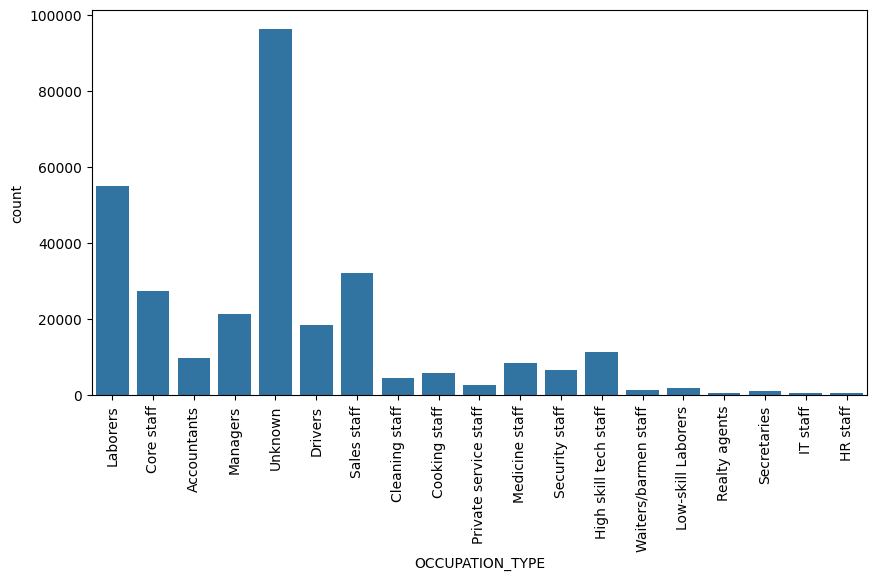

In [62]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "OCCUPATION_TYPE")
plt.xticks(rotation = 90)
plt.show()

**Спостереження**
- Якщо поглянути на графік, то найбільшу кількість заявників на кредит мають `Laborers`
- Для імпутації краще залишити дані як є (пропущені значення становлять 31,35%) і не проводити імпутацію за якоюсь константою, як-от мода або мін/макс медіана, якщо це числовий стовпчик, оскільки це може викривити дані в подальших розрахунках.

Існує також можливість імпутації за допомогою більш "розумних" методів, але ми вивчимо їх пізніше, а зараз ми робимо те, що можемо, за допомогою деяких найпростіших перетворень.

### Аналіз стовпця `EXT_SOURCE_3`

- пропущені значення = 19.83%

In [63]:
df.EXT_SOURCE_3.value_counts().head()

EXT_SOURCE_3
0.75    1460
0.71    1315
0.69    1276
0.67    1191
0.65    1154
Name: count, dtype: int64

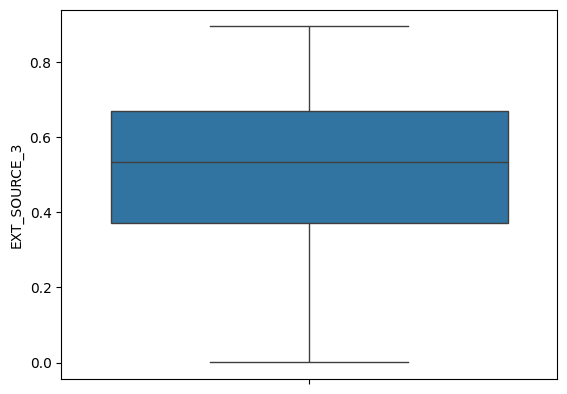

In [64]:
sns.boxplot(df.EXT_SOURCE_3)
plt.show()

Отримання процентильних значень для `EXT_SOURCE_3`

In [65]:
df.EXT_SOURCE_3.quantile(q = [0.25,0.5,0.75,1])

0.25   0.37
0.50   0.54
0.75   0.67
1.00   0.90
Name: EXT_SOURCE_3, dtype: float64

Найбільш повторюване значення в `EXT_SOURCE_3

In [66]:
df.EXT_SOURCE_3.mode()[0]

0.746300213050371

Перевірка середнього значення `EXT_SOURCE_3`

In [67]:
df.EXT_SOURCE_3.mean()

0.5108529061799658

**Спостереження**
-  Дивлячись на діагараму розмаху, медіана становить 0,535276
-  Найчастіше повторюване значення - 0,74630
-  Середнє значення - 0,51085
-  Хоча середнє та медіана є ближчими і можуть бути використані для імпутації, оскільки відсутнє відсоткове значення є більшим (19,83%), краще залишити дані як є і не проводити імпутації. Якщо метод вимагає імпутації, ми можемо імпутувати дані за допомогою медіани і створити ще один стовпчик, в якому буде позначено, які значення були імпутовані.

# ДЗ 1. Аналіз стовпців AMT_REQ_CREDIT_BUREAU з пропущеними значеннями**
Виведіть середнє, моду, медіану та відсоток відсутніх даних для настуних колонок:

 - `AMT_REQ_CREDIT_BUREAU_YEAR`
 - `AMT_REQ_CREDIT_BUREAU_MON`
 - `AMT_REQ_CREDIT_BUREAU_WEEK`

На основі виведених даних напишіть висновок про те, чи варто заповнювати пусті значення і якщо так, то яким чином?

All these columns contain numerical data with type **float64**, but according to the description all these ones can be of type **int64** (because this one is info about times quantity), so let's convert them to save the place on disk and to get proper central values

In [68]:
columns_to_process = ['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON',
                      'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR']

for col in columns_to_process:
  df = df[df[col].notnull()]
  df[col] = df[col].astype(int)

<ipython-input-68-9dbc2c8cdf4d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(int)


### Аналіз стовпця `AMT_REQ_CREDIT_BUREAU_YEAR`

- пропущені значення = 13.50%

In [69]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts().head()

AMT_REQ_CREDIT_BUREAU_YEAR
0    71801
1    63405
2    50192
3    33628
4    20714
Name: count, dtype: int64

In [70]:
# Mode

df.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0]

0

In [71]:
# Mean

df.AMT_REQ_CREDIT_BUREAU_YEAR.mean().round(0)

2.0

In [72]:
# Median

df.AMT_REQ_CREDIT_BUREAU_YEAR.median()

1.0

### Аналіз стовпця `AMT_REQ_CREDIT_BUREAU_MON`

- пропущені значення = 13.50%

In [73]:
type(df.AMT_REQ_CREDIT_BUREAU_MON[0])

numpy.int64

In [74]:
df.AMT_REQ_CREDIT_BUREAU_MON.value_counts().head()

AMT_REQ_CREDIT_BUREAU_MON
0    222233
1     33147
2      5386
3      1991
4      1076
Name: count, dtype: int64

In [75]:
# Mode

df.AMT_REQ_CREDIT_BUREAU_MON.mode()[0]

0

In [76]:
# Mean

df.AMT_REQ_CREDIT_BUREAU_MON.mean().round(0)

0.0

In [77]:
# Median

df.AMT_REQ_CREDIT_BUREAU_MON.median()

0.0

### Аналіз стовпця `AMT_REQ_CREDIT_BUREAU_WEEK`

- пропущені значення = 13.50%

In [78]:
type(df.AMT_REQ_CREDIT_BUREAU_WEEK[0])

numpy.int64

In [79]:
df.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts().head()

AMT_REQ_CREDIT_BUREAU_WEEK
0    257456
1      8208
2       199
3        58
4        34
Name: count, dtype: int64

In [80]:
# Mode

df.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0]

0

In [81]:
# Mean

df.AMT_REQ_CREDIT_BUREAU_WEEK.mean().round(0)

0.0

In [82]:
# Median

df.AMT_REQ_CREDIT_BUREAU_WEEK.median()

0.0

**Summary: we can have null-values here because of nature these data based on times quantity, so I suggest do not do missing data imputation to prevent dirting of the data**

# Перевірка стовпців зі значеннями NULL > 0% та < 1%

Створення датафрейму `null_df_under1` з відсотком пропущених значень > 0% та < 1% у кожному стовпці

In [83]:
null_df_under1 = null_df[(null_df['null_percentage'] > 0) & (null_df['null_percentage'] < 1)]

In [84]:
null_df_under1.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
11           NAME_TYPE_SUITE        1292             0.42
91  OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
92  DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
93  OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94  DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42              EXT_SOURCE_2         660             0.21
10           AMT_GOODS_PRICE         278             0.09

## Аналіз стовпця `NAME_TYPE_SUITE`

In [85]:
null_df_under1[null_df_under1.column_name == 'NAME_TYPE_SUITE']

column_name  null_count  null_percentage
11  NAME_TYPE_SUITE        1292             0.42

In [86]:
df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      215582
Family              34424
Spouse, partner      9619
Children             2780
Other_B              1468
Other_A               710
Group of people       226
Name: count, dtype: int64

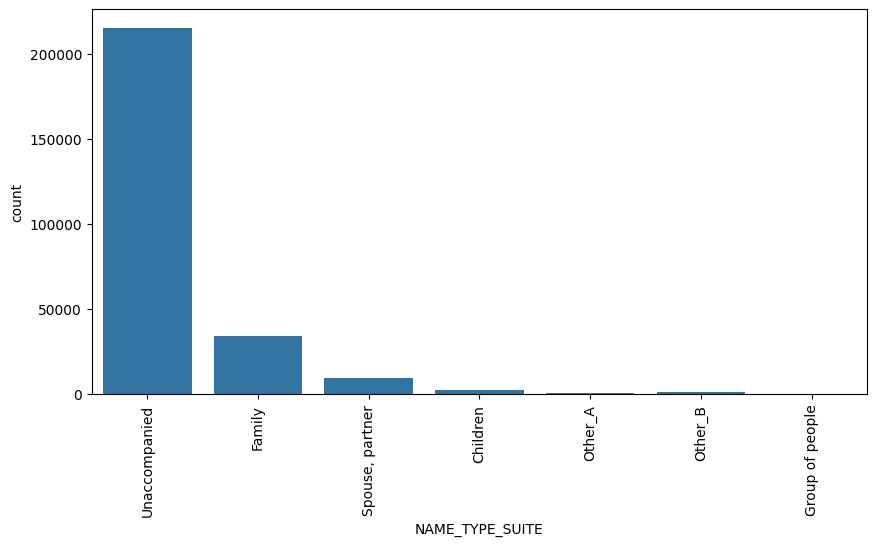

In [87]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "NAME_TYPE_SUITE")
plt.xticks(rotation = 90)
plt.show()

**Спостереження**
-   Дивлячись на графік, категорія `Unaccompanied` має найбільшу кількість заявників на отримання кредиту. Отже, більшість позичальників наважуються звертатися за кредитом без супроводу.
- Ми можемо продовжити імпутацію `Unaccompanied` в датафреймі, але краше надати перевагу другому варіанту.
- Ми також могли б імпутувати дані зі значенням `NA`, оскільки ця колонка є категоричною.
- Аналогічно, якщо в колонці не вистачає менше 1% даних, ми можемо її опустити. Але якщо ми вилучимо всі дані в усіх стовпчиках, де пропущено <=1% даних, ми можемо вилучити занадто багато даних. Тому я здебільшого зберігаю дані настільки, наскільки це можливо.

In [88]:
df['NAME_TYPE_SUITE'].fillna('NA', inplace=True)

<ipython-input-88-9eba76e3e9b9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NAME_TYPE_SUITE'].fillna('NA', inplace=True)


## Аналіз стовпця `OBS_30_CNT_SOCIAL_CIRCLE`

In [89]:
null_df_under1[null_df_under1.column_name == 'OBS_30_CNT_SOCIAL_CIRCLE']

column_name  null_count  null_percentage
91  OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33

In [90]:
df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts().head(10)

OBS_30_CNT_SOCIAL_CIRCLE
0.00    141072
1.00     42443
2.00     25827
3.00     17736
4.00     12302
5.00      8347
6.00      5634
7.00      3837
8.00      2578
9.00      1751
Name: count, dtype: int64

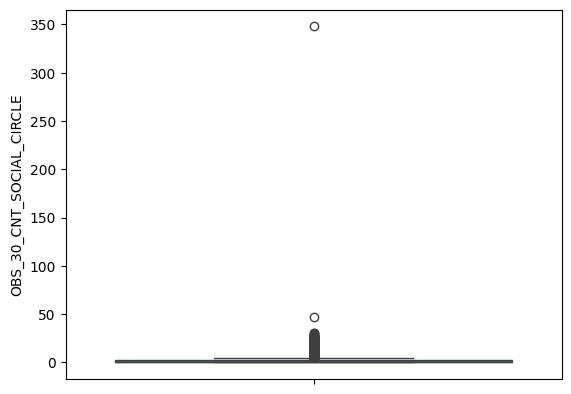

In [91]:
sns.boxplot(df.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

Розрахунок перцентилів `OBS_30_CNT_SOCIAL_CIRCLE`

In [92]:
df.OBS_30_CNT_SOCIAL_CIRCLE.quantile(q = [0.25,0.5,0.75,1])

0.25     0.00
0.50     0.00
0.75     2.00
1.00   348.00
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

Найбільш повторюване значення в `OBS_30_CNT_SOCIAL_CIRCLE`

In [93]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0]

0.0

Середнє значення `OBS_30_CNT_SOCIAL_CIRCLE`

In [94]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mean()

1.4319701592737448

**Спостереження**
- Дивлячись на діаграму розмаху, медіана дорівнює 0.0
- Найчастіше повторюване значення - 0.0
- Середнє значення - 1,4222
- Є два викидні значення на рівні 50 та 350.
- Медіана і мода близькі (з огляду на діапазон даних у цьому стовпчику) і можуть бути використані для імпутації. Це не призведе до зміщення, оскільки відсоток пропущених значень невеликий (0,33%)

In [95]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

<ipython-input-95-2ec5564a2152>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)


# ДЗ 2. Аналіз і заповнення пустих значень у колонках з малим відсотком пропущених

За прикладом вище проведіть аналіз пропущених значень в колонках
- EXT_SOURCE_2
- AMT_GOODS_PRICE

Для швидшого аналізу рекомендую написати фукнцію, яку Ви зможете викликати для кожної з колонок.

Зробіть висновок, що робити з пропущеними значеннями в кожному випадку і виконанайте ту дію, яку зазначили.

## Аналіз стовпця `EXT_SOURCE_2`

In [96]:
null_df_under1[null_df_under1.column_name == 'EXT_SOURCE_2']

column_name  null_count  null_percentage
42  EXT_SOURCE_2         660             0.21

In [97]:
df.EXT_SOURCE_2.value_counts().head(10)

EXT_SOURCE_2
0.29    615
0.26    361
0.27    287
0.16    278
0.27    258
0.26    206
0.27    198
0.16    190
0.16    187
0.16    152
Name: count, dtype: int64

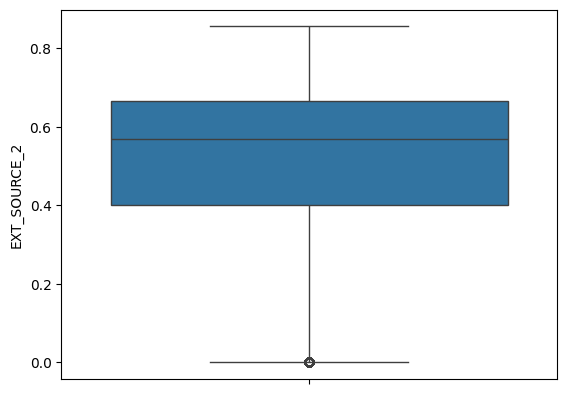

In [98]:
sns.boxplot(df.EXT_SOURCE_2)
plt.show()

In [99]:
df.EXT_SOURCE_2.quantile(q = [0.25,0.5,0.75,1])

0.25   0.40
0.50   0.57
0.75   0.67
1.00   0.85
Name: EXT_SOURCE_2, dtype: float64

In [100]:
df.EXT_SOURCE_2.mode()[0]

0.2858978721410488

In [101]:
df.EXT_SOURCE_2.mean()

0.5176970790923283

**Спостереження**
- Дивлячись на діаграму розмаху, медіана дорівнює 0.57
- Найчастіше повторюване значення - 0.28
- Середнє значення - 0,52
- Bикидних значень нема.
- Медіана і мода неблизькі (з огляду на діапазон даних у цьому стовпчику: 0.57 та 0.28), середне значення та медіана бiльш схожi, але я пропоную не виконувати тут імпутації, бо рiзниця мiж модою та медiаною занадто велика. Тож це може призвести до зміщення, хоча й відсоток пропущених значень невеликий (0,21%)

## Аналіз стовпця `AMT_GOODS_PRICE`

In [102]:
null_df_under1[null_df_under1.column_name == 'AMT_GOODS_PRICE']

column_name  null_count  null_percentage
10  AMT_GOODS_PRICE         278             0.09

In [103]:
df.AMT_GOODS_PRICE.value_counts().head(10)

AMT_GOODS_PRICE
450000.00     22500
675000.00     22040
225000.00     21598
900000.00     13710
270000.00      9950
180000.00      8353
1125000.00     8155
454500.00      8024
135000.00      6751
315000.00      4558
Name: count, dtype: int64

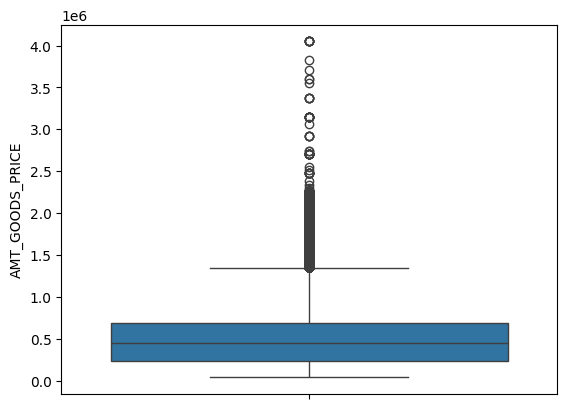

In [104]:
sns.boxplot(df.AMT_GOODS_PRICE)
plt.show()

In [105]:
df.AMT_GOODS_PRICE.quantile(q = [0.25,0.5,0.75,1])

0.25    238500.00
0.50    450000.00
0.75    684000.00
1.00   4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

In [106]:
df.AMT_GOODS_PRICE.mode()[0]

450000.0

In [107]:
df.AMT_GOODS_PRICE.mean().round(3)

545037.805

**Спостереження**
- Дивлячись на діаграму розмаху, медіана дорівнює 450000.00
- Найчастіше повторюване значення - 450000.00
- Середнє значення - 545037.805
- Багато викидних значень.
- Медіана і мода рiвнi, але я пропоную не виконувати тут імпутації, бо е багато викидних значень. Тож це може призвести до зміщення, хоча й відсоток пропущених значень невеликий (0,09%)

# Робота з неправильними/невідомими значеннями даних

### Аналіз стовпця `CODE_GENDER`

Перевірка діапазону значень

In [108]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F      176264
M       89724
XNA         4
Name: count, dtype: int64

Стать має бути тільки чоловіча або жіноча. Значення `XNA` може вказувати на те, що значення не було надано заявником або пропущено кредитним спеціалістом, який перевіряє заявку

In [109]:
df[df['CODE_GENDER'] == 'XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
35657      141289       0    Revolving loans         XNA             1   
38566      144669       0    Revolving loans         XNA             0   
83382      196708       0    Revolving loans         XNA             0   
189640     319880       0    Revolving loans         XNA             1   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                 1             0         207000.00   382500.00   
38566                 1             2         157500.00   270000.00   
83382                 1             1         135000.00   405000.00   
189640                1             0         247500.00   540000.00   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657      19125.00        337500.00   Unaccompanied               Working   
38566      13500.00        225000.00          Family               Working   
83382      20250.00        225000.00   Unaccompanied               Working   
189640     27000.00        900000.00   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                         0.02      -20232         -10044   
38566                         0.03      -13717          -2797   
83382                         0.04      -10647          -1228   
189640                        0.04       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
35657           -10024.00            -3537           1               1   
38566            -2241.00            -4659           1               1   
83382             -183.00            -1671           1               1   
189640           -4099.00            -2326           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
35657                 1                 1           1           0   
38566                 1                 1           1           0   
83382                 1                 1           1           0   
189640                1                 1           1           0   

           OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657              Unknown             2.00                     3   
38566   Low-skill Laborers             4.00                     2   
83382           Core staff             3.00                     2   
189640             Unknown             2.00                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
35657                        0                       

Оскільки дані виглядають достовірними, ми перевіримо можливість застосування методу імпутації.
- Заявників-жінок удвічі більше, ніж заявників-чоловіків
- Отже, ми прирівняємо `CODE_GENDER` до 'F'

In [110]:
df['CODE_GENDER_CHANGED'] = df['CODE_GENDER'].apply(lambda x: 1 if x == 'XNA' else 0)

In [111]:
df['CODE_GENDER'] = df['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)

Перевірка, чи вилучено `XNA

In [112]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F    176268
M     89724
Name: count, dtype: int64

### Аналіз стовпця `DAYS_BIRTH`

In [113]:
df['DAYS_BIRTH'].value_counts().head()

DAYS_BIRTH
-13749    42
-18248    38
-13263    37
-12806    37
-13788    36
Name: count, dtype: int64

Існує ~17K+ унікальних записів, всі з яких, схоже, мають від'ємні значення

In [114]:
df['DAYS_BIRTH'].unique()

array([ -9461, -16765, -19046, ..., -25061, -24918,  -7839])

In [115]:
df['DAYS_BIRTH'].nunique()

17402

In [116]:
df['DAYS_BIRTH'].describe()

count   265992.00
mean    -16115.12
std       4309.23
min     -25201.00
25%     -19713.00
50%     -15810.00
75%     -12568.00
max      -7489.00
Name: DAYS_BIRTH, dtype: float64

Перетворення `Days Birth` на додатні дні

In [117]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: -x if x < 0 else x)

In [118]:
df['DAYS_BIRTH'].describe()

count   265992.00
mean     16115.12
std       4309.23
min       7489.00
25%      12568.00
50%      15810.00
75%      19713.00
max      25201.00
Name: DAYS_BIRTH, dtype: float64

Всі дні в `DAYS_BIRTH` мають додатні значення - це може бути зручніше для аналізу.

#### Створимо нову колонку `YEARS_BIRTH` для зручності аналізу

In [119]:
df['YEARS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: round(x/365))

### Аналіз стовпця `NAME_FAMILY_STATUS`

Перевірка діапазону значень

In [120]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 172132
Single / not married     37627
Civil marriage           24974
Separated                17349
Widow                    13909
Unknown                      1
Name: count, dtype: int64

Стать має бути тільки чоловіча або жіноча. Значення `Unknown` може означати, що значення не було вказане заявником або пропущене кредитним спеціалістом, який перевіряє заявку

In [121]:
df[df['NAME_FAMILY_STATUS'] == 'Unknown']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
187348     317181       0    Revolving loans           F             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
187348                1             0         202500.00   585000.00   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
187348     29250.00              NaN              NA  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
187348    Higher education            Unknown  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
187348                        0.03       12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
187348           -1597.00            -1571           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
187348                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
187348     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
187348                        0  Business Entity Type 2          0.65   

        EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
187348          0.67                      1.00                      0.00   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
187348                      1.00                      0.00   

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
187348                 -654.00                0                0   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
187348                0                0                0                1   

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
187348                0                0                 0                 0   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
187348                 0                 0                 0   

        FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
187348                 0                 0                 0   

        FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
187348                 0                 0                 0   

        FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
187348                 0                           0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
187348                          0                           0   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
187348                          0                          0   

        AMT_REQ_CREDIT_BUREAU_YEAR  CODE_GENDER_CHANGED  YEARS_BIRTH  
187348                           1                    0           35

In [122]:
df['NAME_FAMILY_STATUS'].value_counts(normalize = True) * 100

NAME_FAMILY_STATUS
Married                64.71
Single / not married   14.15
Civil marriage          9.39
Separated               6.52
Widow                   5.23
Unknown                 0.00
Name: proportion, dtype: float64

Оскільки дані виглядають достовірними, ми продовжимо перевірку методу імпутації.
- Одружені заявники складають понад 63% заявників.
- Отже, ми прирівняємо `NAME_FAMILY_STATUS` до `Married`.

In [123]:
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].apply(lambda x: 'Married' if x == 'Unknown' else x)

Перевірка чи вилучено `Unknown`

In [124]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 172133
Single / not married     37627
Civil marriage           24974
Separated                17349
Widow                    13909
Name: count, dtype: int64

### Аналіз стовпця`DAYS_EMPLOYED`

In [125]:
df['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
 365243    47711
-200         138
-199         138
-230         131
-224         128
Name: count, dtype: int64

In [126]:
df['DAYS_EMPLOYED'].value_counts(normalize = True) * 100

DAYS_EMPLOYED
 365243   17.94
-200       0.05
-199       0.05
-230       0.05
-224       0.05
           ... 
-5         0.00
-13650     0.00
-10592     0.00
-12567     0.00
-8694      0.00
Name: proportion, Length: 12394, dtype: float64

In [127]:
len(df[df['DAYS_EMPLOYED'] < 365243])

218281

In [128]:
df[df['DAYS_EMPLOYED'] < 365243].DAYS_EMPLOYED.value_counts()

DAYS_EMPLOYED
-199      138
-200      138
-230      131
-224      128
-212      127
         ... 
-5          1
-13650      1
-10592      1
-12567      1
-8694       1
Name: count, Length: 12393, dtype: int64

In [129]:
df['DAYS_EMPLOYED'].unique()

array([  -637,  -1188,   -225, ..., -11084,  -7499,  -8694])

In [130]:
df['DAYS_EMPLOYED'].nunique()

12394

**Спостереження**
- Існує ~55K+ записів, для яких `DAYS_EMPLOYED` дорівнює 365243 дням
- Решта 252K+ записів мають від'ємне значення днів
- Існує 12 574 унікальних значень для `DAYS_EMPLOYED

 - Колонка `DAYS_EMPLOYED` вказує на те, за скільки днів до подачі заявки особа почала поточну роботу, заявник/кредитний спеціаліст повинен ввести від'ємні значення, щоб вказати дні, що передують даті подачі заявки.<br>
 - Ми конвертуємо від'ємні значення в `DAYS_EMPLOYED` в додатні дні, щоб стандартизувати дні під час використання в розрахунках

In [131]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: -x if x < 0 else x)

In [132]:
df['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
365243    47711
200         138
199         138
230         131
224         128
Name: count, dtype: int64

Ми бачимо, що всі дні в `DAYS_EMPLOYED` мають додатні значення.

**Для ~55K+ записів, для яких `DAYS_EMPLOYED` становить 365243 дні**
- Конвертуючи це в роки, ми отримуємо 1000 років, які фізично неможливо використати для працевлаштування заявника
- Це відповідає 18% даних і не може бути аномалією
- Вони можуть бути або "пенсіонерами", або "безробітними", і, дивлячись на дані, наш висновок є правильним

> Є два способи впоратися з цим
>> 1) Ми залишаємо дані такими, якими вони є, і враховуємо це під час аналізу АБО  <br>
>> 2) Ми розраховуємо середню кількість днів зайнятості без урахування цієї категорії та вписуємо її замість 365243 днів для пенсіонерів. <br>
>> Для безробітних кількість днів зайнятості може дорівнювати 0

*Примітка*
 - Під час розрахунків у цьому стовпчику ми повинні враховувати цей сценарій, оскільки інакше він спотворює наші результати

In [133]:
days_median = df[df['DAYS_EMPLOYED'] != 365243].DAYS_EMPLOYED.median()

In [134]:
df_days_employed = df['DAYS_EMPLOYED'].apply(lambda x: days_median if x==365243 else x)

<Axes: >

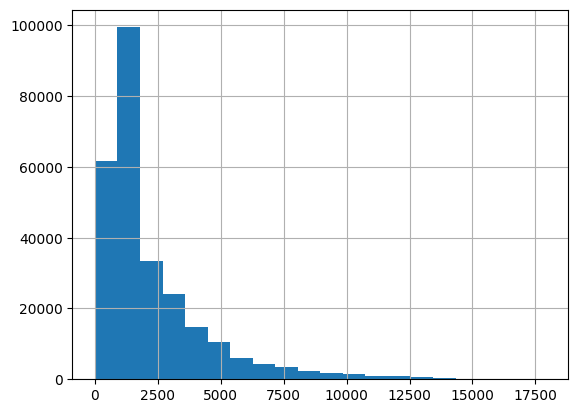

In [135]:
df_days_employed.hist(bins=20)

<Axes: >

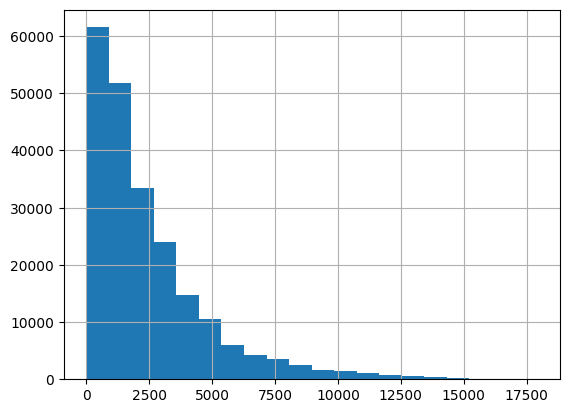

In [136]:
df[df['DAYS_EMPLOYED'] != 365243].DAYS_EMPLOYED.hist(bins=20)

In [137]:
df[df['DAYS_EMPLOYED'] == 365243].NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Pensioner     47706
Unemployed        5
Name: count, dtype: int64

#### Створимо нову колонку `YEARS_EMPLOYED` для зручності аналізу

In [138]:
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_REGISTRATION`

In [139]:
df['DAYS_REGISTRATION'].value_counts().head()

DAYS_REGISTRATION
-1.00     86
-6.00     83
-7.00     77
-4.00     75
-14.00    74
Name: count, dtype: int64

In [140]:
df['DAYS_REGISTRATION'].value_counts(normalize = True).head()

DAYS_REGISTRATION
-1.00    0.00
-6.00    0.00
-7.00    0.00
-4.00    0.00
-14.00   0.00
Name: proportion, dtype: float64

In [141]:
df['DAYS_REGISTRATION'].unique()

array([ -3648.,  -1186.,  -4260., ..., -16396., -15953., -14558.])

In [142]:
df['DAYS_REGISTRATION'].nunique()

15506

Перетворення `DAYS_REGISTRATION` в додатні дні

In [143]:
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: -x if x < 0 else x)

In [144]:
df['DAYS_REGISTRATION'].value_counts().head()

DAYS_REGISTRATION
1.00     86
6.00     83
7.00     77
4.00     75
14.00    74
Name: count, dtype: int64

Всі дні в `DAYS_REGISTRATION` мають додатні значення

#### Створимо нову колонку `YEARS_REGISTRATION` для зручності аналізу

In [145]:
df['YEARS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_ID_PUBLISH`

In [146]:
df['DAYS_ID_PUBLISH'].value_counts().head()

DAYS_ID_PUBLISH
-4053    150
-4256    147
-4417    146
-4095    145
-4151    143
Name: count, dtype: int64

In [147]:
df['DAYS_ID_PUBLISH'].value_counts(normalize = True).head()

DAYS_ID_PUBLISH
-4053   0.00
-4256   0.00
-4417   0.00
-4095   0.00
-4151   0.00
Name: proportion, dtype: float64

In [148]:
df['DAYS_ID_PUBLISH'].unique()

array([-2120,  -291, -2531, ..., -5906, -5854, -6211])

In [149]:
df['DAYS_ID_PUBLISH'].nunique()

6152

Перетворення `DAYS_ID_PUBLISH` в додатні дні

In [150]:
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: -x if x < 0 else x)

In [151]:
df['DAYS_ID_PUBLISH'].value_counts().head()

DAYS_ID_PUBLISH
4053    150
4256    147
4417    146
4095    145
4151    143
Name: count, dtype: int64

Всі дні в `DAYS_ID_PUBLISH` мають додатні значення

#### Створимо нову колонку `YEARS_ID_PUBLISH` для зручності аналізу

In [152]:
df['YEARS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_LAST_PHONE_CHANGE`

In [153]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

DAYS_LAST_PHONE_CHANGE
0.00     31730
-1.00     2549
-2.00     2175
-3.00     1672
-4.00     1195
Name: count, dtype: int64

In [154]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts(normalize = True).head()

DAYS_LAST_PHONE_CHANGE
0.00    0.12
-1.00   0.01
-2.00   0.01
-3.00   0.01
-4.00   0.00
Name: proportion, dtype: float64

In [155]:
df['DAYS_LAST_PHONE_CHANGE'].unique()

array([-1134.,  -828.,  -815., ..., -3899., -3559., -3538.])

In [156]:
df['DAYS_LAST_PHONE_CHANGE'].nunique()

3748

Перетворення `DAYS_LAST_PHONE_CHANGE` в додатні дні

In [157]:
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: -x if x < 0 else x)

In [158]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

DAYS_LAST_PHONE_CHANGE
0.00    31730
1.00     2549
2.00     2175
3.00     1672
4.00     1195
Name: count, dtype: int64

Всі дні в `DAYS_LAST_PHONE_CHANGE` мають додатні значення

#### Створення нової колонки `YEARS_LAST_PHONE_CHANGE` для зручності аналізу

In [159]:
df['YEARS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: round(x/365,0))

# Функції для автоматизації

### Створення функції `age_cat` для категоризації даних, що містять інформацію про роки

In [160]:
def age_cat(years):
    if years <= 20:
        return '0-20'
    elif years > 20 and years <= 30:
        return '20-30'
    elif years > 30 and years <= 40:
        return '30-40'
    elif years > 40 and years <= 50:
        return '40-50'
    elif years > 50 and years <= 60:
        return '50-60'
    elif years > 60 and years <= 70:
        return '60-70'
    elif years > 70:
        return '70+'

### Одномірний (категоріальний vs цільовий) та двомірний (категоріальний vs категоріальний) аналіз (гістограма) - категоріальні стовпчики

In [161]:
import matplotlib.pyplot as plt


def bi_cat_countplot(df, column, hue_column):
    unique_hue_values = df[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,6)

    pltname = f'Нормалізований розподіл значень за категорією: {column}'
    proportions = df.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[0], title=pltname)

    # анотація значень в барплоті
    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.1f}%')

    pltname = f'Кількість даних за категорією: {column}'
    counts = df.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[1], title=pltname)

    for container in ax.containers:
      ax.bar_label(container)


def uni_cat_target_compare(df, column):
    bi_cat_countplot(df, column, hue_column='TARGET')


### Обчислення мінімального та максимального діапазону відхилень для числових стовпців

In [162]:
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Max_value

### Робота з викидами для числових стовпців

In [163]:
import warnings

def dist_box(dataset, column):
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")

      plt.figure(figsize=(16,6))

      plt.subplot(1,2,1)
      sns.distplot(dataset[column], color = 'purple')
      pltname = 'Графік розподілу для ' + column
      plt.ticklabel_format(style='plain', axis='x')
      plt.title(pltname)

      plt.subplot(1,2,2)
      red_diamond = dict(markerfacecolor='r', marker='D')
      sns.boxplot(y = column, data = dataset, flierprops = red_diamond)
      pltname = 'Боксплот для ' + column
      plt.title(pltname)

      plt.show()

### Аналіз стовпця`CNT_CHILDREN`

In [164]:
df['CNT_CHILDREN'].value_counts().sort_values(ascending = False);

In [165]:
(df['CNT_CHILDREN'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

CNT_CHILDREN
0   69.67
1   20.06
2    8.87
3    1.22
4    0.13
Name: proportion, dtype: float64

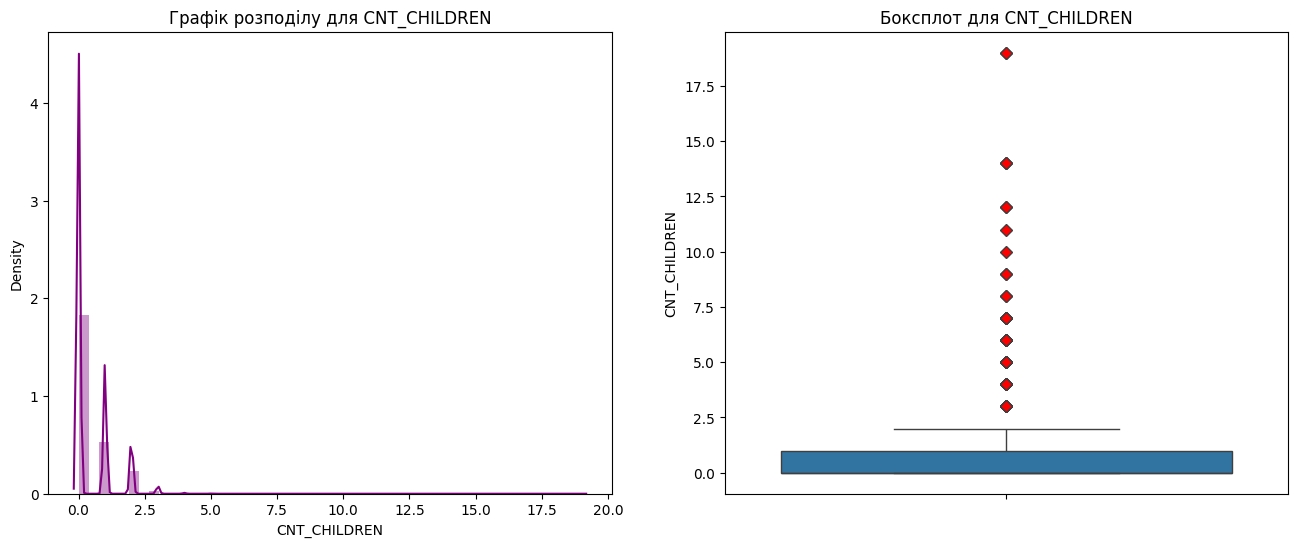

In [166]:
dist_box(df,'CNT_CHILDREN')

Розрахуємо IQR (Inter Quartile range)

In [167]:
Q1 = df['CNT_CHILDREN'].quantile(0.25)
Q3 = df['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.0


In [168]:
Q1, Q3

(0.0, 1.0)

Значення *до* (Q1 - 1,5 * IQR) та *після* (Q3 + 1,5 * IQR) є викидами

In [169]:
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value))

Мінімальне значення, до якого існують викиди: -1.5
Максимальне значення, після якого існують викиди: 2.5


In [170]:
df[df['CNT_CHILDREN'].isin(range(10,20))].YEARS_BIRTH

34545     47
80948     39
132585    31
155369    30
171125    38
176011    49
183878    56
265784    28
267998    42
Name: YEARS_BIRTH, dtype: int64

In [171]:
df[df['CNT_CHILDREN'].isin(range(10,20))][['SK_ID_CURR', 'CNT_CHILDREN', 'YEARS_BIRTH']]

SK_ID_CURR  CNT_CHILDREN  YEARS_BIRTH
34545      140032            11           47
80948      193853            12           39
132585     253779            10           31
155369     280108            19           30
171125     298322            12           38
176011     303956            14           49
183878     313127            14           56
265784     407877            19           28
267998     410527            14           42

**Спостереження**
- Дивлячись на дані, ми бачимо, що кількість заявників, які мають більше 7 дітей, є дуже мінімальною (2 або 3 в кожній категорії)
- Крім того, дивлячись на дані для заявників з 10 дітьми, заявники мають лише 31 й 41 рік відповідно. Це виглядає як одиничний випадок й може розглядатися як відхилення від норми
- Як дистрибутивні, так і діаграми розмаху чітко показують, що значення, які перевищують значення 2.5, є відхиленнями від норми.

**Висновок**
- Заявники, які мають 3 або більше дітей, є випадками, що відхиляються від норми. Ми можемо надати спеціальний аналіз для цих випадків.

### Аналіз стовпця `AMT_INCOME_TOTAL`

In [172]:
df['AMT_INCOME_TOTAL'].value_counts().sort_values(ascending = False).head()

AMT_INCOME_TOTAL
135000.00    30710
112500.00    26213
157500.00    23163
180000.00    21730
90000.00     18695
Name: count, dtype: int64

In [173]:
(df['AMT_INCOME_TOTAL'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

AMT_INCOME_TOTAL
135000.00   11.55
112500.00    9.85
157500.00    8.71
180000.00    8.17
90000.00     7.03
Name: proportion, dtype: float64

In [174]:
df['AMT_INCOME_TOTAL'].describe(percentiles = [0.75,0.99,0.999])

count      265992.00
mean       171275.65
std        248385.08
min         26100.00
50%        157500.00
75%        202500.00
99%        495000.00
99.9%      900000.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

Побудуємо графік для `AMT_INCOME_TOTAL`

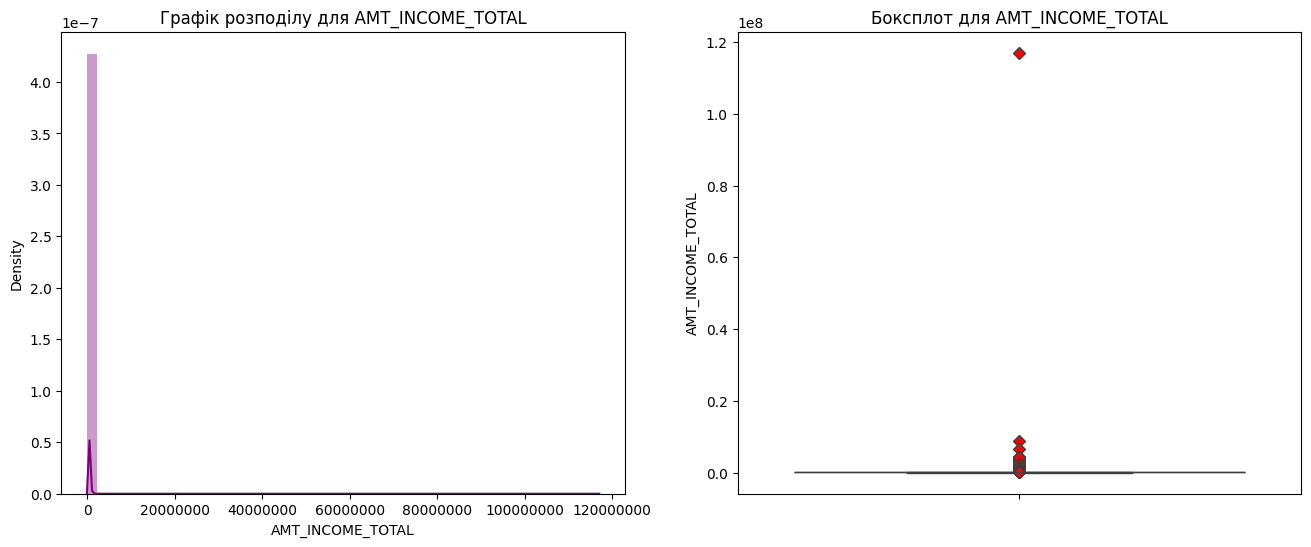

In [175]:
dist_box(df,'AMT_INCOME_TOTAL')

- Графіки кінцевого результату дуже тонкі, й ми можемо спостерігати викид близько ~120 мільйонів.
- Давайте побудуємо графік, розглядаючи лише дохід нижче 99,9% значення, тобто 900 тисяч.

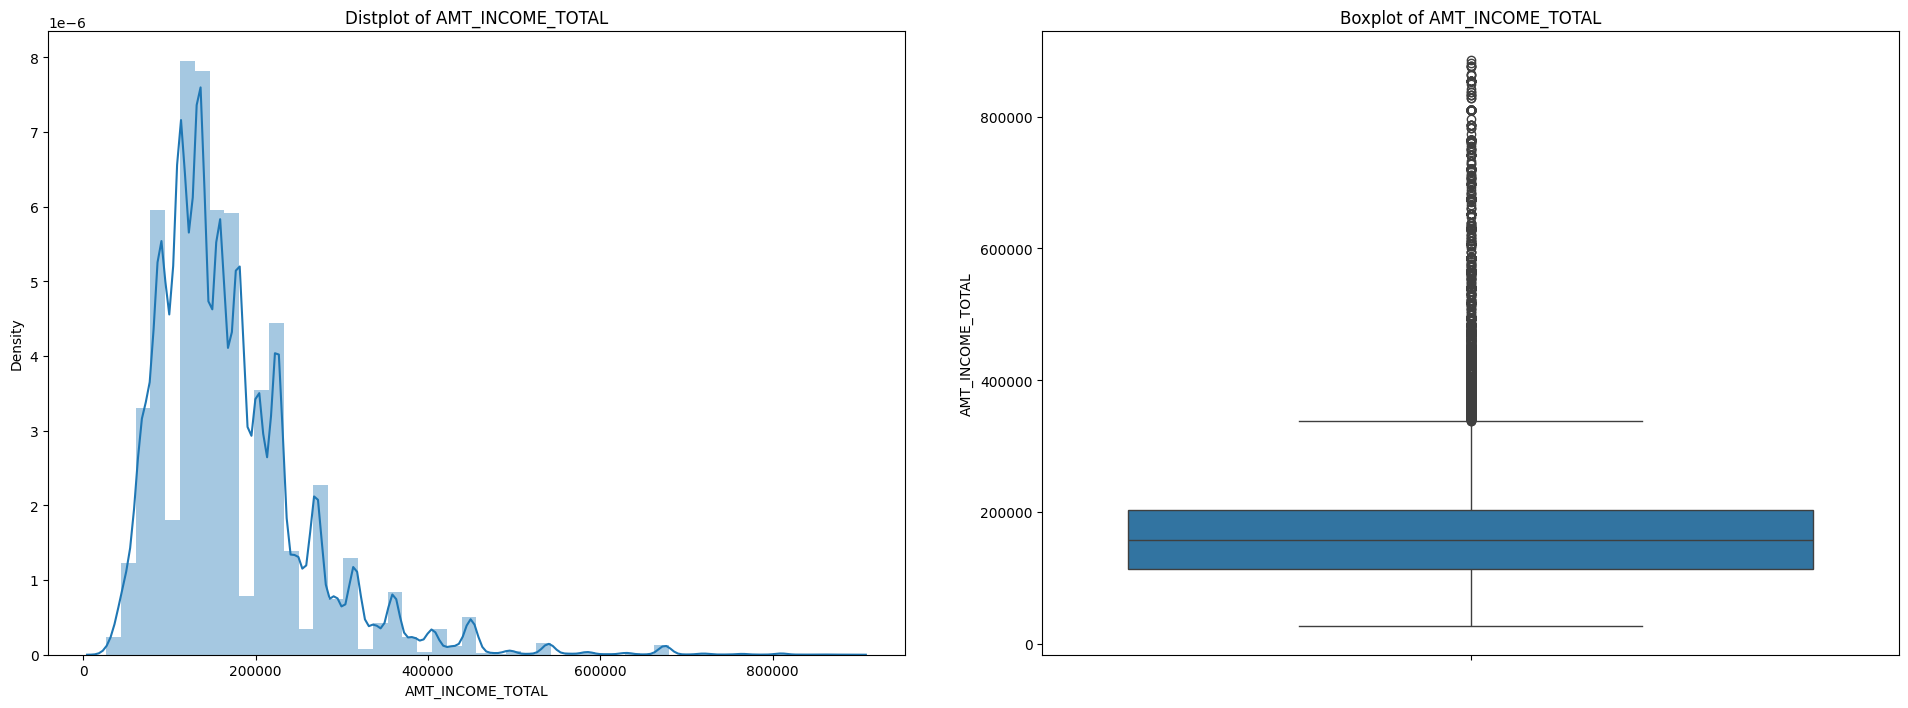

In [176]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Distplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.subplot(122)
    sns.boxplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Boxplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.tight_layout(pad = 4)
    plt.show()

Тепер ми можемо чітко побачити розподіл і діапазон даних на обох графіках.
 - Це означає, що значення понад 900 тис. грн доходу явно є викидами

In [177]:
df[df['AMT_INCOME_TOTAL'] > 900000].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
1504     101769       0    Revolving loans           M             1   
1723     102015       0         Cash loans           F             0   
3371     103938       0         Cash loans           F             0   
4603     105384       0    Revolving loans           F             1   
5673     106637       0         Cash loans           M             1   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1504                1             0        1080000.00   180000.00   
1723                1             0        1935000.00   269550.00   
3371                0             1        1350000.00  2410380.00   
4603                1             0        1350000.00   405000.00   
5673                1             3         967500.00   450000.00   

      AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
1504      9000.00        180000.00   Unaccompanied  Commercial associate   
1723     10534.50        225000.00   Unaccompanied             Pensioner   
3371    109053.00       2250000.00              NA  Commercial associate   
4603     20250.00        405000.00   Unaccompanied  Commercial associate   
5673     30073.50        450000.00   Unaccompanied  Commercial associate   

                NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1504               Higher education            Married  House / apartment   
1723  Secondary / secondary special            Married  House / apartment   
3371               Higher education            Married  House / apartment   
4603               Higher education            Married  House / apartment   
5673               Higher education            Married  House / apartment   

      REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
1504                        0.07       13633           5536   
1723                        0.01       18636         365243   
3371                        0.07       12213            843   
4603                        0.02       14781           4768   
5673                        0.05       11901            546   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
1504               3.00             4971           1               1   
1723            3401.00             2168           1               0   
3371             757.00             4132           1               1   
4603            3469.00             4045           1               1   
5673            2932.00              215           1               1   

      FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
1504                0                 1           0           0   
1723                0                 1           1           0   
3371                0                 1           1           0   
4603                0                 1           0           0   
5673                0                 1           0           0   

     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
1504         Unknown             2.00                     1   
1723         Unknown             2.00                     2   
3371        Managers             3.00                     1   
4603        Managers             2.00                     2   
5673        Managers             5.00                     1   

      REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
1504                            1                     FRIDAY   
1723                            2                     MONDAY   
3371                            1                     SUNDAY   
4603                            2                    TUESDAY   
5673                            1                     MONDAY   

      HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
1504                       13                           0   
1723                       11                           0   
3371                       13                           0   
4603          

**Спостереження**
- Дивлячись на дані, ми бачимо, що дохід понад 900 тис. грн (99,9% значення) є викидом
- Як діаграма розподілу, так і діаграма розмаху чітко показують нам ту саму тенденцію

**Висновок**
- Апліканти з доходом понад 900 тис. грн (99,9% значення) є викидами

# ДЗ 3. Аналіз викидів

Подібно до прикладу, проаналізуйте на викиди колонок
- `CNT_FAM_MEMBERS`
- `AMT_ANNUITY`

Зазначте, які значення в них можна вважати викидами.

### Аналіз стовпця `CNT_FAM_MEMBERS` (скiльки членiв родини у клiента)

In [178]:
df['CNT_FAM_MEMBERS'].value_counts().sort_values(ascending = False).head()

CNT_FAM_MEMBERS
2.00    137574
1.00     57186
3.00     45937
4.00     21787
5.00      3061
Name: count, dtype: int64

In [179]:
df['CNT_FAM_MEMBERS'].describe(percentiles = [0.75,0.99,0.999])

count   265991.00
mean         2.16
std          0.91
min          1.00
50%          2.00
75%          3.00
99%          5.00
99.9%        6.00
max         20.00
Name: CNT_FAM_MEMBERS, dtype: float64

In [180]:
(df['CNT_FAM_MEMBERS'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

CNT_FAM_MEMBERS
2.00   51.72
1.00   21.50
3.00   17.27
4.00    8.19
5.00    1.15
Name: proportion, dtype: float64

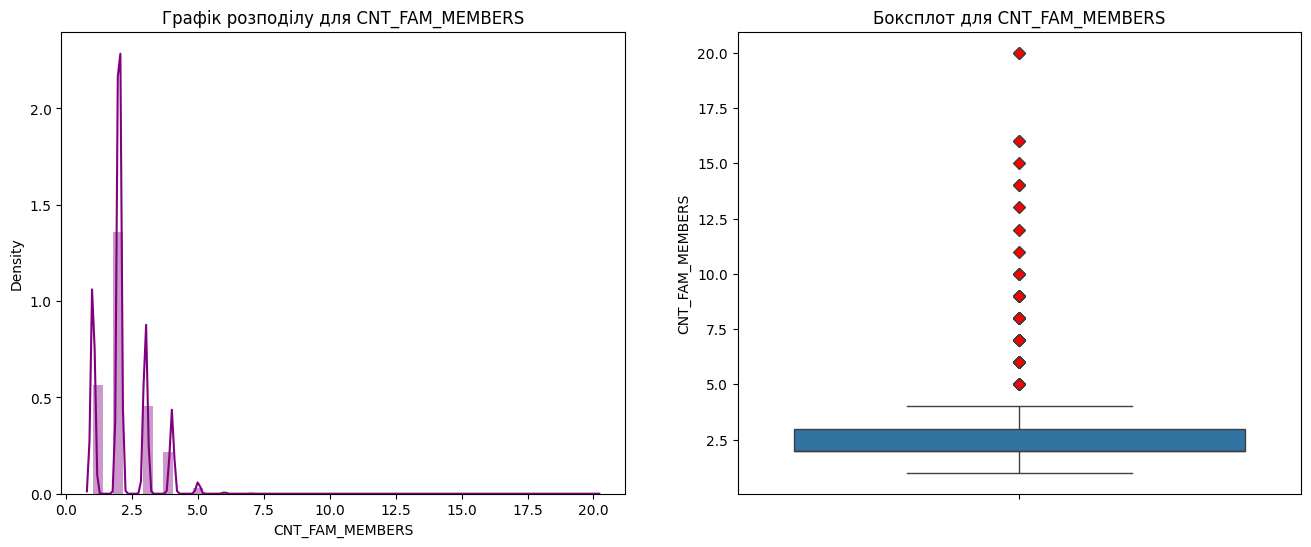

In [181]:
dist_box(df,'CNT_FAM_MEMBERS')

**Спостереження: можемо бачити наявнiсть викидiв (основна маса даних лежить в iнтервалi вiд 1 до 5, але присутнi поодинокi випадки, коли членiв родини вiд 5 до 20)**

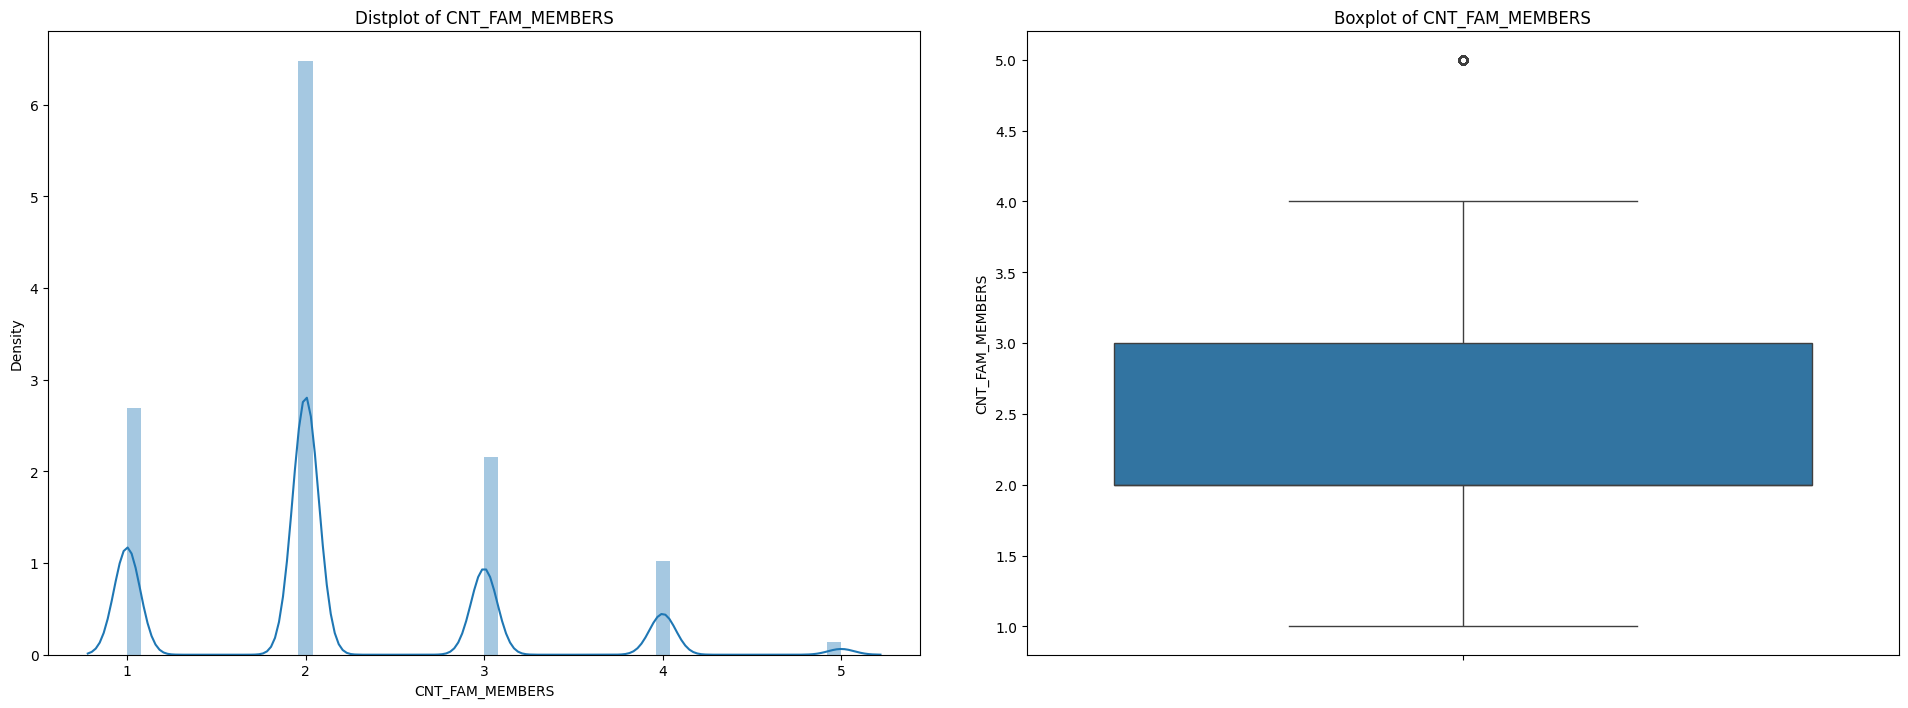

In [182]:
# Побудуемо графiк для даних без викидiв

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(df[df['CNT_FAM_MEMBERS'] <= 5].CNT_FAM_MEMBERS)
    pltname = 'Distplot of ' + 'CNT_FAM_MEMBERS'
    plt.title(pltname)

    plt.subplot(122)
    sns.boxplot(df[df['CNT_FAM_MEMBERS'] <= 5].CNT_FAM_MEMBERS)
    pltname = 'Boxplot of ' + 'CNT_FAM_MEMBERS'
    plt.title(pltname)

    plt.tight_layout(pad = 4)
    plt.show()

**Висновок: викиди присутнi, але займають невелику частину даних + такi значення можуть бути (наприклад клiент вiдноситься до народiв, де великi сiм'i - це норма), тож видаляти iх не будемо**

### Аналіз стовпця `AMT_ANNUITY` (Ануїтет попередньої заявки)

In [183]:
df['AMT_ANNUITY'].value_counts().sort_values(ascending = False).head()

AMT_ANNUITY
9000.00     5185
13500.00    4899
6750.00     1751
10125.00    1725
37800.00    1462
Name: count, dtype: int64

In [184]:
df['AMT_ANNUITY'].describe(percentiles = [0.75,0.99,0.999])

count   265981.00
mean     27174.65
std      14389.92
min       1615.50
50%      24970.50
75%      34740.00
99%      69661.80
99.9%   109728.00
max     258025.50
Name: AMT_ANNUITY, dtype: float64

In [185]:
(df['AMT_ANNUITY'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

AMT_ANNUITY
9000.00    1.95
13500.00   1.84
6750.00    0.66
10125.00   0.65
37800.00   0.55
Name: proportion, dtype: float64

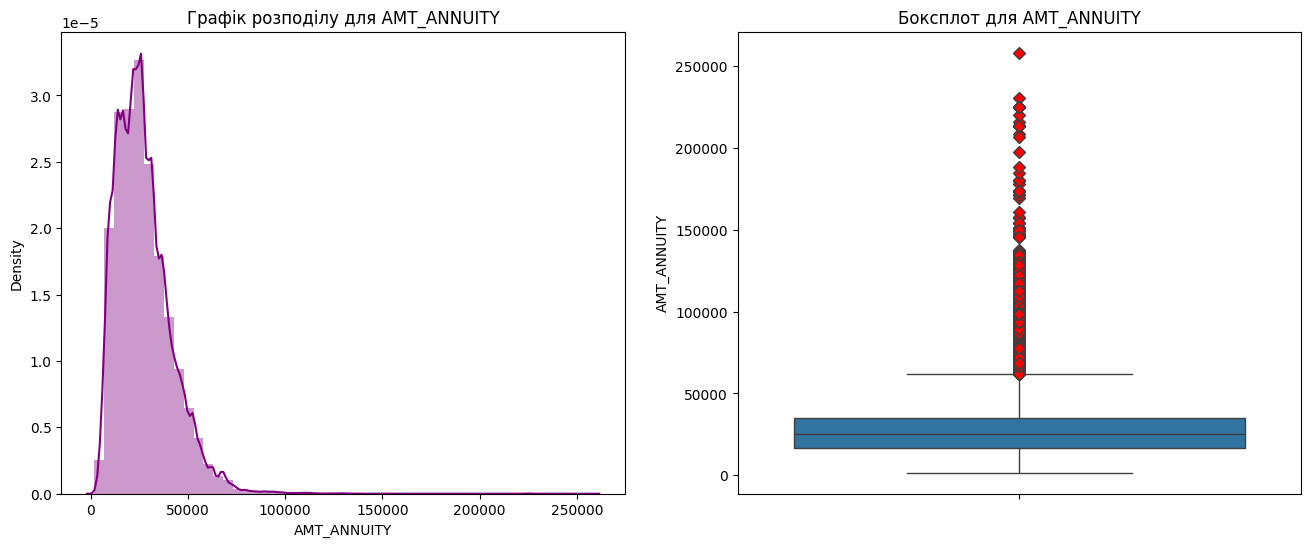

In [186]:
dist_box(df,'AMT_ANNUITY')

**Спостереження: можемо бачити наявнiсть викидiв (основна маса даних лежить в iнтервалi вiд 0 до 100000, але присутнi поодинокi випадки, коли значення бiльше 250000)**

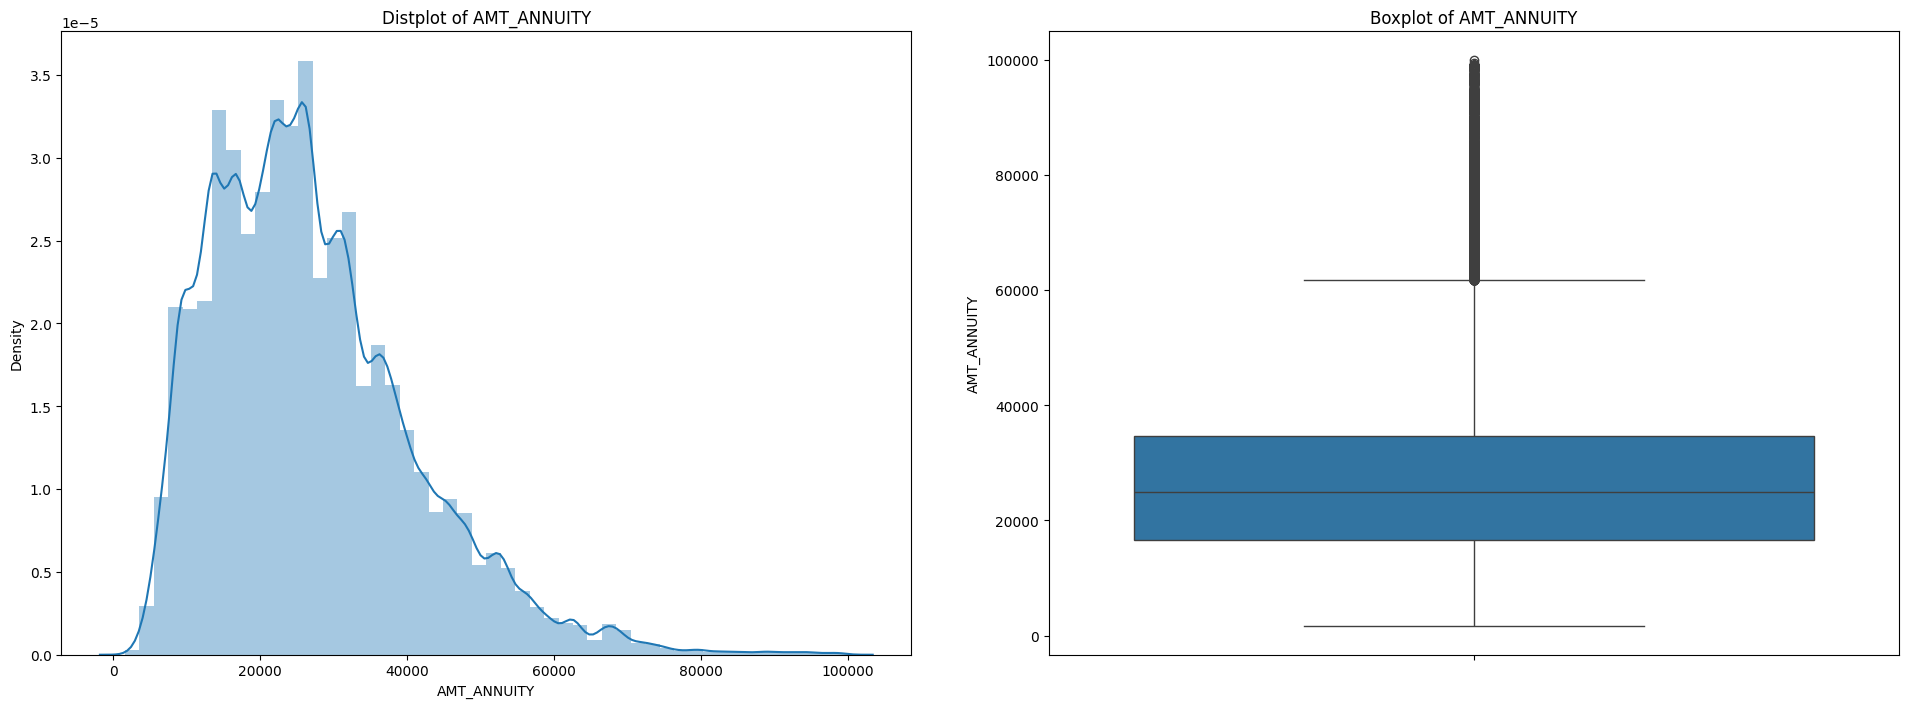

In [187]:
# Побудуемо графiк для даних без викидiв

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(df[df['AMT_ANNUITY'] <= 100000].AMT_ANNUITY)
    pltname = 'Distplot of ' + 'AMT_ANNUITY'
    plt.title(pltname)

    plt.subplot(122)
    sns.boxplot(df[df['AMT_ANNUITY'] <= 100000].AMT_ANNUITY)
    pltname = 'Boxplot of ' + 'AMT_ANNUITY'
    plt.title(pltname)

    plt.tight_layout(pad = 4)
    plt.show()

**Висновок: викиди присутнi, але займають невелику частину даних, тож видаляти iх не будемо**

# Розбиття на біни безперервних колонок для аналізу

### Категоризація стовпця `AMT_GOODS_PRICE

In [188]:
df['AMT_GOODS_PRICE'].value_counts().sort_values(ascending = False).head()

AMT_GOODS_PRICE
450000.00    22500
675000.00    22040
225000.00    21598
900000.00    13710
270000.00     9950
Name: count, dtype: int64

In [189]:
(df['AMT_GOODS_PRICE'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

AMT_GOODS_PRICE
450000.00   8.47
675000.00   8.29
225000.00   8.13
900000.00   5.16
270000.00   3.74
Name: proportion, dtype: float64

Подивимось статистичний звіт для `AMT_GOODS_PRICE

In [190]:
df['AMT_GOODS_PRICE'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count     265760.00
mean      545037.80
std       371444.35
min        40500.00
25%       238500.00
50%       450000.00
75%       684000.00
99%      1800000.00
99.99%   2982253.50
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

Розподілимо значення в `AMT_GOODS_PRICE` на 5 бінів і створимо новий стовпець `AMT_GOODS_PRICE_CATEGORY`.

In [191]:
df['AMT_GOODS_PRICE_CATEGORY'] = pd.cut(df['AMT_GOODS_PRICE'],
                                        bins = 5, labels = ['very low', 'low', 'medium', 'high', 'very high'])

Перевірка заповнення значень згідно з очікуванням

In [192]:
df['AMT_GOODS_PRICE_CATEGORY'].value_counts()

AMT_GOODS_PRICE_CATEGORY
very low     212235
low           49788
medium         3680
high             41
very high        16
Name: count, dtype: int64

### Категоризація стовпця `YEARS_BIRTH`

Ми будемо класифікувати `YEARS_BIRTH` замість `DAYS_BIRTH`, оскільки роки легше інтерпретувати, ніж дні

In [193]:
df['YEARS_BIRTH'].value_counts().sort_values(ascending = False).head()

YEARS_BIRTH
39    8001
38    7779
37    7692
40    7645
41    7547
Name: count, dtype: int64

In [194]:
(df['YEARS_BIRTH'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

YEARS_BIRTH
39   3.01
38   2.92
37   2.89
40   2.87
41   2.84
Name: proportion, dtype: float64

Подивимось статистичний звіт для  `YEARS_BIRTH`

In [195]:
df['YEARS_BIRTH'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count    265992.00
mean         44.15
std          11.81
min          21.00
25%          34.00
50%          43.00
75%          54.00
99%          67.00
99.99%       69.00
max          69.00
Name: YEARS_BIRTH, dtype: float64

Категоризуймо значення з `YEARS_BIRTH` у новий стовпець `YEARS_BIRTH_CATEGORY`.

In [196]:
df['YEARS_BIRTH_CATEGORY'] = df['YEARS_BIRTH'].apply(age_cat)

Перевірка заповнення значень згідно з очікуванням

In [197]:
df['YEARS_BIRTH_CATEGORY'].value_counts().sort_values(ascending = False)

YEARS_BIRTH_CATEGORY
30-40    72744
40-50    66457
50-60    59438
20-30    39306
60-70    28047
Name: count, dtype: int64

### Категоризація стовпця `YEARS_REGISTRATION`

Ми будемо класифікувати `YEARS_REGISTRATION` замість `DAYS_REGISTRATION`, оскільки роки легше інтерпретувати, ніж дні

In [198]:
df['YEARS_REGISTRATION'].value_counts().sort_values(ascending = False).head()

YEARS_REGISTRATION
2     13544
1     13522
3     12090
13    11079
12    10880
Name: count, dtype: int64

In [199]:
(df['YEARS_REGISTRATION'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

YEARS_REGISTRATION
2    5.09
1    5.08
3    4.55
13   4.17
12   4.09
Name: proportion, dtype: float64

Подивимось статистичний звіт для `YEARS_REGISTRATION`

In [200]:
df['YEARS_REGISTRATION'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count    265992.00
mean         13.66
std           9.66
min           0.00
25%           5.00
50%          12.00
75%          20.00
99%          38.00
99.99%       55.40
max          68.00
Name: YEARS_REGISTRATION, dtype: float64

Категоризуймо значення з `YEARS_REGISTRATION` в новий стовпець `YEARS_REGISTRATION_CATEGORY`.

In [201]:
df['YEARS_REGISTRATION_CATEGORY'] = df['YEARS_REGISTRATION'].apply(age_cat)

Перевірка заповнення значень згідно з очікуванням

In [202]:
df['YEARS_REGISTRATION_CATEGORY'].value_counts().sort_values(ascending = False)

YEARS_REGISTRATION_CATEGORY
0-20     199588
20-30     51258
30-40     13875
40-50      1207
50-60        56
60-70         8
Name: count, dtype: int64

# Зберігання оновлених даних зі стисненням

In [203]:
filename = "drive/MyDrive/colab_notebooks/machine-learning-by-hanna-pylieva/ml-course-notebooks/data/credit/application_data_processed"
compression_options = dict(method='zip', archive_name=f'{filename}.csv')
df.to_csv(f'{filename}.zip', compression=compression_options, index=False)

In [204]:
# якщо Вам треба буде зчитати оновлені дані - замініть шлях на свій і можна зчитати їх тут
df = pd.read_csv('drive/MyDrive/colab_notebooks/machine-learning-by-hanna-pylieva/ml-course-notebooks/data/credit/application_data_processed.zip')

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265992 entries, 0 to 265991
Data columns (total 82 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   265992 non-null  int64  
 1   TARGET                       265992 non-null  int64  
 2   NAME_CONTRACT_TYPE           265992 non-null  object 
 3   CODE_GENDER                  265992 non-null  object 
 4   FLAG_OWN_CAR                 265992 non-null  int64  
 5   FLAG_OWN_REALTY              265992 non-null  int64  
 6   CNT_CHILDREN                 265992 non-null  int64  
 7   AMT_INCOME_TOTAL             265992 non-null  float64
 8   AMT_CREDIT                   265992 non-null  float64
 9   AMT_ANNUITY                  265981 non-null  float64
 10  AMT_GOODS_PRICE              265760 non-null  float64
 11  NAME_TYPE_SUITE              264809 non-null  object 
 12  NAME_INCOME_TYPE             265992 non-null  object 
 13 

# Перевірка дисбалансу для цільового стовпця `TARGET`

### Аналіз стовпця `TARGET`

In [206]:
df['TARGET'].value_counts().sort_values(ascending = False)

TARGET
0    245459
1     20533
Name: count, dtype: int64

In [207]:
df['TARGET'].value_counts(normalize = True).sort_values(ascending = False) * 100

TARGET
0   92.28
1    7.72
Name: proportion, dtype: float64

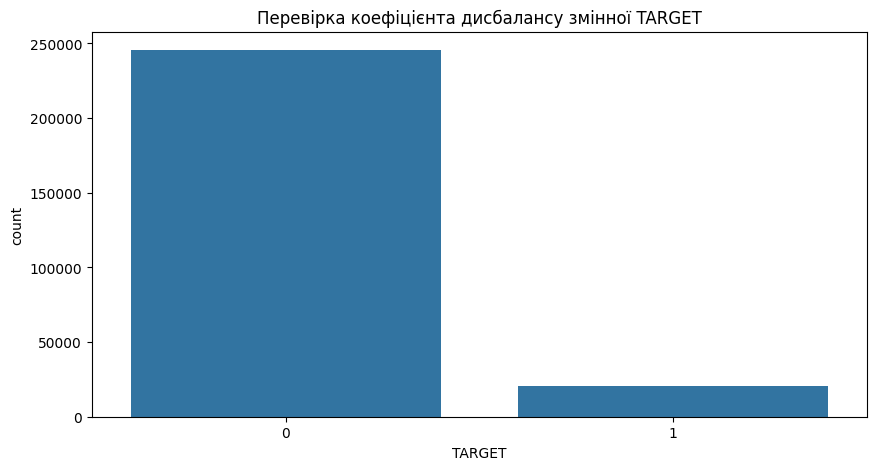

In [208]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['TARGET'], data = df)
plt.title('Перевірка коефіцієнта дисбалансу змінної TARGET')
plt.show()

**Спостереження**

- Ми маємо дисбаланс у змінній `TARGET` на основі % спостережень
 - Значення `TARGET` 1 - це клієнт, який має труднощі з оплатою (прострочення платежу більше ніж на X днів принаймні за одним з перших Y платежів за кредитом). Це лише 8,07% даних
 - Значення `TARGET` 0 - всі інші випадки, окрім 1. Це 91,93% даних

# Розподіл даних на основі `TARGET`

### Створіть новий фрейм даних зі значенням `TARGET` 1
- Значення `TARGET` 1 представляє клієнта з платіжними труднощами (він/вона прострочив платіж більш ніж на X днів принаймні по одному з перших Y платежів за кредитом). Це лише 8,07% даних

In [209]:
df1 = df[df['TARGET'] == 1]

In [210]:
df1.TARGET.value_counts()

TARGET
1    20533
Name: count, dtype: int64

### Створити новий фрейм даних зі значенням `TARGET` 0
- Значення `TARGET` 0 представляє всі інші випадки, крім 1. Це 91.93% даних

In [211]:
df0 = df[df['TARGET'] == 0]

In [212]:
df0.TARGET.value_counts()

TARGET
0    245459
Name: count, dtype: int64

# Одномірний аналіз категоріальних змінних

### Аналіз стовпця `NAME_CONTRACT_TYPE`

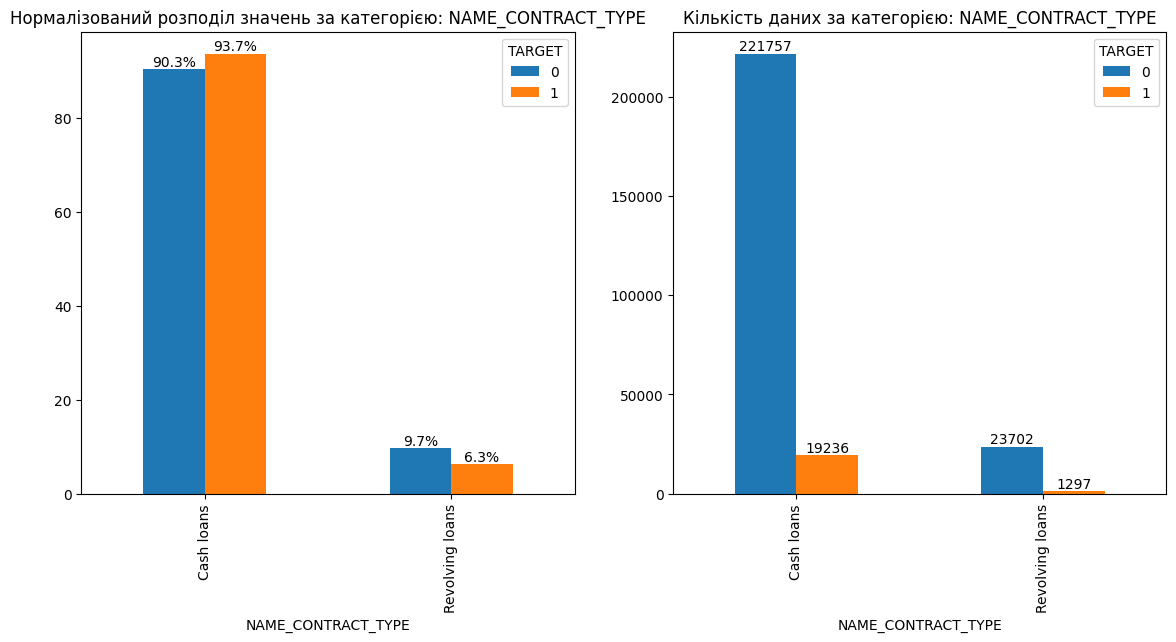

In [213]:
uni_cat_target_compare(df, 'NAME_CONTRACT_TYPE')

**Спостереження**

- Дивлячись на гістограми, ми не бачимо суттєвих відмінностей у `NAME_CONTRACT_TYPE` між клієнтами, які мають труднощі з оплатою, та клієнтами, які платять вчасно

**Висновок**
- Колонка `NAME_CONTRACT_TYPE` не надає жодних переконливих доказів на користь клієнтів, які мають труднощі з оплатою АБО вчасно сплачують

# ДЗ 4. Одновимірний аналіз категоріальної колонки

За наведеним прикладом вище, проведіть аналіз залежності між категоріальною колонкою і цільовою для колонок
- CODE_GENDER
- FLAG_OWN_CAR

Опціонально (для тих, кому цікаво дослідити більше даних)
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS


Чи є вплив цих змінних на цільову та який саме?

### Аналіз стовпця `CODE_GENDER`

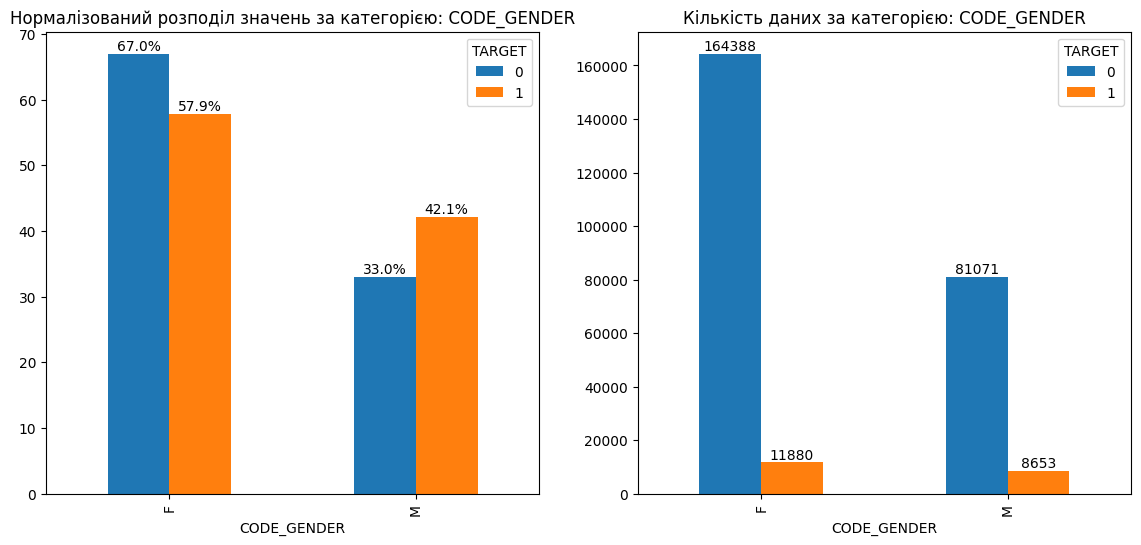

In [214]:
uni_cat_target_compare(df, 'CODE_GENDER')

**Спостереження**

- Дивлячись на гістограми, ми бачимо помiрнi відмінностi у `CODE_GENDER` між клієнтами які мають труднощі з оплатою, та клієнтами, які платять вчасно

**Висновок**
- Колонка `CODE_GENDER` не надає жодних переконливих доказів на користь клієнтів, які мають труднощі з оплатою АБО вчасно сплачують

### Аналіз стовпця `FLAG_OWN_CAR`

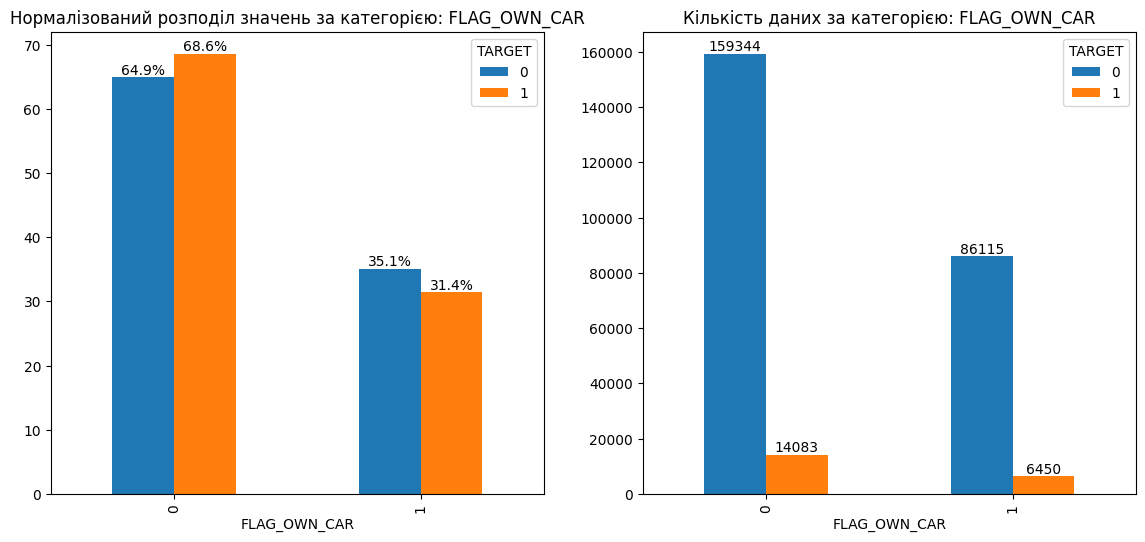

In [215]:
uni_cat_target_compare(df, 'FLAG_OWN_CAR')

**Спостереження**

- Дивлячись на гістограми, ми не бачимо суттєвих відмінностей у `FLAG_OWN_CAR` між клієнтами, які мають труднощі з оплатою, та клієнтами, які платять вчасно

**Висновок**
- Колонка `FLAG_OWN_CAR` не надає жодних переконливих доказів на користь клієнтів, які мають труднощі з оплатою АБО вчасно сплачують

### Аналіз стовпця `NAME_INCOME_TYPE`

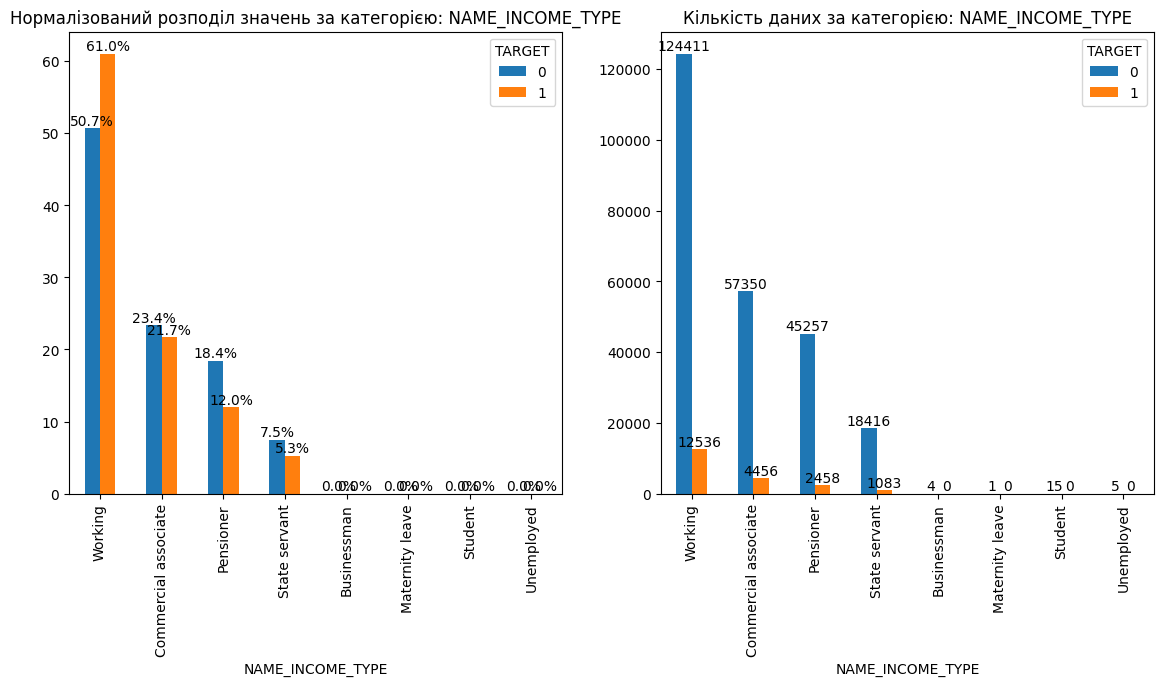

In [216]:
uni_cat_target_compare(df, 'NAME_INCOME_TYPE')

**Спостереження**

- Дивлячись на гістограми, ми бачимо певнi відмінностi у `NAME_INCOME_TYPE` між клієнтами, між клієнтами, які мають труднощі з оплатою, та клієнтами, які платять вчасно

**Висновок**
- Колонка `NAME_INCOME_TYPE` надає помiрнi докази на користь клієнтів, які мають труднощі з оплатою АБО вчасно сплачують

### Аналіз стовпця `NAME_EDUCATION_TYPE`

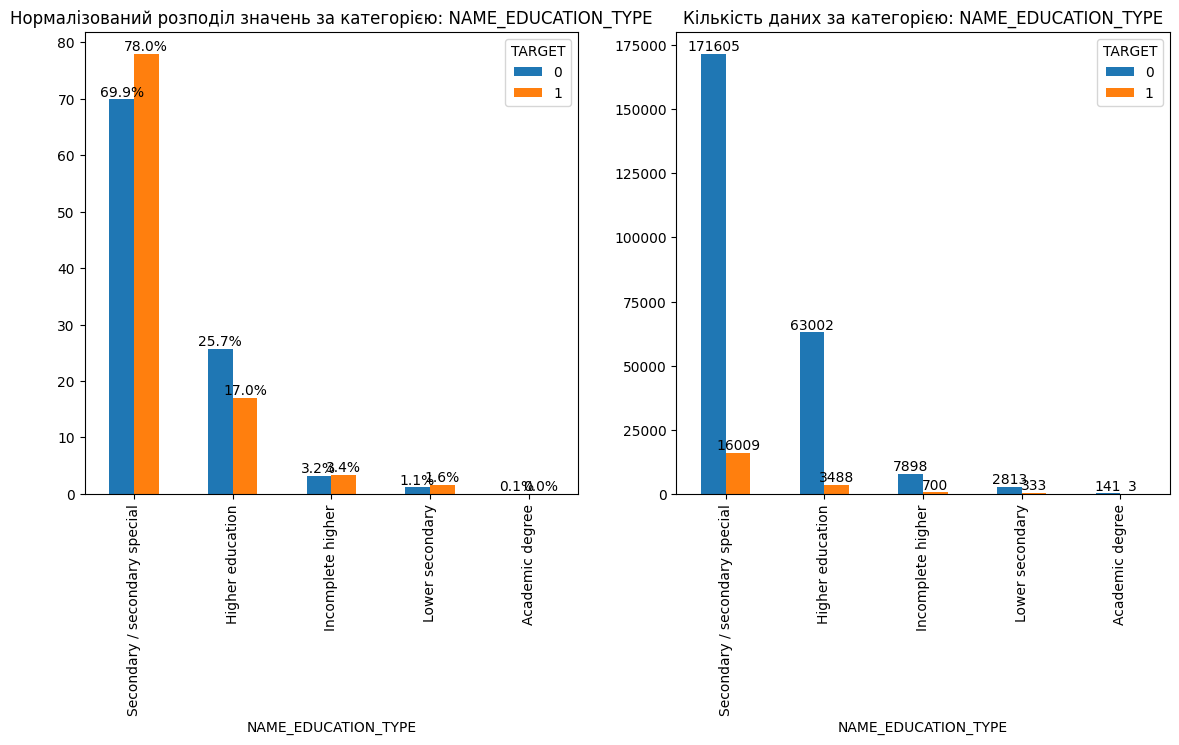

In [217]:
uni_cat_target_compare(df, 'NAME_EDUCATION_TYPE')

**Спостереження**

- Дивлячись на гістограми, ми бачимо певнi відмінностi у `NAME_EDUCATION_TYPE` між клієнтами, між клієнтами, які мають труднощі з оплатою, та клієнтами, які платять вчасно

**Висновок**
- Колонка `NAME_EDUCATION_TYPE` надає помiрнi докази на користь клієнтів, які мають труднощі з оплатою АБО вчасно сплачують

### Аналіз стовпця `NAME_FAMILY_STATUS`

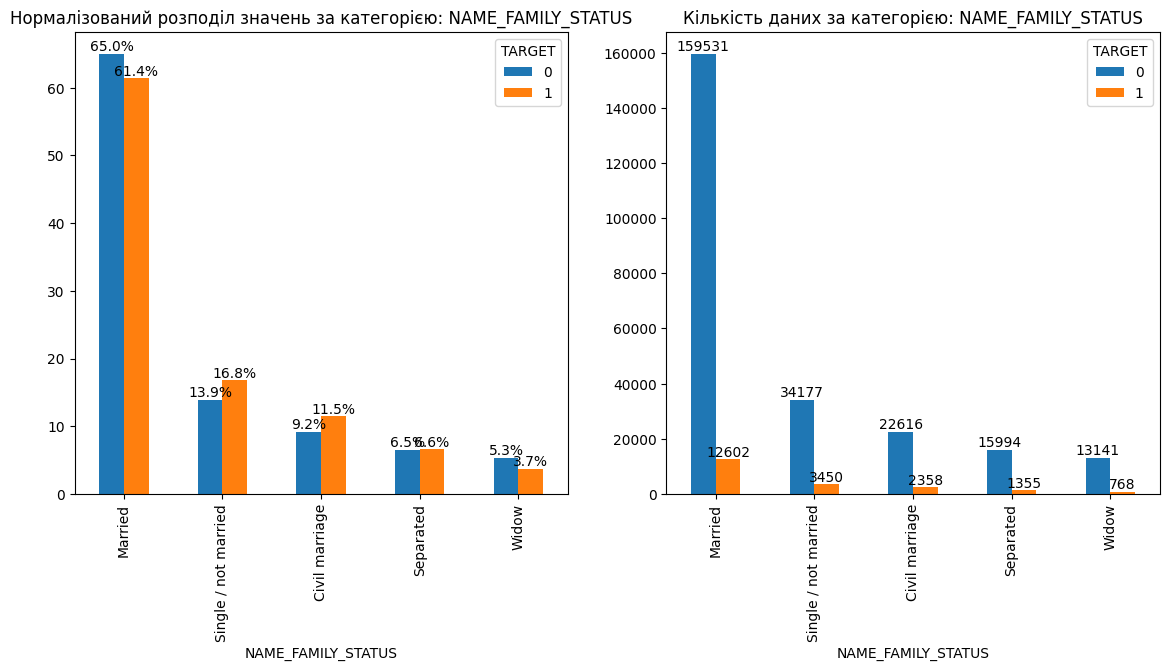

In [218]:
uni_cat_target_compare(df, 'NAME_FAMILY_STATUS')

**Спостереження**

- Дивлячись на гістограми, ми не бачимо суттєвих відмінностей у `NAME_FAMILY_STATUS` між клієнтами, які мають труднощі з оплатою, та клієнтами, які платять вчасно

**Висновок**
- Колонка `NAME_FAMILY_STATUS` не надає жодних переконливих доказів на користь клієнтів, які мають труднощі з оплатою АБО вчасно сплачують

# Кореляційний аналіз числових змінних

### Побудова кореляційної матриці для випадків із платіжними труднощами

In [219]:
df1.select_dtypes(include='number').shape

(20533, 69)

Є 67 числових стовпчиків. Створимо кореляційну матрицб `corr` для кращого перегляду результатів

In [220]:
corr_df1 = df1.select_dtypes(include='number').corr()

In [221]:
corr_df1.head()

SK_ID_CURR  TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
SK_ID_CURR             1.00     NaN          0.00             0.00   
TARGET                  NaN     NaN           NaN              NaN   
FLAG_OWN_CAR           0.00     NaN          1.00             0.02   
FLAG_OWN_REALTY        0.00     NaN          0.02             1.00   
CNT_CHILDREN          -0.01     NaN          0.06             0.01   

                 CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR              -0.01             -0.01       -0.00        -0.01   
TARGET                    NaN               NaN         NaN          NaN   
FLAG_OWN_CAR             0.06              0.02        0.09         0.14   
FLAG_OWN_REALTY          0.01              0.01       -0.02         0.00   
CNT_CHILDREN             1.00              0.01        0.00         0.04   

                 AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
SK_ID_CURR                 -0.00                        0.01        0.01   
TARGET                       NaN                         NaN         NaN   
FLAG_OWN_CAR                0.10                        0.03       -0.08   
FLAG_OWN_REALTY            -0.03                        0.03        0.11   
CNT_CHILDREN               -0.01                       -0.03       -0.27   

                 DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
SK_ID_CURR               -0.00              -0.00            -0.00   
TARGET                     NaN                NaN              NaN   
FLAG_OWN_CAR             -0.11              -0.07             0.02   
FLAG_OWN_REALTY           0.05               0.01            -0.03   
CNT_CHILDREN             -0.19              -0.15             0.04   

                 FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
SK_ID_CURR              NaN            0.00             0.01   
TARGET                  NaN             NaN              NaN   
FLAG_OWN_CAR            NaN            0.11            -0.02   
FLAG_OWN_REALTY         NaN           -0.05            -0.15   
CNT_CHILDREN            NaN            0.19             0.05   

                 FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
SK_ID_CURR                  -0.01        0.02        0.00            -0.01   
TARGET                        NaN         NaN         NaN              NaN   
FLAG_OWN_CAR                 0.01       -0.00        0.03             0.11   
FLAG_OWN_REALTY             -0.01       -0.05        0.03             0.02   
CNT_CHILDREN                 0.00       -0.03        0.01             0.89   

                 REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
SK_ID_CURR                      -0.01                        -0.01   
TARGET                            NaN                          NaN   
FLAG_OWN_CAR                    -0.01                        -0.01   
FLAG_OWN_REALTY                 -0.01                        -0.01   
CNT_CHILDREN                     0.04                         0.04   

                 HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
SK_ID_CURR                          0.01                       -0.01   
TARGET                               NaN                         NaN   
FLAG_OWN_CAR                        0.01                       -0.00   
FLAG_OWN_REALTY                    -0.12                       -0.06   
CNT_CHILDREN                       -0.02                       -0.02   

                 REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
SK_ID_CURR                             0.00                         0.00   
TARGET                                  NaN                          NaN   
FLAG_OWN_CAR                           0.02                         0.03   
FLAG_OWN_REALTY                       -0.04                        -0.02   
CNT_CHILDREN                          -0.02                        -0.01   

                 REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
SK_ID_CURR                   

Перегляд повної кореляційної матриці

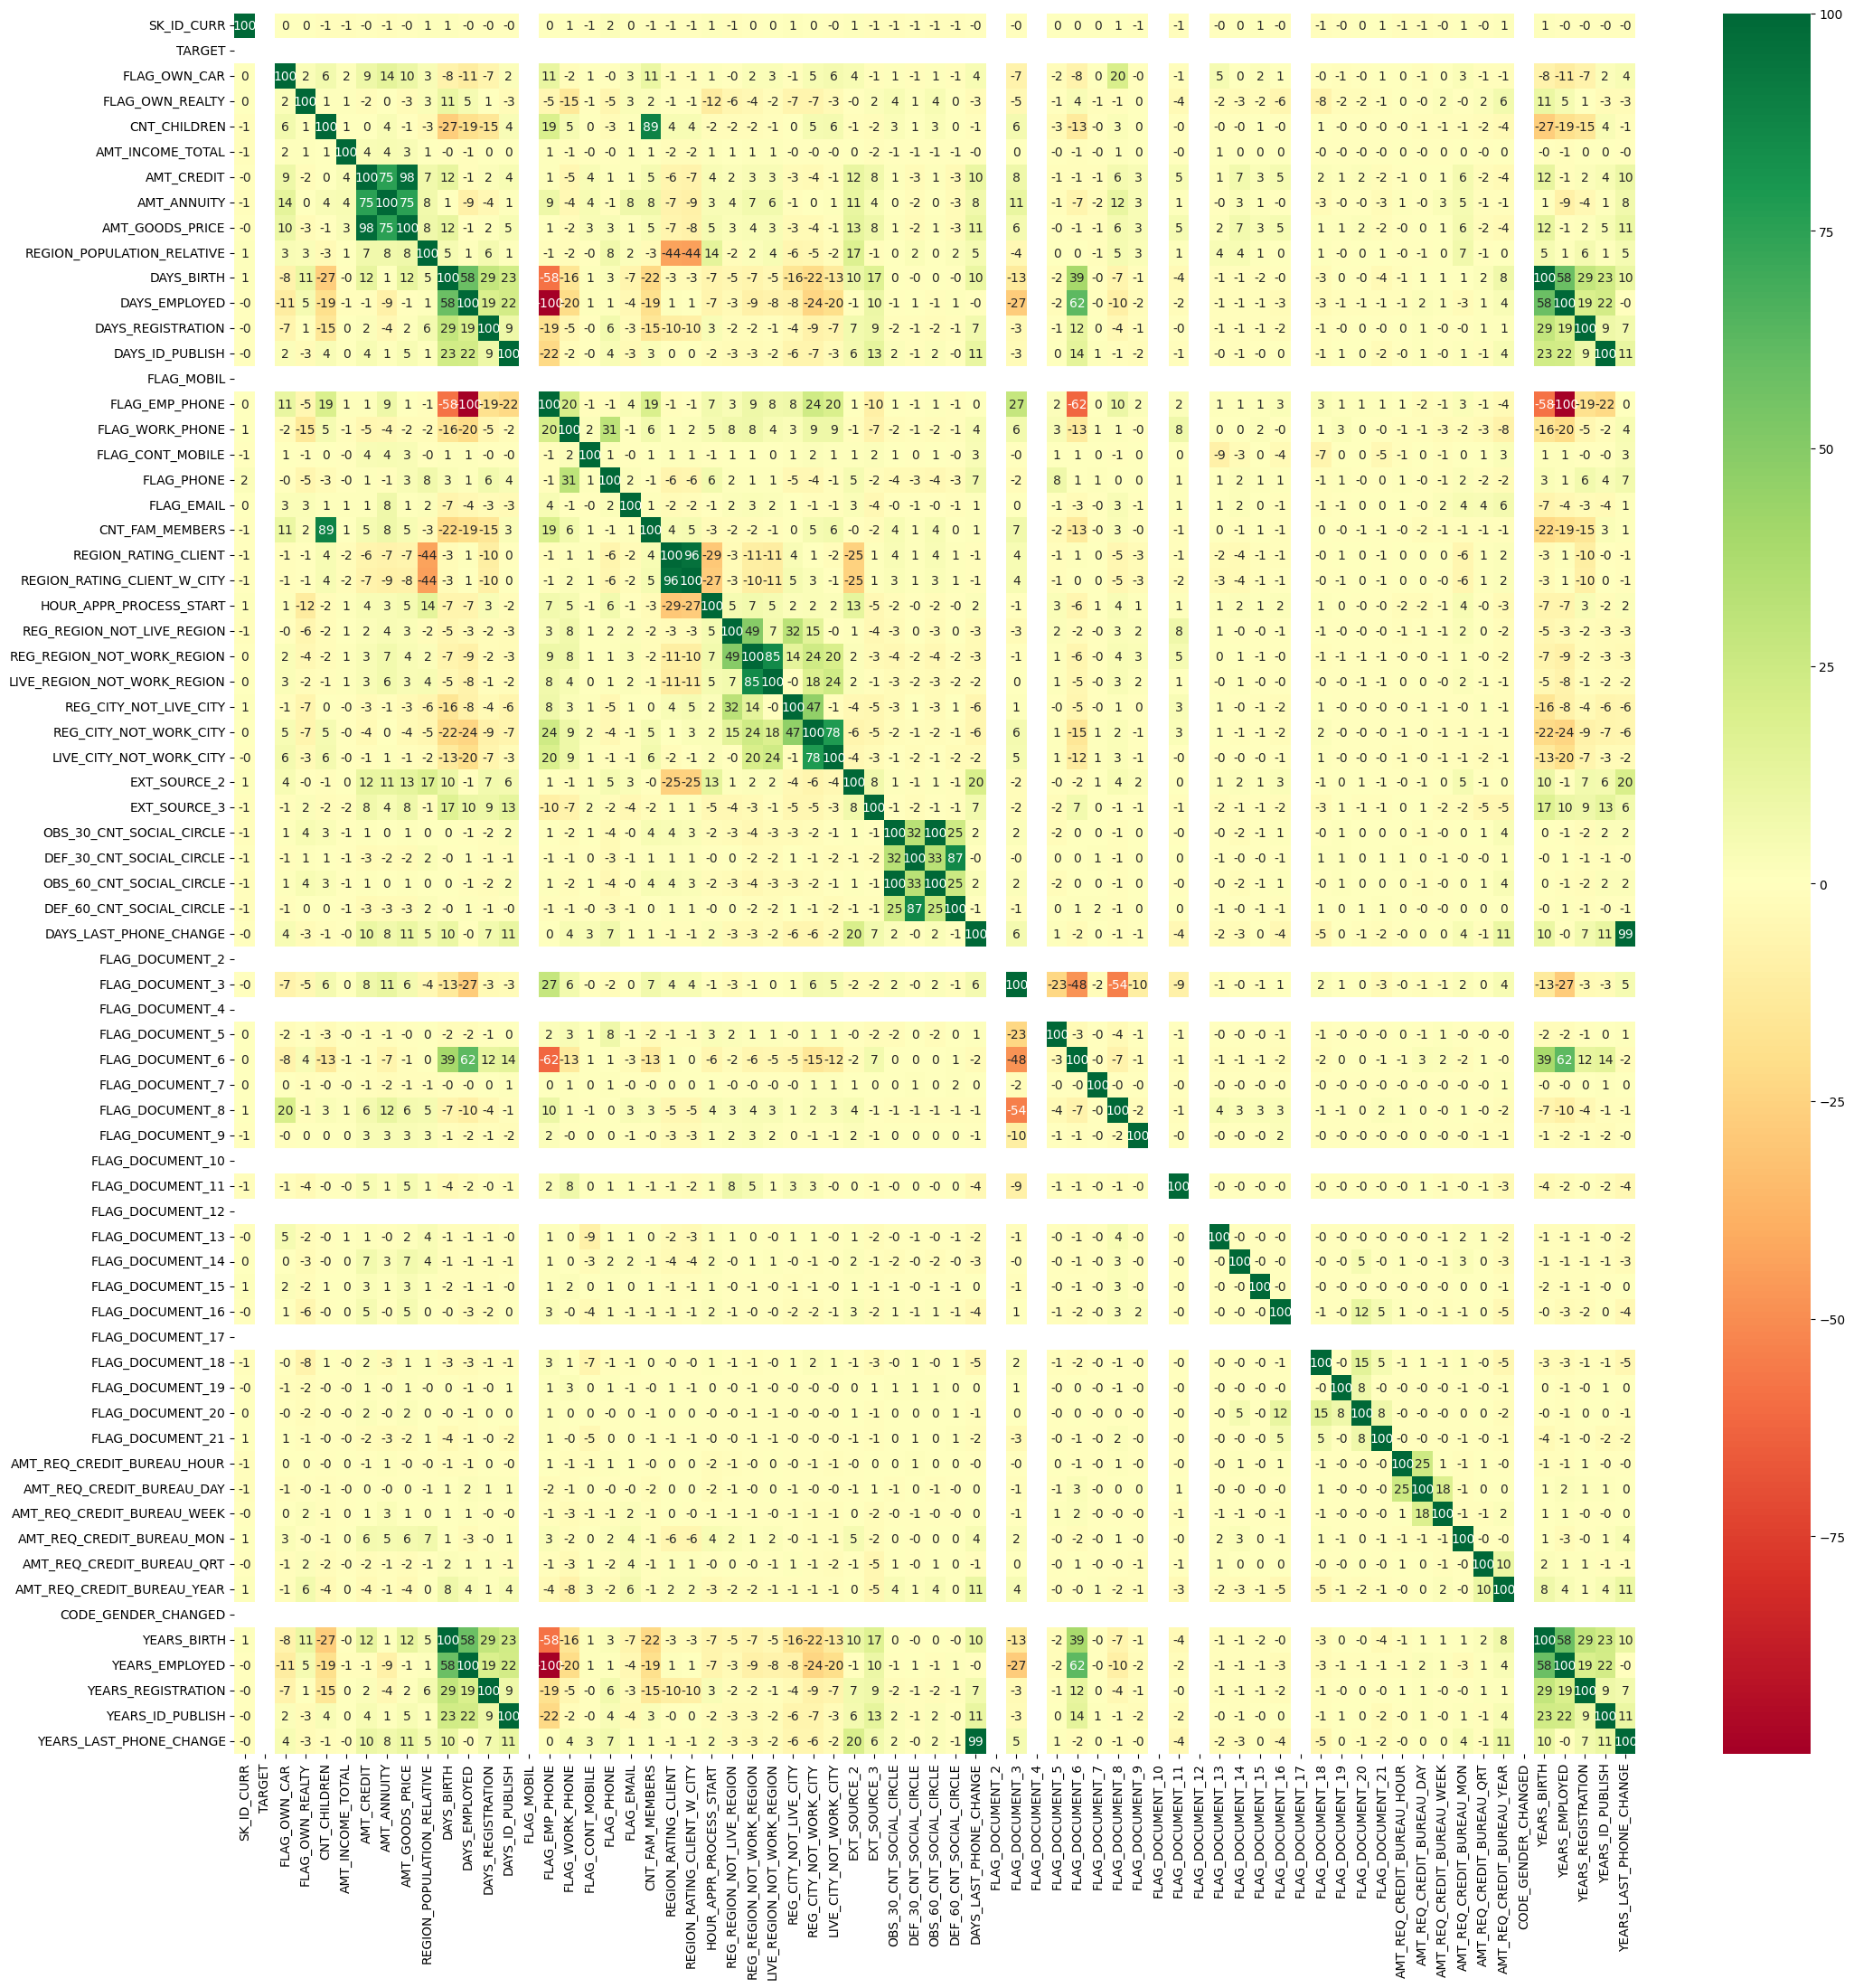

In [222]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df1*100, annot = True, cmap = "RdYlGn", cbar = True, fmt='.0f')
plt.show()

Створимо теплову карту для перегляду кореляцій вище 80% і 99,99%

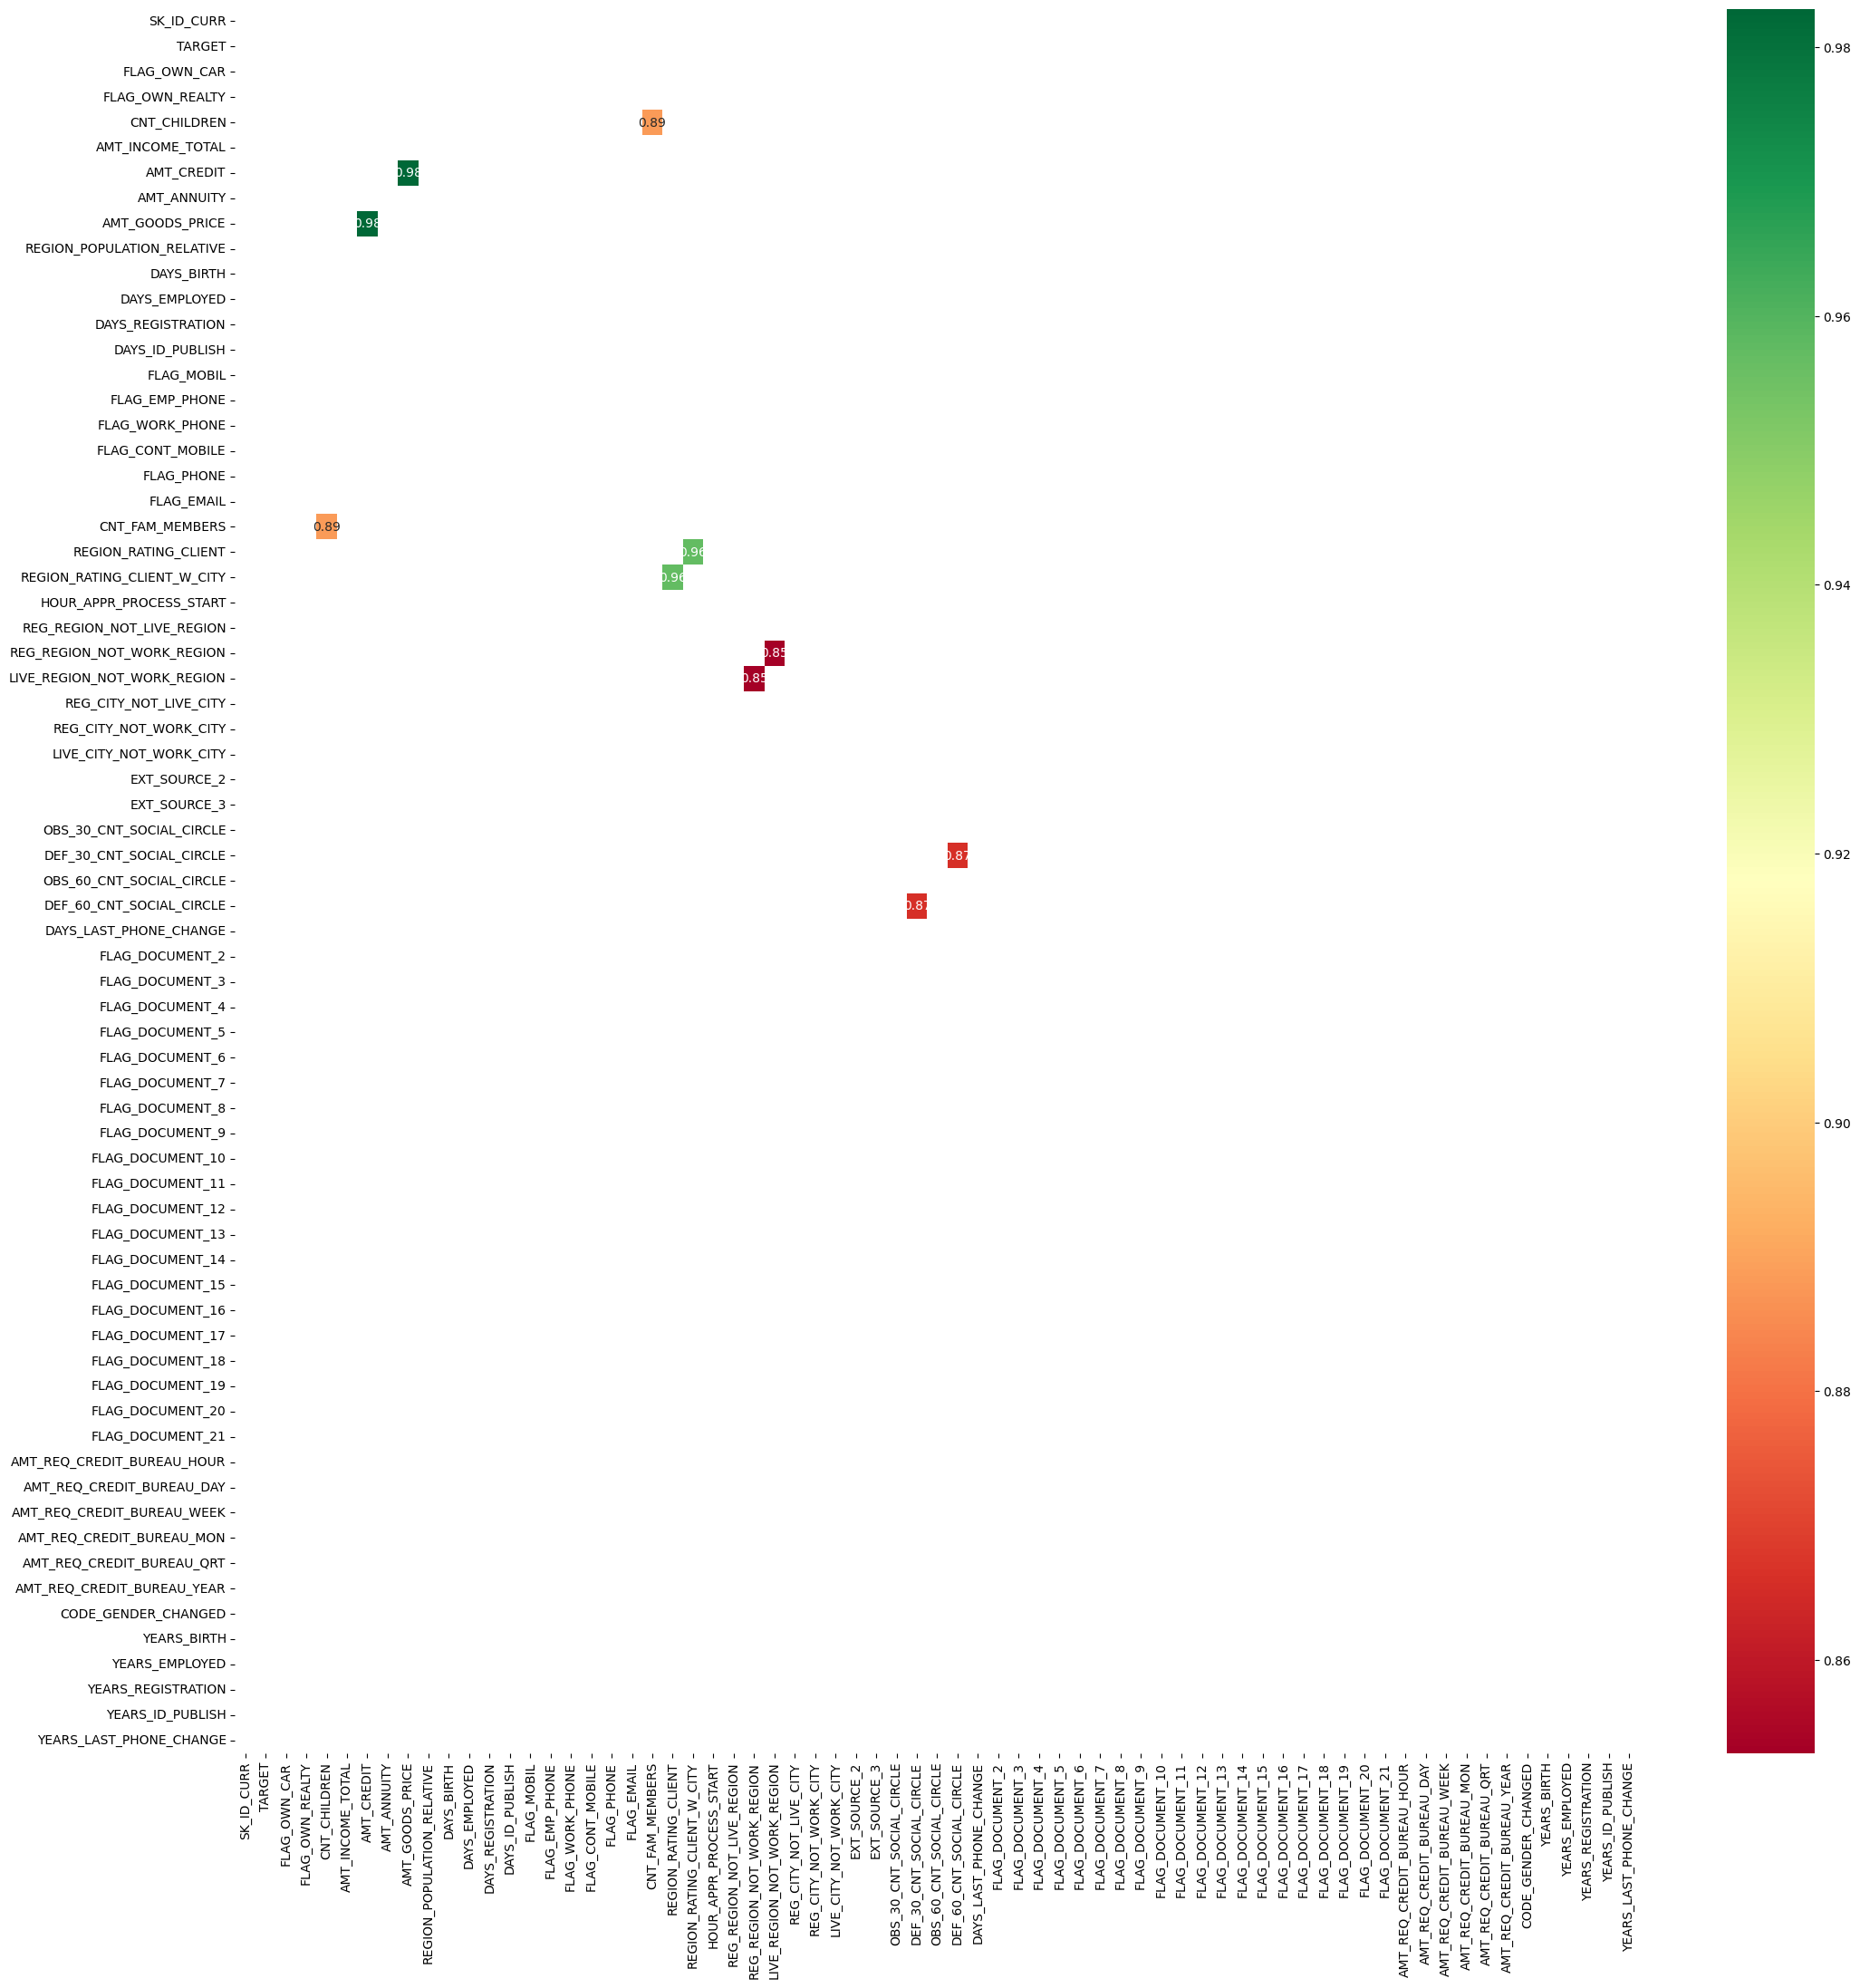

In [223]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df1[(corr_df1 >= 0.8) & (corr_df1 < 0.99)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Подивимось на 10 найкращих кореляцій для випадків із платіжними труднощами

In [224]:
corr_df1[corr_df1 <= 0.99].unstack().sort_values(ascending = False).head(22)

AMT_GOODS_PRICE              AMT_CREDIT                    0.98
AMT_CREDIT                   AMT_GOODS_PRICE               0.98
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.96
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.96
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.89
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.89
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.87
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.87
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.85
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.85
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.78
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.78
AMT_GOODS_PRICE              AMT_ANNUITY                   0.75
AMT_ANNUITY                  AMT_GOODS_PRICE               0.75
                             AMT_CREDIT                    0.75
AMT_CREDIT                   AMT_ANNUITY                   0.75
FLAG_DOCUMENT_6              YEARS_EMPLOYED                0.62
YEARS_EMPLOYED               FLAG_DOCUMENT_6               0.62
FLAG_DOCUMENT_6              DAYS_EMPLOYED                 0.62
DAYS_EMPLOYED                FLAG_DOCUMENT_6               0.62
                             DAYS_BIRTH                    0.58
DAYS_BIRTH                   DAYS_EMPLOYED                 0.58
dtype: float64

Оскільки у нас є комбінації, що повторюються, дивлячись на наведену вище таблицю і видаляючи дублі, ми отримуємо топ-10 кореляцій, як показано нижче:

- AMT_GOODS_PRICE -              AMT_CREDIT                    0.98
- REGION_RATING_CLIENT -         REGION_RATING_CLIENT_W_CITY   0.96
- CNT_FAM_MEMBERS -              CNT_CHILDREN                  0.89
- DEF_60_CNT_SOCIAL_CIRCLE -     DEF_30_CNT_SOCIAL_CIRCLE      0.87
- REG_REGION_NOT_WORK_REGION -   LIVE_REGION_NOT_WORK_REGION   0.85
- LIVE_CITY_NOT_WORK_CITY -      REG_CITY_NOT_WORK_CITY        0.78
- AMT_ANNUITY -                  AMT_GOODS_PRICE               0.75
- AMT_ANNUITY -                  AMT_CREDIT                    0.75
- DAYS_EMPLOYED -                FLAG_DOCUMENT_6               0.62
- DAYS_BIRTH -                   DAYS_EMPLOYED                 0.58

### Побудова кореляційної матриці для випадків із вчасними платежеми

In [225]:
df0.select_dtypes(include='number').shape

(245459, 69)

Є 67 числових стовпчиків. Створимо кореляційну матрицю `corr` для кращого перегляду результатів

In [226]:
corr_df0 = df0.select_dtypes(include='number').corr()

In [227]:
corr_df0.head()

SK_ID_CURR  TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
SK_ID_CURR             1.00     NaN          0.00             0.00   
TARGET                  NaN     NaN           NaN              NaN   
FLAG_OWN_CAR           0.00     NaN          1.00            -0.01   
FLAG_OWN_REALTY        0.00     NaN         -0.01             1.00   
CNT_CHILDREN          -0.00     NaN          0.11            -0.00   

                 CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR              -0.00              0.00       -0.00         0.00   
TARGET                    NaN               NaN         NaN          NaN   
FLAG_OWN_CAR             0.11              0.20        0.12         0.14   
FLAG_OWN_REALTY         -0.00              0.00       -0.05        -0.01   
CNT_CHILDREN             1.00              0.03        0.00         0.02   

                 AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
SK_ID_CURR                 -0.00                       -0.00        0.00   
TARGET                       NaN                         NaN         NaN   
FLAG_OWN_CAR                0.12                        0.04       -0.15   
FLAG_OWN_REALTY            -0.05                        0.01        0.12   
CNT_CHILDREN               -0.00                       -0.02       -0.35   

                 DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
SK_ID_CURR                0.00               0.00            -0.00   
TARGET                     NaN                NaN              NaN   
FLAG_OWN_CAR             -0.16              -0.09            -0.02   
FLAG_OWN_REALTY           0.07               0.02            -0.01   
CNT_CHILDREN             -0.25              -0.19             0.03   

                 FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
SK_ID_CURR              NaN           -0.00            -0.00   
TARGET                  NaN             NaN              NaN   
FLAG_OWN_CAR            NaN            0.16             0.01   
FLAG_OWN_REALTY         NaN           -0.07            -0.11   
CNT_CHILDREN            NaN            0.25             0.05   

                 FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
SK_ID_CURR                   0.00        0.00        0.00            -0.00   
TARGET                        NaN         NaN         NaN              NaN   
FLAG_OWN_CAR                -0.01       -0.01        0.03             0.16   
FLAG_OWN_REALTY              0.01       -0.04        0.03             0.00   
CNT_CHILDREN                 0.00       -0.03        0.02             0.88   

                 REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
SK_ID_CURR                      -0.00                        -0.00   
TARGET                            NaN                          NaN   
FLAG_OWN_CAR                    -0.02                        -0.02   
FLAG_OWN_REALTY                  0.01                         0.01   
CNT_CHILDREN                     0.02                         0.02   

                 HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
SK_ID_CURR                         -0.00                        0.00   
TARGET                               NaN                         NaN   
FLAG_OWN_CAR                        0.01                       -0.00   
FLAG_OWN_REALTY                    -0.10                       -0.03   
CNT_CHILDREN                       -0.00                       -0.01   

                 REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
SK_ID_CURR                             0.00                         0.00   
TARGET                                  NaN                          NaN   
FLAG_OWN_CAR                           0.04                         0.05   
FLAG_OWN_REALTY                       -0.03                        -0.02   
CNT_CHILDREN                           0.01                         0.02   

                 REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
SK_ID_CURR                   

Створимо теплову карту для перегляду кореляцій вище 80% і 99,99%

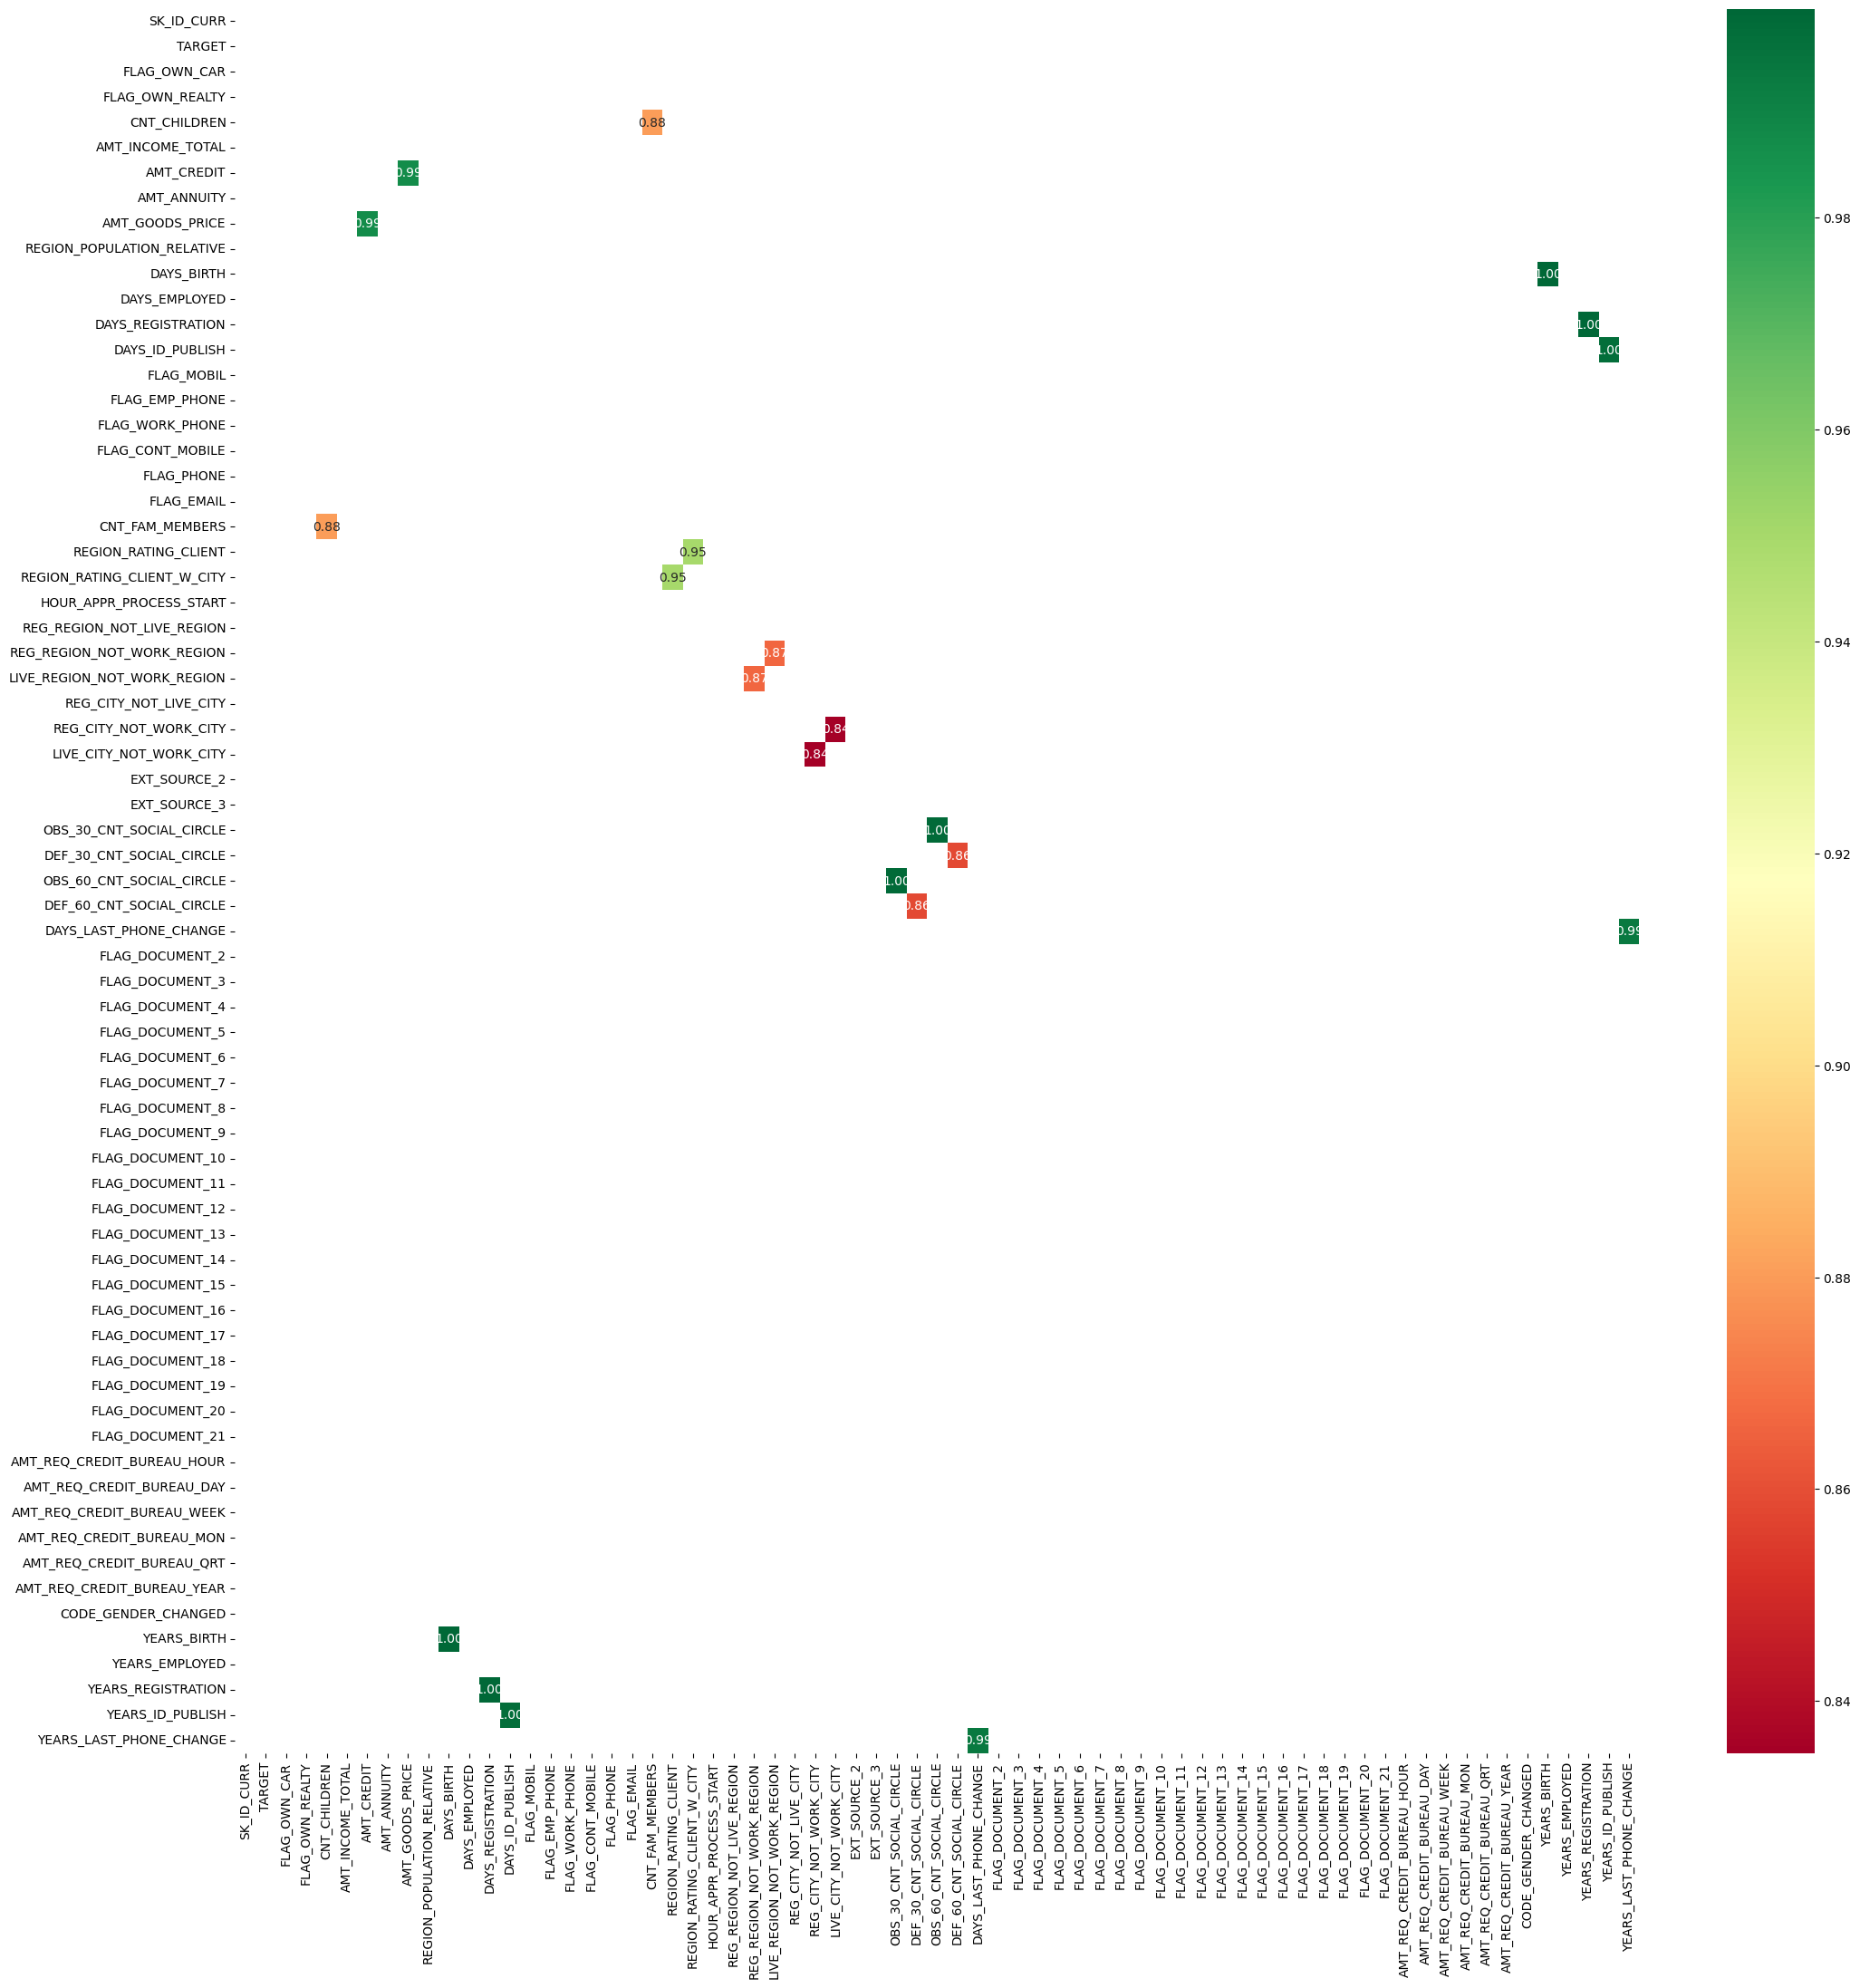

In [228]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df0[(corr_df0 >= 0.8) & (corr_df0 < 0.9999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Подивимось на 10 найкращих кореляцій для вчасних платежів

In [229]:
corr_df0[corr_df0 <= 0.99].unstack().sort_values(ascending = False).head(28)

AMT_GOODS_PRICE              AMT_CREDIT                    0.99
AMT_CREDIT                   AMT_GOODS_PRICE               0.99
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.95
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.88
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.88
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.87
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.87
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.86
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.86
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.84
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.84
AMT_GOODS_PRICE              AMT_ANNUITY                   0.78
AMT_ANNUITY                  AMT_GOODS_PRICE               0.78
                             AMT_CREDIT                    0.77
AMT_CREDIT                   AMT_ANNUITY                   0.77
DAYS_EMPLOYED                DAYS_BIRTH                    0.63
DAYS_BIRTH                   DAYS_EMPLOYED                 0.63
                             YEARS_EMPLOYED                0.63
YEARS_EMPLOYED               DAYS_BIRTH                    0.63
DAYS_EMPLOYED                YEARS_BIRTH                   0.63
YEARS_BIRTH                  DAYS_EMPLOYED                 0.63
YEARS_EMPLOYED               YEARS_BIRTH                   0.63
YEARS_BIRTH                  YEARS_EMPLOYED                0.63
YEARS_EMPLOYED               FLAG_DOCUMENT_6               0.60
FLAG_DOCUMENT_6              YEARS_EMPLOYED                0.60
DAYS_EMPLOYED                FLAG_DOCUMENT_6               0.60
FLAG_DOCUMENT_6              DAYS_EMPLOYED                 0.60
dtype: float64

Оскільки у нас є комбінації, що повторюються, дивлячись на наведену вище таблицю і видаляючи дублі, ми отримуємо топ-10 кореляцій, як показано нижче:

- AMT_GOODS_PRICE              AMT_CREDIT                    0.99
- REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
- CNT_FAM_MEMBERS              CNT_CHILDREN                  0.88
- REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.86
- DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.86
- LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.83
- AMT_ANNUITY                  AMT_GOODS_PRICE               0.78
- AMT_ANNUITY                  AMT_CREDIT                    0.77
- DAYS_BIRTH                   DAYS_EMPLOYED                 0.63
- DAYS_EMPLOYED                FLAG_DOCUMENT_6               0.60

### Порівняємо 10 найкращих кореляцій між випадками із платіжними труднощами та вчасними платежами

**Спостереження**

- Топ-10 кореляцій для Труднощів з оплатою та Вчасних платежів однакові, за винятком незначних відмінностей у відсотках кореляції
- Найвища кореляція для комбінації `AMT_GOODS_PRICE` та `AMT_CREDIT`.
- Для набору даних "Труднощі з оплатою" кореляція між `AMT_GOODS_PRICE` та `AMT_CREDIT` становить 0,98
- Для набору даних "Вчасні платежі" кореляція між `AMT_GOODS_PRICE` та `AMT_CREDIT` становить 0,99

# Одновимірний аналіз числових змінних

### Аналіз стовпця `AMT_CREDIT`

#### Пошук викидів в `AMT_CREDIT` при випадках із платіжними труднощами

Розрахунок IQR (Inter Quartile range)

In [230]:
Q1 = df1['AMT_CREDIT'].quantile(0.25)
Q3 = df1['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

466317.0


Значення *до* (Q1 - 1.5 * IQR) та *після* (Q3 + 1.5 * IQR) є викидами.

In [231]:
Min_value1 = (Q1 - 1.5 * IQR)
Max_value1 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value1))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value1))

Мінімальне значення, до якого існують викиди: -410602.5
Максимальне значення, після якого існують викиди: 1454665.5


#### Пошук викидів в `AMT_CREDIT` при випадках із вчасними оплатами

Розрахунок IQR (Inter Quartile range)

In [232]:
Q1 = df0['AMT_CREDIT'].quantile(0.25)
Q3 = df0['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

549432.0


Значення *до* (Q1 - 1.5 * IQR) та *після* (Q3 + 1.5 * IQR) є викидами.

In [233]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value0))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value0))

Мінімальне значення, до якого існують викиди: -554148.0
Максимальне значення, після якого існують викиди: 1643580.0


Видалення викидів і побудова діаграми розподілу

In [234]:
def kde_no_outliers(df0, df1, Max_value0, Max_value1, column):
  plt.figure(figsize = (14,6))
  sns.kdeplot(df1[df1[column] <= Max_value1][column],label = 'Payment difficulties')
  sns.kdeplot(df0[df0[column] <= Max_value0][column],label = 'On-Time Payments')
  plt.ticklabel_format(style='plain', axis='x')
  plt.xticks(rotation = 45)
  plt.legend()
  plt.show()

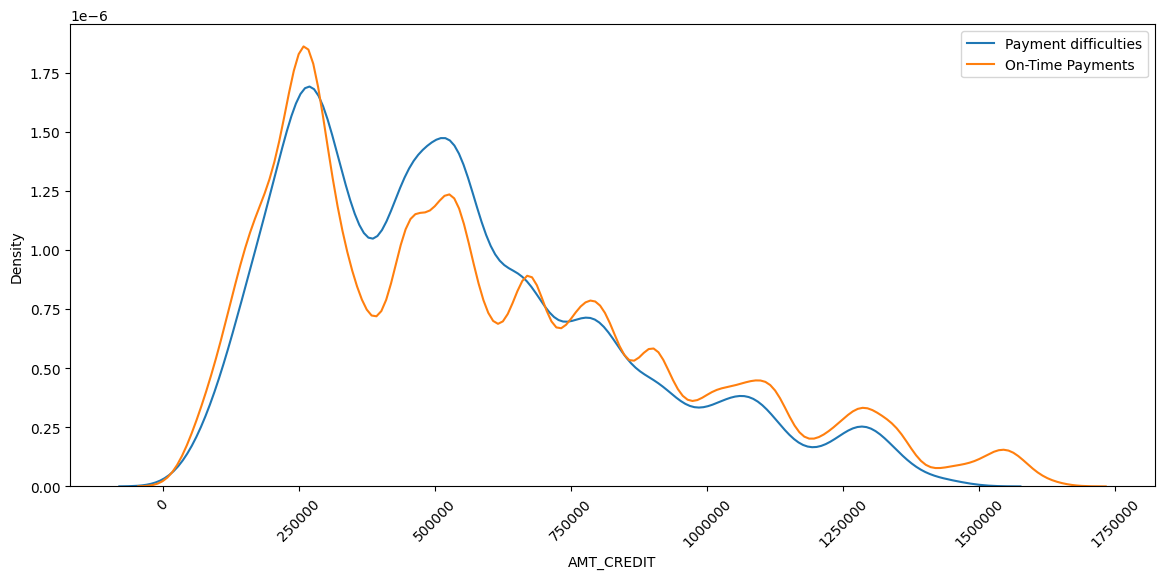

In [235]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'AMT_CREDIT')

**Спостереження**

- Для `AMT_CREDIT` від 250000 до приблизно 650000 більше клієнтів мають труднощі з оплатою
- Для `AMT_CREDIT` > 750000 більше клієнтів, які вчасно здійснюють платежі

# ДЗ 5. Одновимірний аналіз числової колонки

За наведеним вище прикладом, проведіть одновимірний аналіз (виявлення викидів, їх усунення та побудова KDE  графіку) для числових змінних
- `YEARS_BIRTH`
- `AMT_GOODS_PRICE`
- `DAYS_EMPLOYED`

Опціонально:
- `CNT_CHILDREN`
- `AMT_INCOME_TOTAL`

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної двійки змінних.

Зробіть висновки з аналізу.

### Аналіз стовпця `YEARS_BIRTH`

In [236]:
Q1 = df1['YEARS_BIRTH'].quantile(0.25)
Q3 = df1['YEARS_BIRTH'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

17.0


In [237]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value0))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value0))

Мінімальне значення, до якого існують викиди: 6.5
Максимальне значення, після якого існують викиди: 74.5


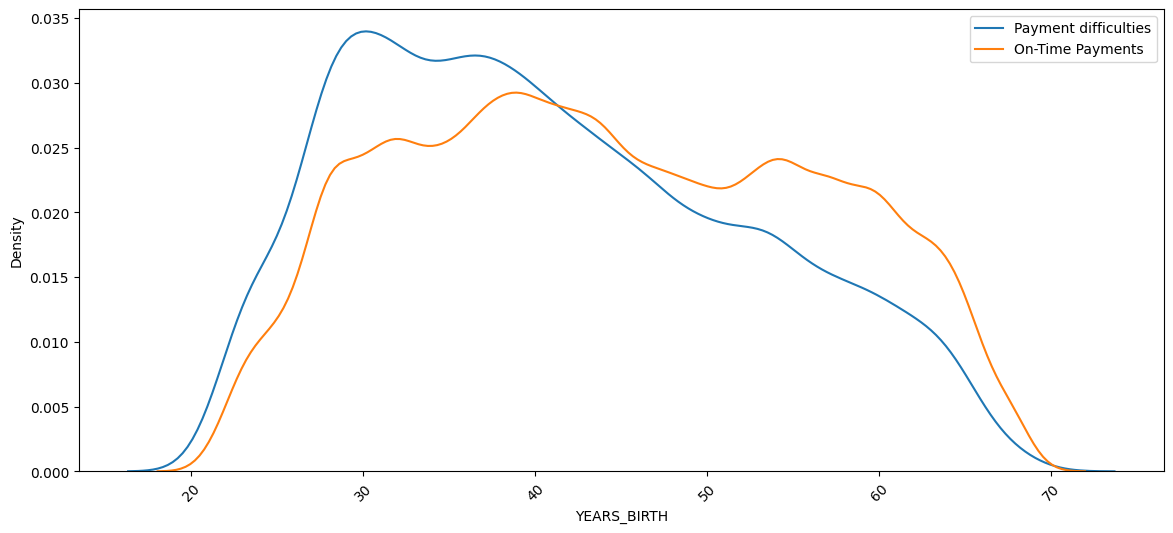

In [238]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'YEARS_BIRTH')

**Спостереження**

- Для `YEARS_BIRTH` зi значеннями в iнтервалi від 30 до приблизно 40 рокiв клієнти мають труднощі з оплатою
- Для `YEARS_BIRTH` зi значеннями в iнтервалi від 40 до приблизно 55 рокiв більше клієнтів, які вчасно здійснюють платежі

### Аналіз стовпця `AMT_GOODS_PRICE (Для споживчих кредитів це ціна товару, на який надається кредит)`

In [239]:
Q1 = df1['AMT_GOODS_PRICE'].quantile(0.25)
Q3 = df1['AMT_GOODS_PRICE'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

427500.0


In [240]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value0))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value0))

Мінімальне значення, до якого існують викиди: -393750.0
Максимальне значення, після якого існують викиди: 1316250.0


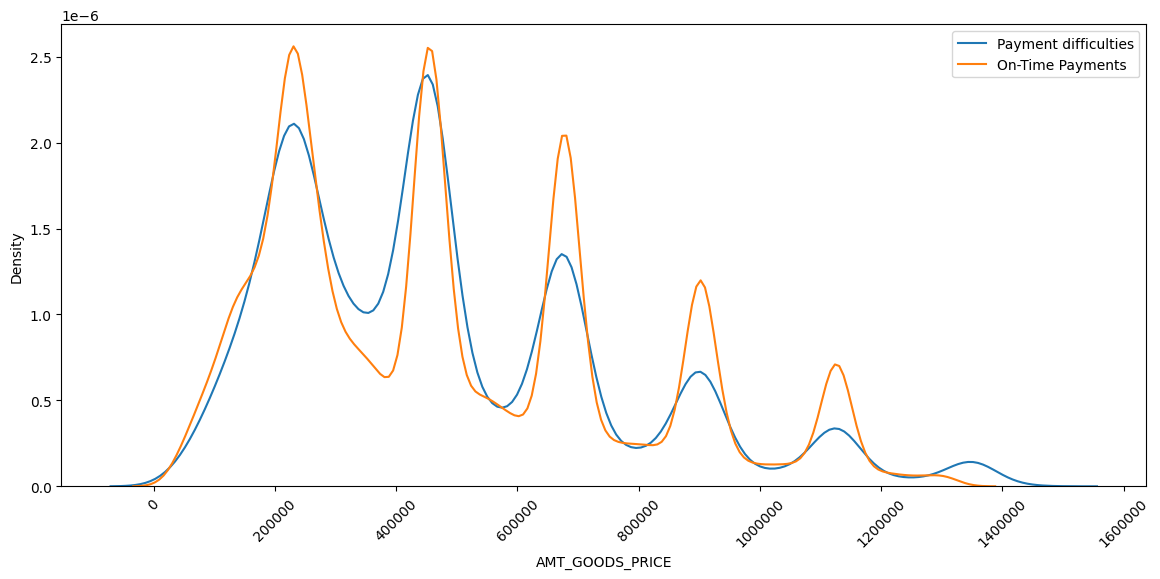

In [241]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'AMT_GOODS_PRICE')

**Спостереження**

- Для `AMT_GOODS_PRICE` зi значеннями приблизно 25000, 50000, 70000, 90000, 110000 бачимо рiвномiрнi сплески, що може свiдчити про те, що можливо данi корисно було б розбити на категорii згiдно цiни товару, що береться в кредит
- Для `AMT_GOODS_PRICE` зi значеннями вище 140000 більше клієнтів, які вчасно здійснюють платежі (можливо тому, що кредит на товари з високою цiною кредит надавався клiентам з бiльш високими доходами/власним майном/довгим перiодом працi або зi всiма цими чинниками разом)

### Аналіз стовпця `DAYS_EMPLOYED (перiод безперервноi працi на останньому мicцi)`

In [242]:
Q1 = df1['DAYS_EMPLOYED'].quantile(0.25)
Q3 = df1['DAYS_EMPLOYED'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

2682.0


In [243]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value0))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value0))

Мінімальне значення, до якого існують викиди: -3321.0
Максимальне значення, після якого існують викиди: 7407.0


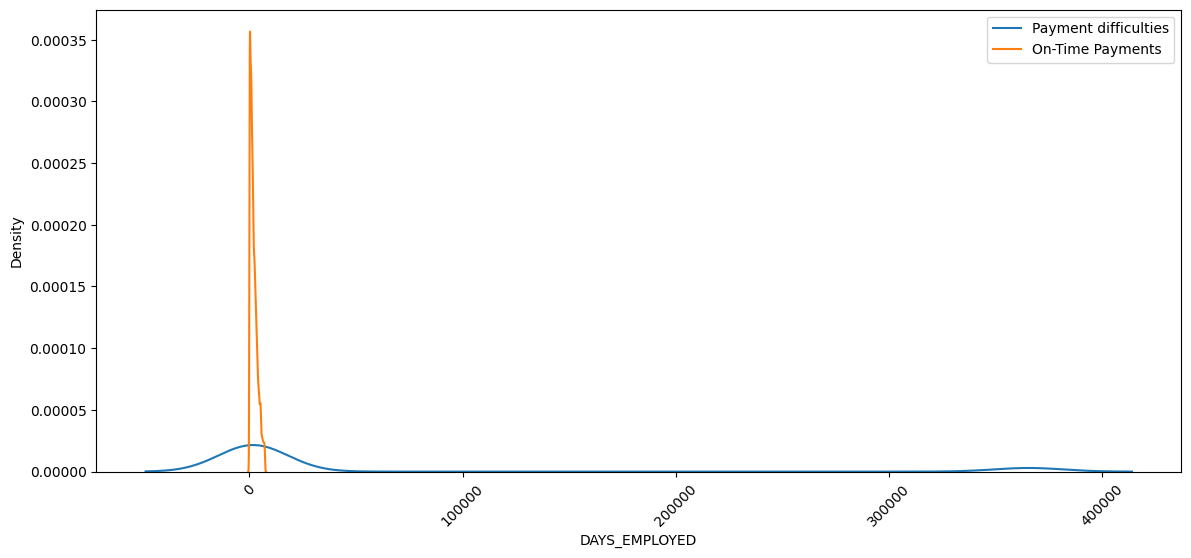

In [244]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'DAYS_EMPLOYED')

In [245]:
df1['DAYS_EMPLOYED'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count     20533.00
mean      45367.37
std      117975.58
min           0.00
25%         702.00
50%        1517.00
75%        3384.00
99%      365243.00
99.99%   365243.00
max      365243.00
Name: DAYS_EMPLOYED, dtype: float64

In [246]:
df0['DAYS_EMPLOYED'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count    245459.00
mean      69376.89
std      140680.24
min           0.00
25%        1002.00
50%        2376.00
75%        6197.00
99%      365243.00
99.99%   365243.00
max      365243.00
Name: DAYS_EMPLOYED, dtype: float64

In [247]:
def kde_no_outliers_for_one_df(df,Max_value, column, set_label):
  plt.figure(figsize = (14,6))
  sns.kdeplot(df[df[column] <= Max_value][column],label = set_label)
  plt.ticklabel_format(style='plain', axis='x')
  plt.xticks(rotation = 45)
  plt.legend()
  plt.show()

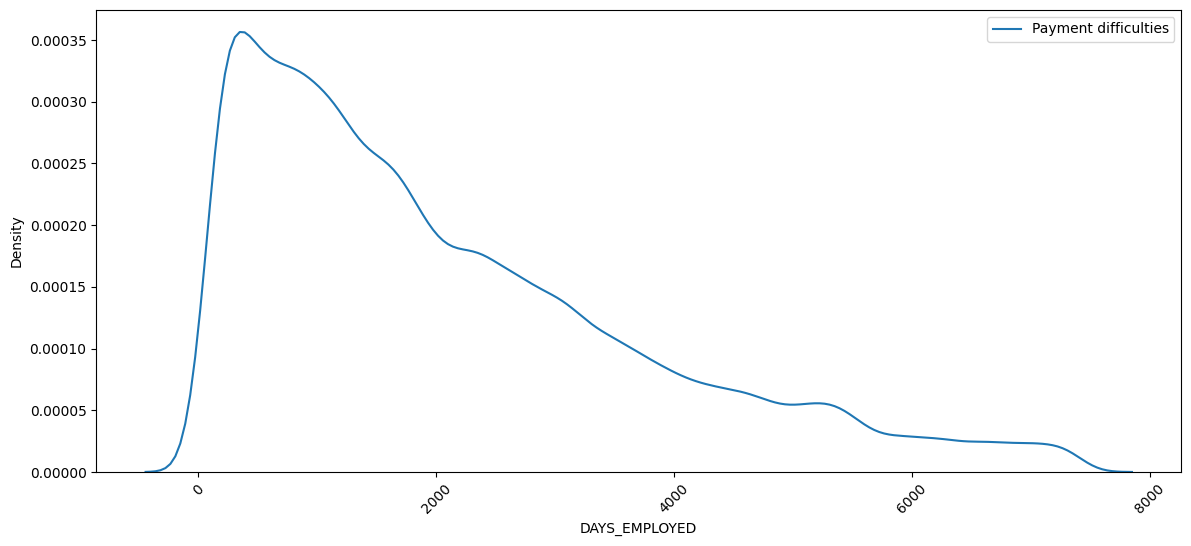

In [248]:
kde_no_outliers_for_one_df(df0, Max_value0, 'DAYS_EMPLOYED', "Payment difficulties")

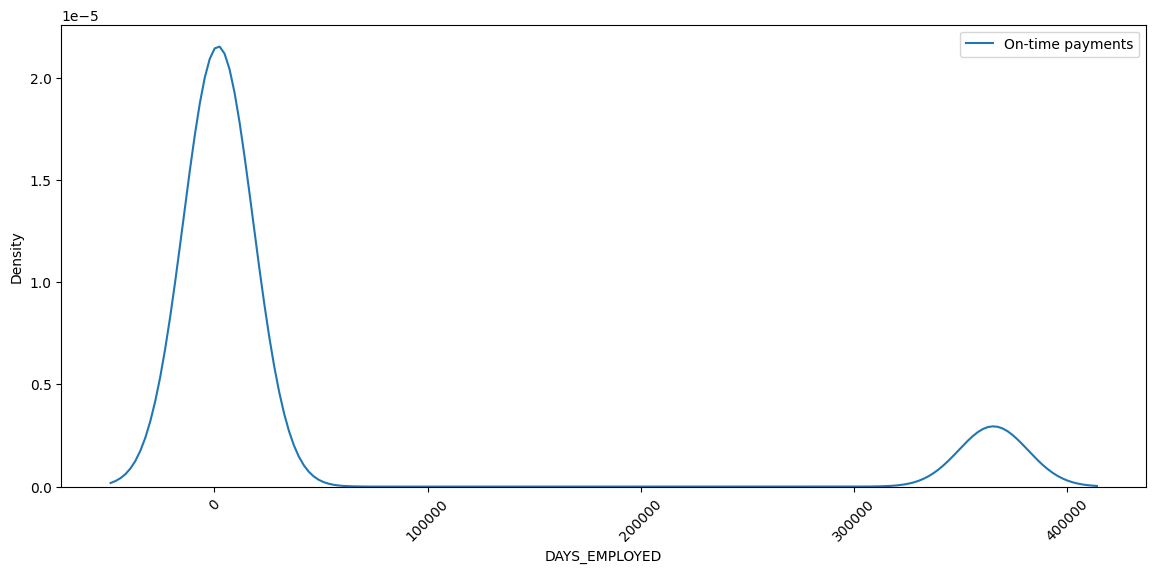

In [249]:
kde_no_outliers_for_one_df(df1, Max_value1, 'DAYS_EMPLOYED', "On-time payments")

**Спостереження**

- Для `DAYS_EMPLOYED` для клiентам з платiжними проблемами присутнi значнi викиди, якi не дозволяють зробити влучних спостережень, данi потребують доопрацювання
- Для `DAYS_EMPLOYED` для клієнтів, які вчасно здійснюють платежі присутнi значнi викиди, якi не дозволяють зробити влучних спостережень, данi потребують доопрацювання

### Аналіз стовпця `CNT_CHILDREN`

In [250]:
Q1 = df1['CNT_CHILDREN'].quantile(0.25)
Q3 = df1['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.0


In [251]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value0))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value0))

Мінімальне значення, до якого існують викиди: -1.5
Максимальне значення, після якого існують викиди: 2.5


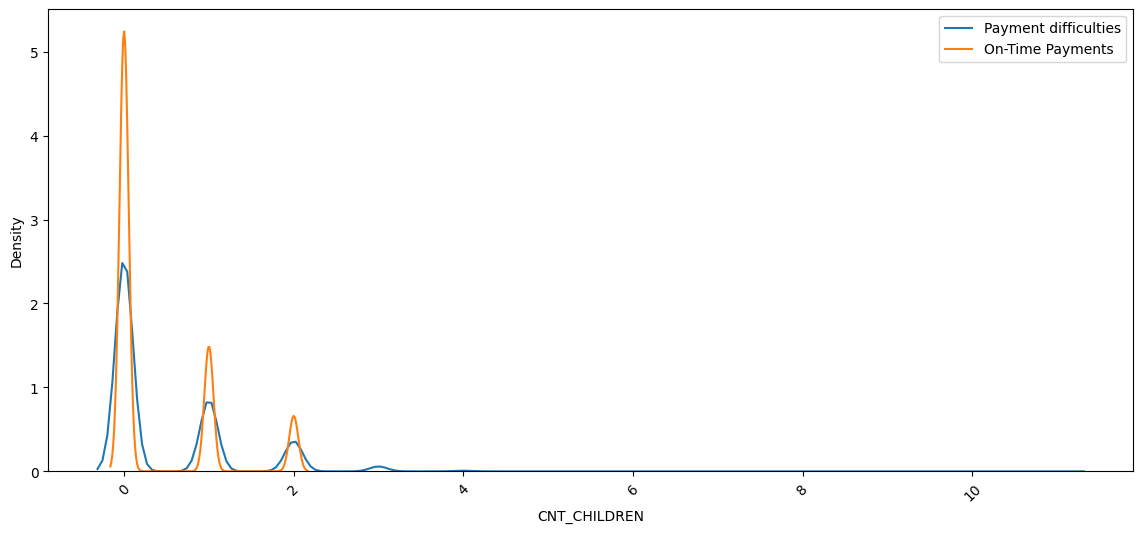

In [252]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'CNT_CHILDREN')

**Спостереження**

- Для `CNT_CHILDREN` зi значеннями приблизно 0, 1, 2 бачимо рiвномiрнi сплески, що може свiдчити про те, що можливо данi корисно було б розбити на категорii згiдно кiлькостi дiтей в родинi

### Аналіз стовпця `AMT_INCOME_TOTAL`

In [253]:
Q1 = df1['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = df1['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

90000.0


In [254]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value0))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value0))

Мінімальне значення, до якого існують викиди: -22500.0
Максимальне значення, після якого існують викиди: 337500.0


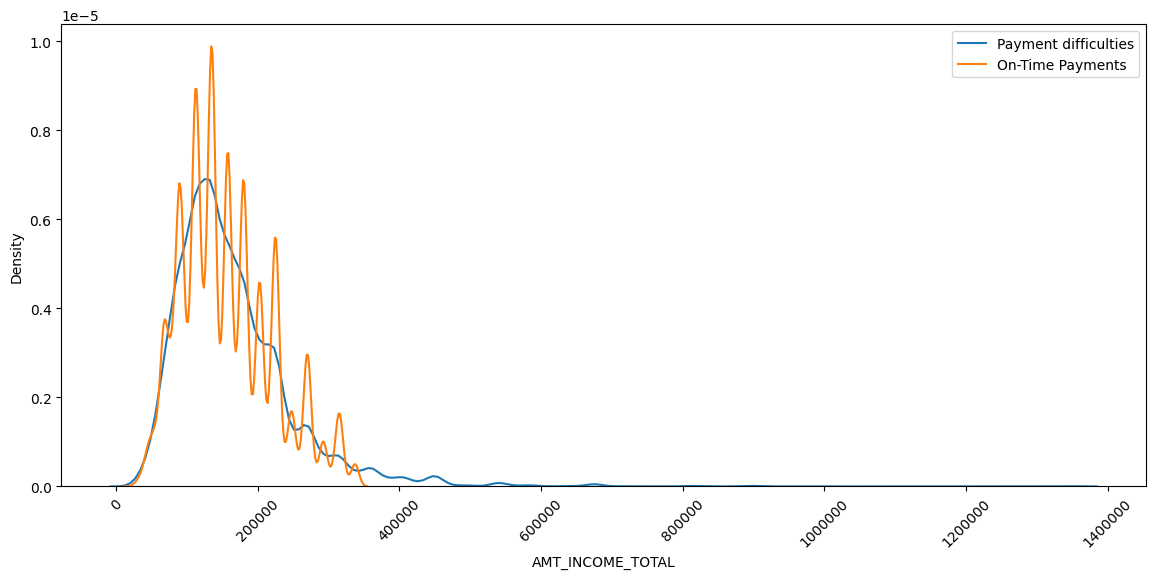

In [255]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'AMT_INCOME_TOTAL')

**Спостереження**

- Для `AMT_INCOME_TOTAL` зi значенням нижче 100000 бачимо сплеск, що може свiдчити про те, що клiенти з таким рiвнем доходу найбiльше вiдчувають проблеми при сплатi кредиту
- в той же час можемо бачити поодинокi випадки несплати кредиту i у клiентiв з високим доходом, що потребуе окремого дослiдження цiеi групи (наприклад перевiрити якi саме цi кредити та коли вони були взятi, а також в яких саме банках-установах)

# Двовимірний/Багатовимірний аналіз

## Неперервні vs неперервні змінні

### Аналіз стовпця `AMT_GOODS_PRICE` vs `AMT_CREDIT`

**Пошук викидів для ствопця `AMT_GOODS_PRICE ` для групи із платіжними труднощами**

In [256]:
max_value1_AMT_GOODS_PRICE = outlier_range(df1,'AMT_GOODS_PRICE')
max_value1_AMT_GOODS_PRICE

1316250.0

**Пошук викидів для ствопця `AMT_CREDIT` для групи із платіжними труднощами**

In [257]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

1454665.5

**Пошук викидів для `AMT_GOODS_PRICE `для групи із вчасними оплатами**

In [258]:
max_value0_AMT_GOODS_PRICE = outlier_range(df0,'AMT_GOODS_PRICE')
max_value0_AMT_GOODS_PRICE

1363500.0

**Пошук викидів для `AMT_CREDIT `для групи із вчасними оплатами**

In [259]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

1643580.0

Побудова діаграми розсіювання для порівняння з видаленими викидами

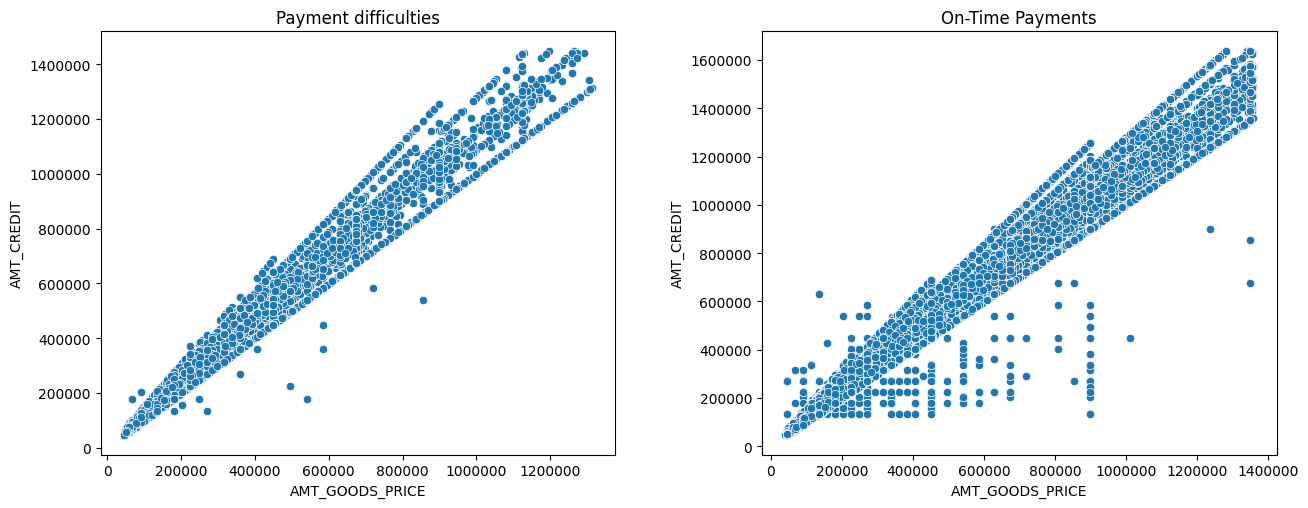

In [260]:
plt.figure(figsize = (14, 6))

plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_GOODS_PRICE'] < max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df1[df1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_GOODS_PRICE'] < max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df0[df0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout(pad = 4)
plt.show()

**Спостереження**
- AMT_GOODS_PRICE та AMT_CREDIT мають сильну позитивну кореляцію. Це означає, що зі збільшенням ціни товару зростає і сума кредиту

# ДЗ 6. Кореляційний аналіз для пари числових змінних

За наведеним вище прикладом, проведіть кореляційний аналіз для пар змінних
- AMT_ANNUITY і AMT_CREDIT

Опціонально:
- DAYS_EMPLOYED і AMT_INCOME_TOTAL
- AMT_CREDIT і DAYS_BIRTH

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної двійки змінних.
Зробіть висновок про наявність кореляції між змінними.

In [261]:
def calculate_outlier_max_value_for_numerical_column(dataset, column):
  Q1 = dataset[column].quantile(0.25)
  Q3 = dataset[column].quantile(0.75)
  IQR = Q3 - Q1
  return Q3 + 1.5 * IQR

def visualise_corr_analysis_for_numerical_pair(title_0, title_1, data_frame_0,
                                               data_frame_1, column_1,
                                               column_2):
  plt.figure(figsize = (14, 6))

  plt.subplot(1,2,1)
  plt.title(title_0)
  sns.scatterplot(x = data_frame_1[data_frame_1[column_1] < calculate_outlier_max_value_for_numerical_column(data_frame_1, column_1)][column_1],
                  y = data_frame_1[data_frame_1[column_2] < calculate_outlier_max_value_for_numerical_column(data_frame_1, column_2)][column_2], data = data_frame_1)
  plt.ticklabel_format(style='plain', axis='x')
  plt.ticklabel_format(style='plain', axis='y')

  plt.subplot(1,2,2)
  plt.title(title_1)
  sns.scatterplot(x = data_frame_0[data_frame_0[column_1] < calculate_outlier_max_value_for_numerical_column(data_frame_0, column_1)][column_1],
                  y = data_frame_0[data_frame_0[column_2] < calculate_outlier_max_value_for_numerical_column(data_frame_0, column_2)][column_2], data = data_frame_0)
  plt.ticklabel_format(style='plain', axis='x')
  plt.ticklabel_format(style='plain', axis='y')

  plt.tight_layout(pad = 4)
  plt.show()

title_0 = 'Payment difficulties'
title_1 = 'On-time payments'

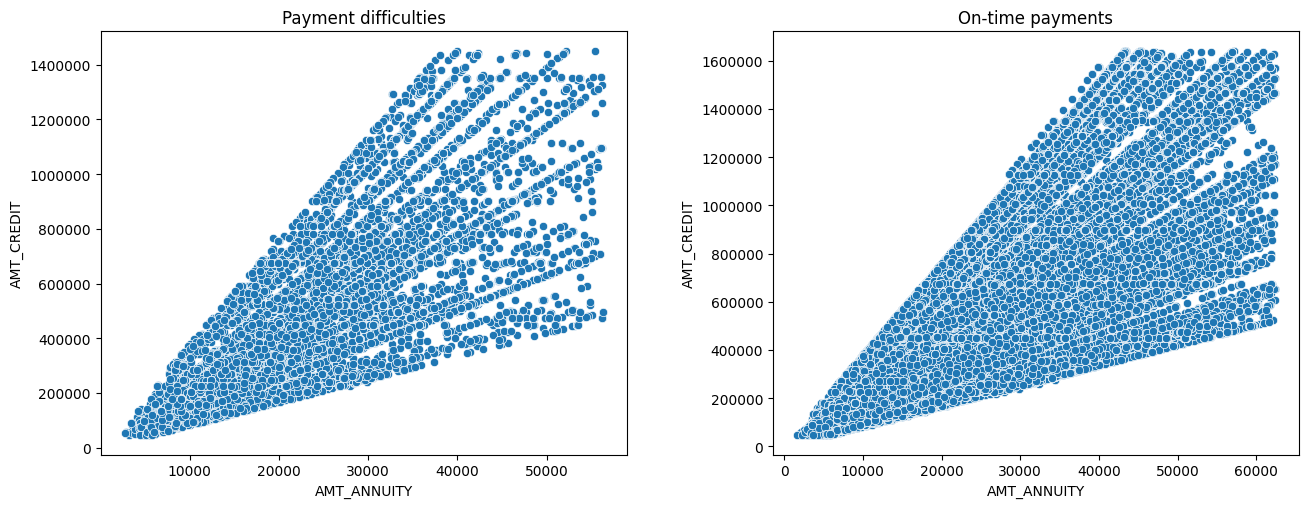

In [262]:
visualise_corr_analysis_for_numerical_pair(title_0, title_1, df0, df1, 'AMT_ANNUITY', 'AMT_CREDIT')

**Спостереження**
- AMT_ANNUITY та AMT_CREDIT мають сильну позитивну кореляцію. Це означає, що зі збільшенням ануiтету зростає і сума кредиту

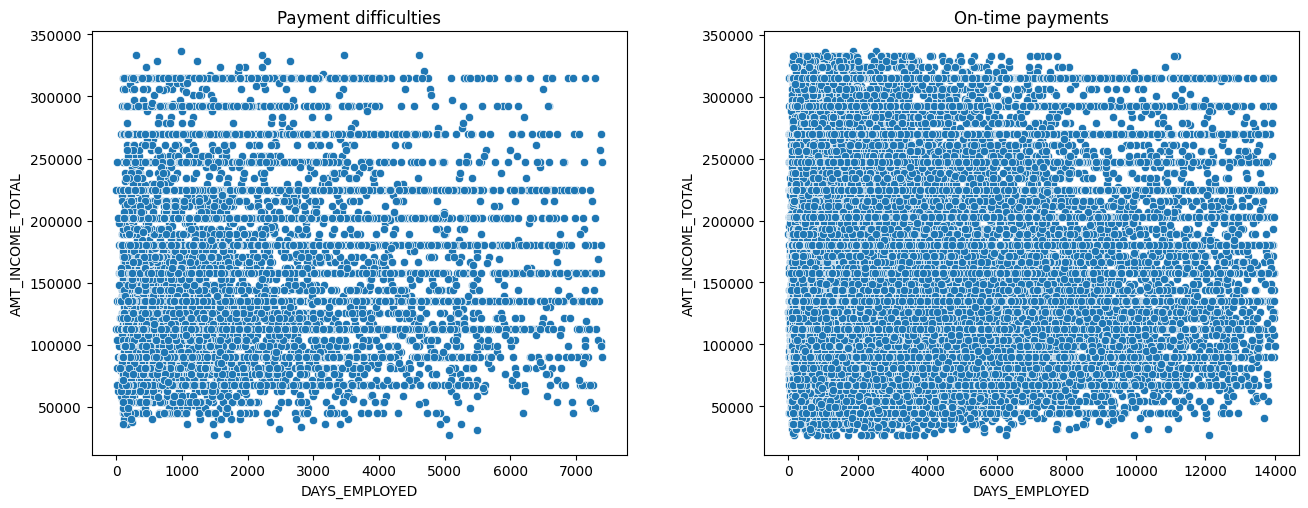

In [263]:
visualise_corr_analysis_for_numerical_pair(title_0, title_1, df0, df1, 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL')

**Спостереження**
- DAYS_EMPLOYED та AMT_INCOME_TOTAL не мають кореляціi мiж собою. Це означає, що змiни DAYS_EMPLOYED не впливають на AMT_INCOME_TOTAL, i навпаки (симетрiя)

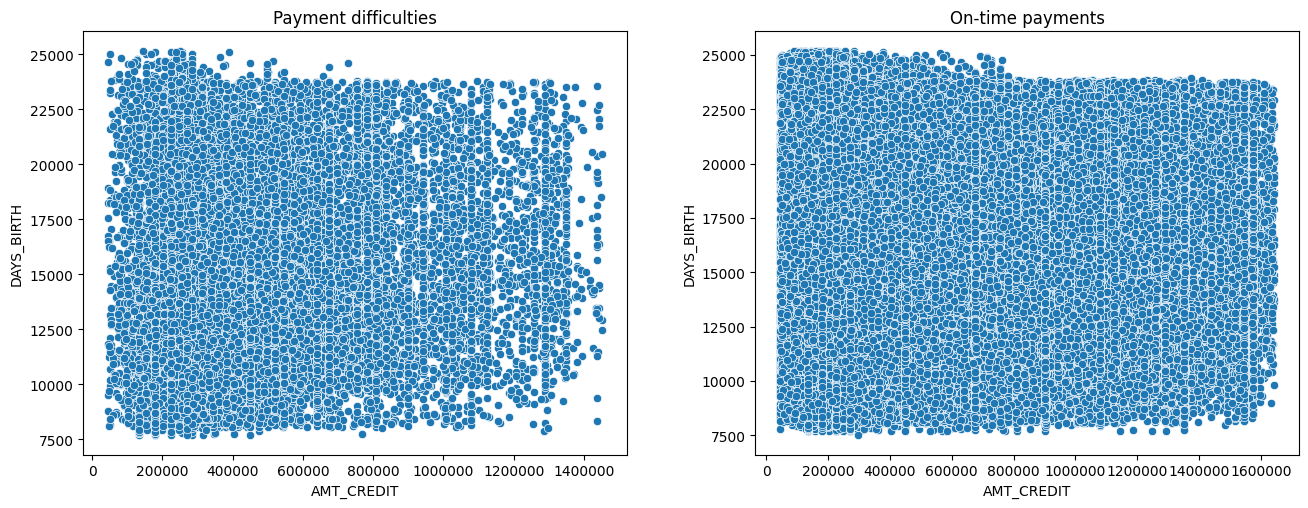

In [264]:
visualise_corr_analysis_for_numerical_pair(title_0, title_1, df0, df1, 'AMT_CREDIT', 'DAYS_BIRTH')

**Спостереження**
- DAYS_BIRTH та AMT_CREDIT не мають кореляціi мiж собою. Це означає, що змiни DAYS_BIRTH не впливають на AMT_CREDIT, i навпаки (симетрiя)

## Неперервні та категоріальні змінні

In [289]:
def draw_boxplot(df, categorical, continuous, max_continuous, title, hue_column, subplot_position):
    """
    Малює блок-діаграму для заданого DataFrame, категоріальної та неперервної змінної.
    """
    plt.subplot(1, 2, subplot_position)
    plt.title(title)
    red_diamond = dict(markerfacecolor='r', marker='D')
    sns.boxplot(x=categorical,
                y=df[df[continuous] < max_continuous][continuous],
                data=df,
                flierprops=red_diamond,
                order=sorted(df[categorical].unique(), reverse=True),
                hue=hue_column, hue_order=sorted(df[hue_column].unique(), reverse=True))
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=90)

def bi_boxplot(categorical, continuous, max_continuous1, max_continuous0, hue_column):
    """
    Створює паралельні блок-діаграми для двох груп, визначених у наборі даних, на основі
    категоріальної та неперервної змінної, виділяючи відмінності за допомогою відтінків.
    """
    plt.figure(figsize=(16, 10))

    # Графік для першо групи "Труднощі з платежами" (Payment Difficulties)
    draw_boxplot(df1, categorical, continuous, max_continuous1, 'Payment Difficulties', hue_column, 1)

    # Графік для другої групи "Вчасні оплати" (On-Time Payments)
    draw_boxplot(df0, categorical, continuous, max_continuous0, 'On-Time Payments', hue_column, 2)

    plt.tight_layout(pad=4)
    plt.show()

### Аналіз стовпців `AMT_CREDIT` vs `NAME_EDUCATION_TYPE` vs `CODE_GENDER`

**Пошук викидів для `AMT_CREDIT `для групи із платіжними труднощами**

In [266]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

1454665.5

**Пошук викидів для `AMT_CREDIT ` для групи із вчасними платежами**

In [267]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

1643580.0

**Клієнт з платіжними труднощами**

In [268]:
df1.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min  \
NAME_EDUCATION_TYPE CODE_GENDER                                         
Academic degree     F              3.00 950245.50 504711.38 544491.00   
Higher education    F           2105.00 655027.00 413224.05  47970.00   
                    M           1383.00 646824.05 409990.22  45000.00   
Incomplete higher   F            407.00 553723.87 369332.08  91692.00   
                    M            293.00 568142.72 351898.67  74628.00   

                                      25%       50%        75%        max  
NAME_EDUCATION_TYPE CODE_GENDER                                            
Academic degree     F           667660.50 790830.00 1153122.75 1515415.50  
Higher education    F           332946.00 545040.00  888840.00 2687355.00  
                    M           340569.00 545040.00  835380.00 2695500.00  
Incomplete higher   F           278610.75 450000.00  721998.00 2695500.00  
                    M           291915.00 509400.00  746280.00 2013840.00

**Клієнт зі вчасними платежами**

In [269]:
df0.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min  \
NAME_EDUCATION_TYPE CODE_GENDER                                          
Academic degree     F              88.00 694416.84 421704.75 130824.00   
                    M              53.00 745764.71 495852.94 180000.00   
Higher education    F           42515.00 686009.91 456648.33  45000.00   
                    M           20487.00 717884.79 488294.95  45000.00   
Incomplete higher   F            4821.00 570502.46 391674.80  45000.00   

                                      25%       50%        75%        max  
NAME_EDUCATION_TYPE CODE_GENDER                                            
Academic degree     F           358617.38 618750.00 1006920.00 2250000.00  
                    M           312768.00 630000.00 1042560.00 1984500.00  
Higher education    F           312725.25 573408.00  922500.00 4050000.00  
                    M           315000.00 592560.00  983299.50 4050000.00  
Incomplete higher   F           260640.00 474048.00  787131.00 2517300.00

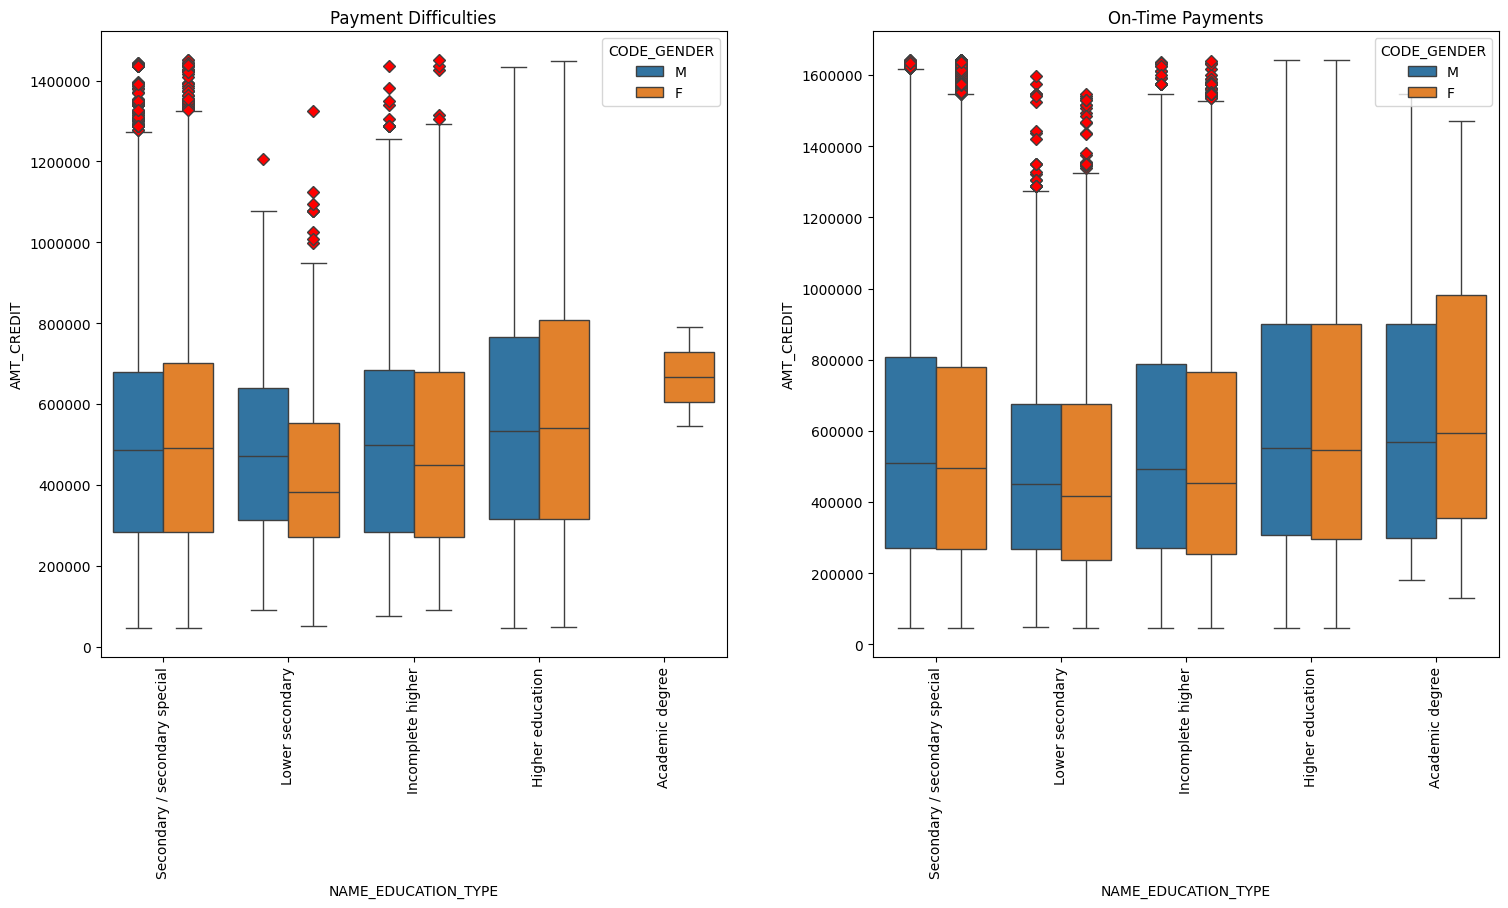

In [270]:
bi_boxplot('NAME_EDUCATION_TYPE','AMT_CREDIT',max_value1_AMT_CREDIT, max_value0_AMT_CREDIT, 'CODE_GENDER')

**Спостереження**
- Клієнти з "академічним ступенем" мають широкий діапазон кредитів для своєчасних платежів, тоді як для клієнтів з проблемами з оплатою цей діапазон значно нижчий
- Якщо поглянути на зведену статистику, то клієнти з "вищою освітою" та проблемами з оплатою беруть середній та медіанний кредит у значно більшому діапазоні, ніж клієнти з вчасною оплатою.
- Клієнти-чоловіки з "вищою освітою" завжди сплачують кредит вчасно

 # ДЗ 7. Кореляційний аналіз між двома категоріальними змінними і числовою

Проведіть аналогічний кореляційний аналіз для трійок змінних

- AMT_INCOME_TOTAL vs NAME_FAMILY_STATUS vs CODE_GENDER

Опціонально - трійки які можна додатково проаналізувати:
- AMT_INCOME_TOTAL vs YEARS_BIRTH_CATEGORY vs NAME_HOUSING_TYPE
- AMT_GOODS_PRICE vs NAME_INCOME_TYPE vs CODE_GENDER
- AMT_INCOME_TOTAL vs OCCUPATION_TYPE vs CODE_GENDER

А ще можете також проаналізувати додатково до обовʼязкової свою трійку :)

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної трійки змінних.

Зробіть висновок про наявність кореляції між змінними.

In [273]:
def visualize_corr_analysis_for_triple_cat_cat_num(column_1, column_2, column_3, dataset_0, dataset_1):
  max_value0_NUM_VAR = calculate_outlier_max_value_for_numerical_column(dataset_0, column_1)
  max_value1_NUM_VAR = calculate_outlier_max_value_for_numerical_column(dataset_1, column_1)
  bi_boxplot(column_2,column_1,max_value1_NUM_VAR, max_value0_NUM_VAR, column_3)


### Аналіз стовпців `AMT_INCOME_TOTAL` vs `NAME_FAMILY_STATUS` vs `CODE_GENDER`

In [277]:
df0.groupby(by = ['NAME_FAMILY_STATUS','CODE_GENDER']).AMT_INCOME_TOTAL.describe().head(10)

count      mean       std      min  \
NAME_FAMILY_STATUS   CODE_GENDER                                          
Civil marriage       F            16346.00 165307.74 110647.56 27000.00   
                     M             6270.00 189936.08 109035.90 27000.00   
Married              F           100185.00 155701.55  88488.17 26100.00   
                     M            59346.00 201654.76 120821.50 27000.00   
Separated            F            12785.00 169108.21  96334.75 27000.00   
                     M             3209.00 195746.38 103980.83 32850.00   
Single / not married F            22564.00 164139.58  90820.20 27000.00   
                     M            11613.00 188882.25 116413.60 27000.00   
Widow                F            12508.00 144994.04  76896.55 27000.00   
                     M              633.00 167469.63  96538.28 28350.00   

                                       25%       50%       75%        max  
NAME_FAMILY_STATUS   CODE_GENDER                                           
Civil marriage       F           112500.00 144000.00 202500.00 9000000.00  
                     M           135000.00 171000.00 225000.00 3825000.00  
Married              F            99000.00 135000.00 180000.00 3600000.00  
                     M           135000.00 180000.00 225000.00 6750000.00  
Separated            F           112500.00 148500.00 202500.00 2250000.00  
                     M           135000.00 180000.00 225000.00 1235038.50  
Single / not married F           112500.00 135000.00 202500.00 2250000.00  
                     M           126000.00 157500.00 225000.00 4500000.00  
Widow                F            90000.00 135000.00 180000.00 1800000.00  
                     M           112500.00 148500.00 202500.00 1035000.00

In [276]:
df1.groupby(by = ['NAME_FAMILY_STATUS','CODE_GENDER']).AMT_INCOME_TOTAL.describe().head(10)


count      mean        std      min  \
NAME_FAMILY_STATUS   CODE_GENDER                                         
Civil marriage       F           1445.00 158846.59  107058.20 27000.00   
                     M            913.00 178447.99   94043.51 36000.00   
Married              F           7093.00 164138.38 1389796.75 27000.00   
                     M           5509.00 186352.24   94628.98 33214.50   
Separated            F            871.00 164787.97   83430.17 36000.00   
                     M            484.00 182256.02   87185.81 45000.00   
Single / not married F           1788.00 154557.69   78094.73 31500.00   
                     M           1662.00 173190.65   84078.95 40500.00   
Widow                F            683.00 145589.29   66017.52 30150.00   
                     M             85.00 152542.22   68992.49 45000.00   

                                       25%       50%       75%          max  
NAME_FAMILY_STATUS   CODE_GENDER                                             
Civil marriage       F           112500.00 135000.00 184500.00   3150000.00  
                     M           126000.00 157500.00 202500.00   1350000.00  
Married              F            90000.00 135000.00 180000.00 117000000.00  
                     M           135000.00 171000.00 225000.00   1890000.00  
Separated            F           112500.00 144000.00 202500.00    832500.00  
                     M           132873.75 157500.00 225000.00    675000.00  
Single / not married F           112500.00 135000.00 180000.00    810000.00  
                     M           112500.00 157500.00 202500.00    990000.00  
Widow                F            99000.00 135000.00 180000.00    540000.00  
                     M           112500.00 135000.00 180000.00    360000.00

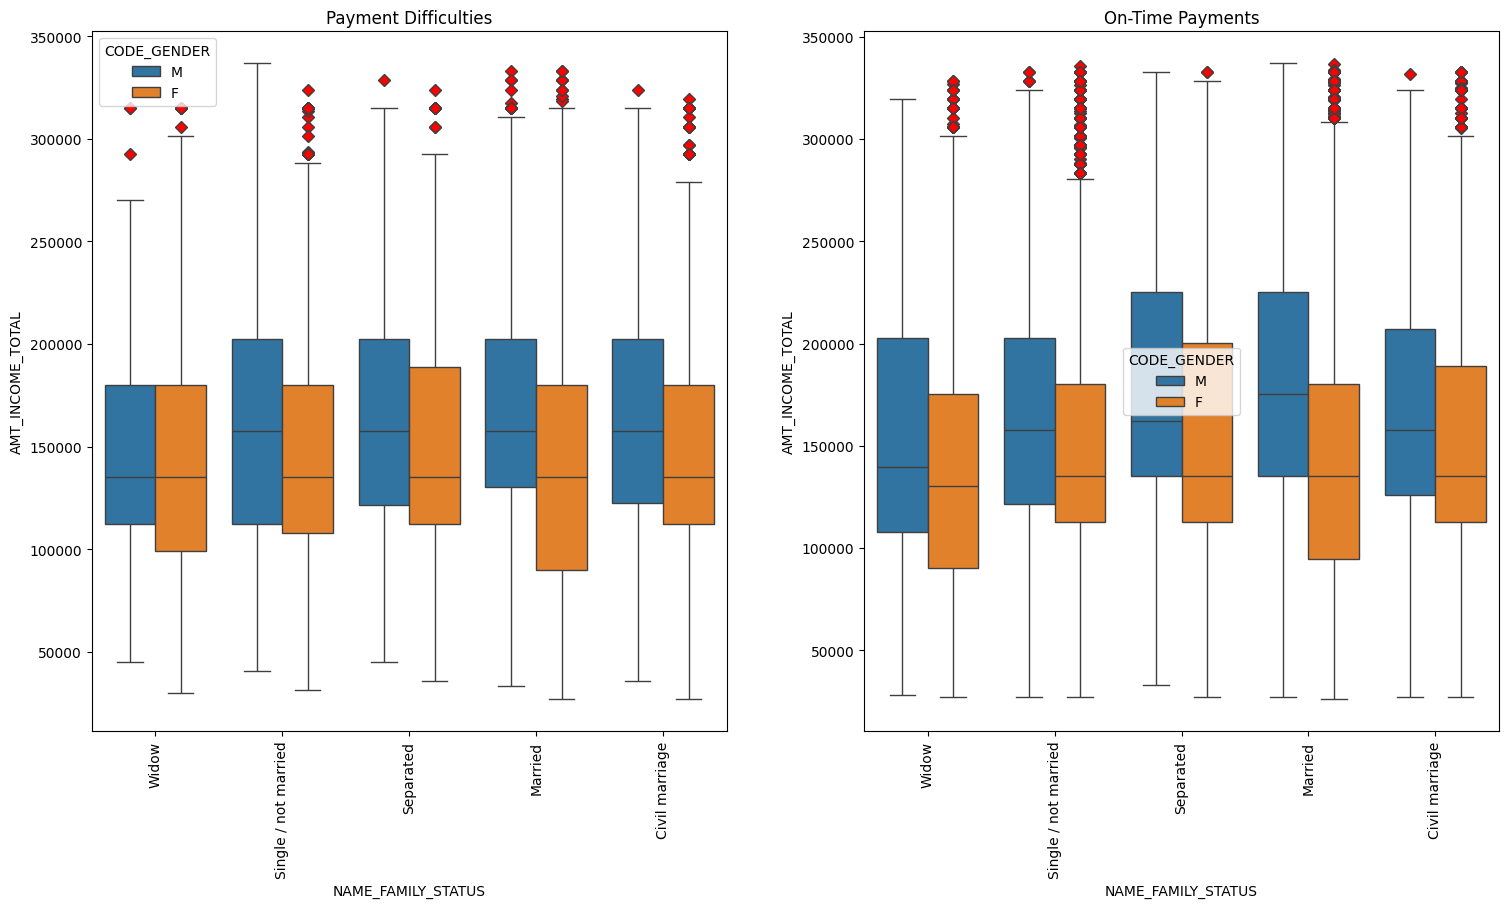

In [272]:
visualize_corr_analysis_for_triple_cat_cat_num('AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS', 'CODE_GENDER', df0, df1)

**Спостереження**
- Клієнти з ciмейним статусом Widow та якi мають труднощi з виплатою кредиту незалежно вiд гендеру мають однакову максимальну суму кредиту, i ця сума < 200000, тодi як клiенти без проблем з оплатою беруть масимально 200000 кредиту
- Клiенти-чоловiки з сiмейним статусом Married беруть найвищу медiанну суму кредиту серед всього датафрейму клiентiв з проблемами оплати (171000)

### Аналіз стовпців `AMT_INCOME_TOTAL` vs `YEARS_BIRTH_CATEGORY` vs `NAME_HOUSING_TYPE`

In [281]:
df0.groupby(by = ['YEARS_BIRTH_CATEGORY','NAME_HOUSING_TYPE']).AMT_INCOME_TOTAL.describe().head(30)

count      mean       std  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                  
20-30                Co-op apartment       249.00 165992.53  76005.52   
                     House / apartment   26999.00 167798.62  95595.87   
                     Municipal apartment   890.00 167702.36  79054.80   
                     Office apartment      373.00 185468.68 122511.04   
                     Rented apartment     1158.00 160827.18  73512.20   
                     With parents         5293.00 155877.32  93836.70   
30-40                Co-op apartment       279.00 167866.27  81471.44   
                     House / apartment   57674.00 181458.98 104488.36   
                     Municipal apartment  2209.00 184688.12  97540.70   
                     Office apartment      729.00 207664.44 113788.76   
                     Rented apartment     1300.00 176339.59  91373.09   
                     With parents         3981.00 171355.42  93274.05   
40-50                Co-op apartment       215.00 183170.93  99719.27   
                     House / apartment   56536.00 182666.40 111850.67   
                     Municipal apartment  2490.00 180572.57 117190.22   
                     Office apartment      512.00 212299.14 124963.87   
                     Rented apartment      657.00 189057.38 105559.55   
                     With parents         1164.00 177212.66  96576.05   
50-60                Co-op apartment       125.00 170287.20  80225.84   
                     House / apartment   52609.00 165988.92 104625.42   
                     Municipal apartment  2299.00 162570.15  88184.64   
                     Office apartment      370.00 173459.14 139564.10   
                     Rented apartment      289.00 183779.07 122062.24   
                     With parents          327.00 166750.29  80136.31   
60-70                Co-op apartment        54.00 134458.33  81267.17   
                     House / apartment   25425.00 139279.60  76155.22   
                     Municipal apartment   932.00 141342.17  74827.30   
                     Office apartment      159.00 148604.52  85968.41   
                     Rented apartment       95.00 142026.73  77533.25   
                     With parents           67.00 144799.25  77559.30   

                                              min       25%       50%  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                  
20-30                Co-op apartment     45000.00 112500.00 157500.00   
                     House / apartment   27000.00 112500.00 157500.00   
                     Municipal apartment 45000.00 112500.00 155250.00   
                     Office apartment    36000.00 112500.00 157500.00   
                     Rented apartment    40500.00 112500.00 153000.00   
                     With parents        31500.00 112500.00 135000.00   
30-40                Co-op apartment     49500.00 112500.00 148500.00   
                     House / apartment   27000.00 112500.00 157500.00   
                     Municipal apartment 29250.00 117000.00 162000.00   
                     Office apartment    45000.00 135000.00 180000.00   
                     Rented apartment    36000.00 112500.00 157500.00   
                     With parents        27000.00 112500.00 157500.00   
40-50                Co-op apartment     45000.00 112500.00 166500.00   
                     House / apartment   26550.00 112500.00 157500.00   
                     Municipal apartment 36000.00 112500.00 157500.00   
                     Office apartment    45000.00 135000.00 180000.00   
                     Rented apartment    45000.00 112500.00 162000.00   
                     With parents        40500.00 112500.00 157500.00   
50-60                Co-op apartment     45000.00 112500.00 157500.00   
                     House / apartment   26100.00 112500.00 139500.00   
                     Municipal apartment 31500.00 108000.00 144000.00   
                     Office 

In [282]:
df1.groupby(by = ['YEARS_BIRTH_CATEGORY','NAME_HOUSING_TYPE']).AMT_INCOME_TOTAL.describe().head(30)

count      mean        std  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                  
20-30                Co-op apartment       27.00 147190.67   64349.93   
                     House / apartment   3272.00 155706.92   72175.29   
                     Municipal apartment  122.00 157009.43   68830.98   
                     Office apartment      33.00 147954.55   52330.73   
                     Rented apartment     173.00 149496.32   61147.59   
                     With parents         717.00 146675.64   68483.68   
30-40                Co-op apartment       24.00 196329.38  102074.59   
                     House / apartment   5592.00 190844.33 1565220.58   
                     Municipal apartment  231.00 167345.45   90113.95   
                     Office apartment      54.00 180846.08  101251.21   
                     Rented apartment     186.00 162862.62   64735.47   
                     With parents         485.00 155692.58   70858.87   
40-50                Co-op apartment        9.00 227500.00   86005.09   
                     House / apartment   4418.00 174162.36   97017.99   
                     Municipal apartment  208.00 167726.68   78161.73   
                     Office apartment      30.00 181350.00   87555.02   
                     Rented apartment      79.00 182420.89  119090.84   
                     With parents         139.00 199534.53  134469.01   
50-60                Co-op apartment        7.00 174214.29  100914.92   
                     House / apartment   3167.00 164547.70   88337.74   
                     Municipal apartment  168.00 159297.32   79415.59   
                     Office apartment      16.00 158062.50   51567.07   
                     Rented apartment      28.00 171546.43   73075.03   
                     With parents          33.00 171886.36   95472.57   
60-70                Co-op apartment        3.00 180000.00   98075.23   
                     House / apartment   1238.00 137448.63   75626.18   
                     Municipal apartment   55.00 139974.55   62609.65   
                     Office apartment      11.00 128290.91   66027.58   
                     Rented apartment       5.00 108000.00   40531.24   
                     With parents           3.00 186000.00  132756.36   

                                               min       25%       50%  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                   
20-30                Co-op apartment      67500.00 105750.00 135000.00   
                     House / apartment    36000.00 112500.00 135000.00   
                     Municipal apartment  45000.00 112500.00 135000.00   
                     Office apartment     67500.00 135000.00 135000.00   
                     Rented apartment     45000.00 112500.00 135000.00   
                     With parents         27900.00 112500.00 135000.00   
30-40                Co-op apartment      81000.00 135000.00 157500.00   
                     House / apartment    27000.00 112500.00 157500.00   
                     Municipal apartment  38250.00 112500.00 157500.00   
                     Office apartment     52438.50 131625.00 157500.00   
                     Rented apartment     45000.00 112500.00 157500.00   
                     With parents         40500.00 112500.00 135000.00   
40-50                Co-op apartment     135000.00 180000.00 202500.00   
                     House / apartment    27000.00 112500.00 157500.00   
                     Municipal apartment  54000.00 112500.00 144000.00   
                     Office apartment     54000.00 135000.00 180000.00   
                     Rented apartment     56250.00 112500.00 157500.00   
                     With parents         45450.00 128250.00 157500.00   
50-60                Co-op apartment      54000.00 114750.00 135000.00   
                     House / apartment    27000.00 112500.00 144000.00   
                     Municipal apartment  36000.00  94500.00 144000.00   
    

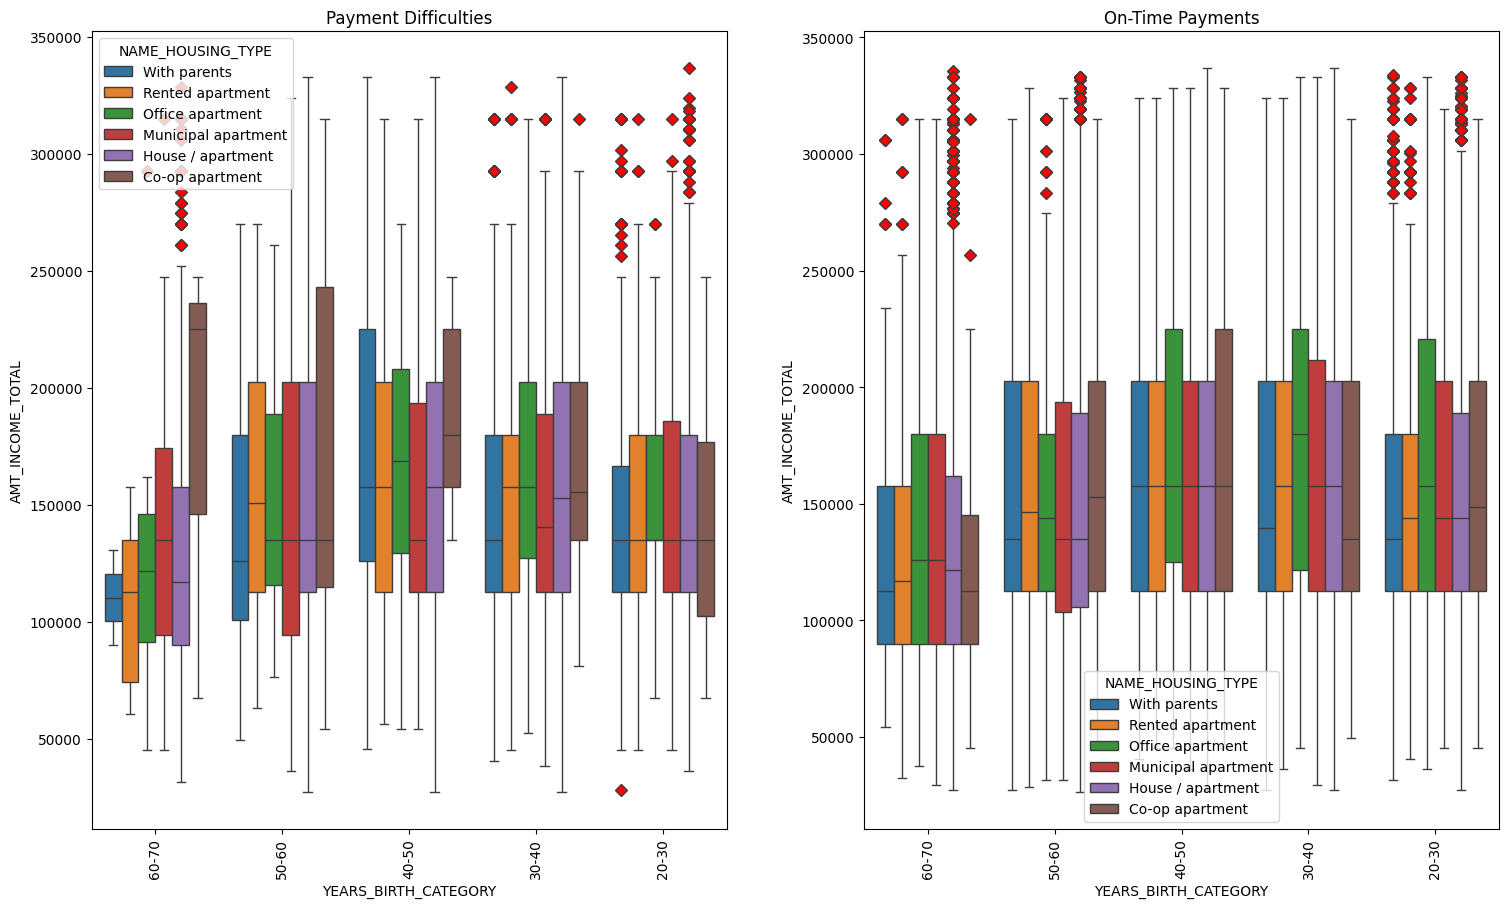

In [283]:
visualize_corr_analysis_for_triple_cat_cat_num('AMT_INCOME_TOTAL', 'YEARS_BIRTH_CATEGORY', 'NAME_HOUSING_TYPE', df0, df1)

**Спостереження**
- Клієнти з житлом Co-op та якi мають труднощi з виплатою кредиту, беруть максимальну суму кредиту серед усiх клiентiв загалом
- Клiенти з житлом With parents та проблемами в оплатi мають менший дiапазон кредитноi суми, нiж клiенти з таким же типом житла та без проблем в оплатi

### Аналіз стовпців `AMT_GOODS_PRICE` vs `NAME_INCOME_TYPE` vs `CODE_GENDER`

In [284]:
df0.groupby(by = ['NAME_INCOME_TYPE','CODE_GENDER']).AMT_GOODS_PRICE.describe().head(30)

count       mean        std       min  \
NAME_INCOME_TYPE     CODE_GENDER                                            
Businessman          F               2.00 1237500.00 1431891.23 225000.00   
                     M               2.00  607500.00   95459.42 540000.00   
Commercial associate F           36085.00  609467.52  401234.12  45000.00   
                     M           21230.00  629342.11  426057.00  45000.00   
Maternity leave      F               1.00  315000.00        NaN 315000.00   
Pensioner            F           37413.00  482090.92  341072.54  45000.00   
                     M            7829.00  523654.68  372704.34  45000.00   
State servant        F           13472.00  600684.06  399273.00  45000.00   
                     M            4923.00  637890.01  442246.11  45000.00   
Student              F               6.00  354750.00  176831.49 180000.00   
                     M               9.00  505000.00  305294.22  90000.00   
Unemployed           F               3.00  435000.00  158034.81 270000.00   
                     M               2.00  877500.00   31819.81 855000.00   
Working              F           77260.00  526165.94  352352.21  45000.00   
                     M           47005.00  537880.52  364679.32  40500.00   

                                       25%        50%        75%        max  
NAME_INCOME_TYPE     CODE_GENDER                                             
Businessman          F           731250.00 1237500.00 1743750.00 2250000.00  
                     M           573750.00  607500.00  641250.00  675000.00  
Commercial associate F           270000.00  481500.00  855000.00 4050000.00  
                     M           274500.00  486000.00  900000.00 4050000.00  
Maternity leave      F           315000.00  315000.00  315000.00  315000.00  
Pensioner            F           225000.00  450000.00  675000.00 3150000.00  
                     M           225000.00  450000.00  675000.00 2250000.00  
State servant        F           270000.00  477000.00  832500.00 2700000.00  
                     M           270000.00  495000.00  900000.00 3600000.00  
Student              F           194625.00  344250.00  483750.00  585000.00  
                     M           373500.00  454500.00  540000.00 1206000.00  
Unemployed           F           360000.00  450000.00  517500.00  585000.00  
                     M           866250.00  877500.00  888750.00  900000.00  
Working              F           238500.00  450000.00  679500.00 2700000.00  
                     M           238500.00  450000.00  688500.00 3712500.00

In [285]:
df1.groupby(by = ['NAME_INCOME_TYPE','CODE_GENDER']).AMT_GOODS_PRICE.describe().head(30)

count      mean       std      min  \
NAME_INCOME_TYPE     CODE_GENDER                                        
Commercial associate F           2473.00 549193.42 351629.61 45000.00   
                     M           1981.00 536095.74 341715.35 45000.00   
Pensioner            F           1873.00 486926.38 304990.83 45000.00   
                     M            584.00 496450.06 328301.86 45000.00   
State servant        F            734.00 546606.80 330356.72 45000.00   
                     M            348.00 535577.59 329326.70 45000.00   
Working              F           6788.00 476520.81 298154.78 45000.00   
                     M           5737.00 476566.60 288980.95 45000.00   

                                       25%       50%       75%        max  
NAME_INCOME_TYPE     CODE_GENDER                                           
Commercial associate F           270000.00 450000.00 675000.00 2700000.00  
                     M           270000.00 450000.00 675000.00 2250000.00  
Pensioner            F           229500.00 450000.00 675000.00 1800000.00  
                     M           234000.00 450000.00 675000.00 1800000.00  
State servant        F           270000.00 454500.00 675000.00 1800000.00  
                     M           270000.00 450000.00 675000.00 1800000.00  
Working              F           238500.00 450000.00 675000.00 2254500.00  
                     M           238500.00 450000.00 675000.00 2250000.00

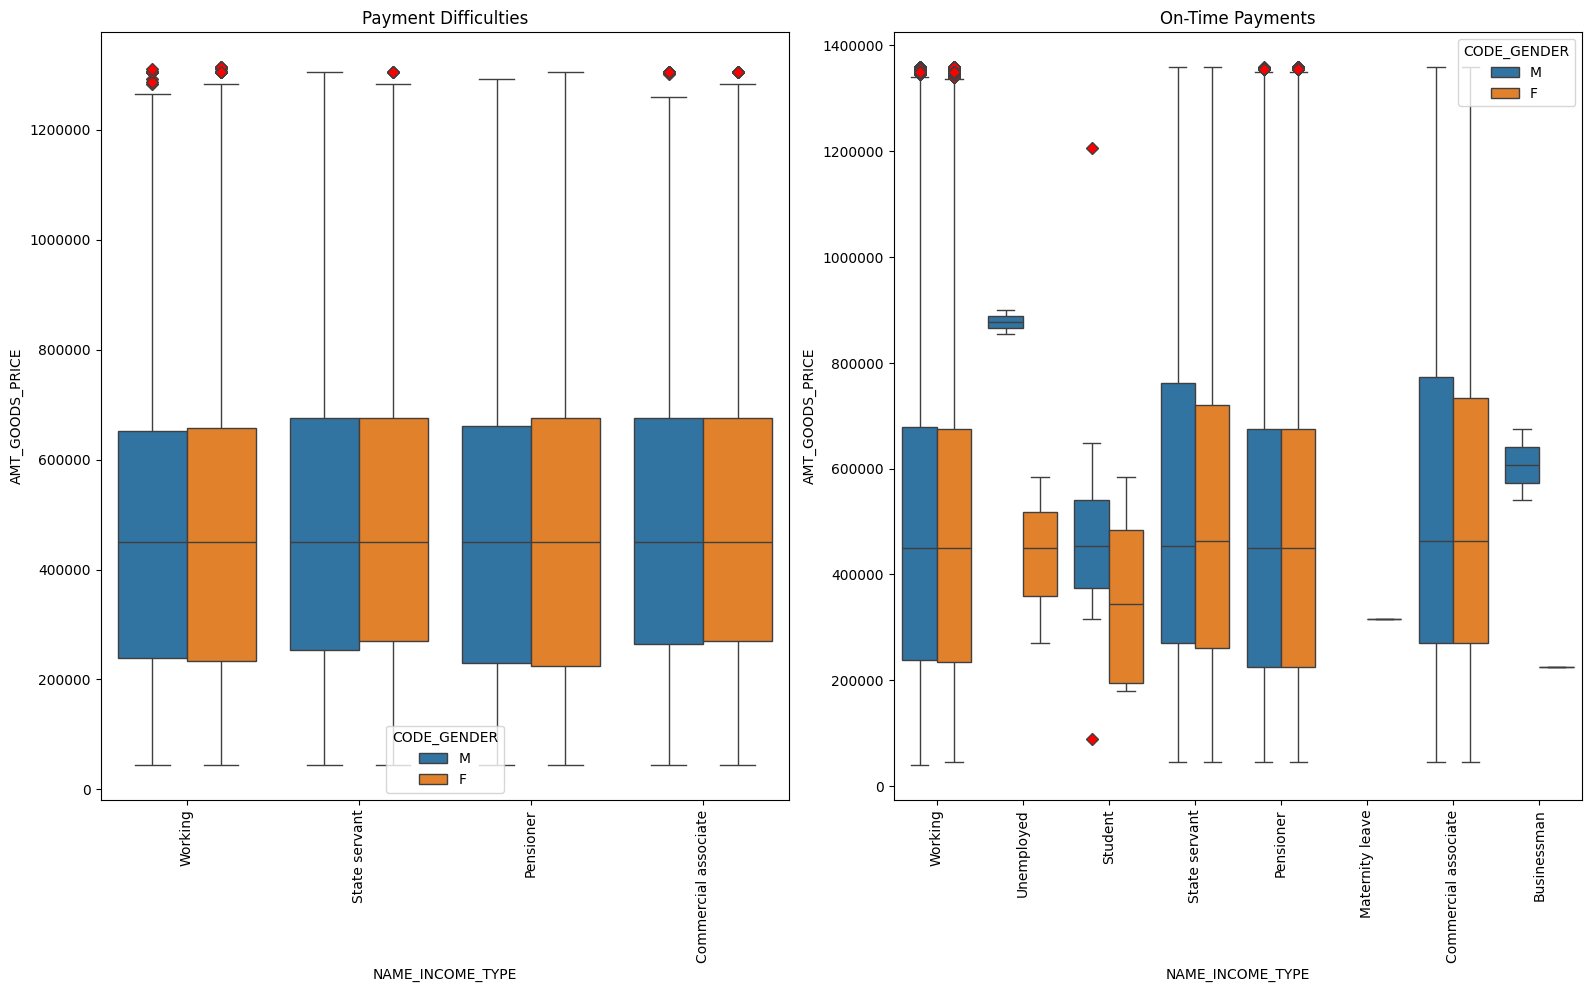

In [288]:
visualize_corr_analysis_for_triple_cat_cat_num('AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'CODE_GENDER', df0, df1)

**Спостереження**
- Проблеми з оплатою кредиту мають тiльки клієнти з типом дохода Working, State servant, Pensioner, Commercial associate, всi iншi типи доходу не вiдмiченi, що як на мене е цiкавим фактом та потребуе подальшого розбирання

### Аналіз стовпців `AMT_INCOME_TOTAL` vs `OCCUPATION_TYPE` vs `CODE_GENDER`

In [291]:
df0.groupby(by = ['OCCUPATION_TYPE','CODE_GENDER']).AMT_INCOME_TOTAL.describe().head(50)

count      mean       std      min  \
OCCUPATION_TYPE       CODE_GENDER                                         
Accountants           F            8111.00 195947.59 109986.79 27000.00   
                      M             243.00 237626.85 128573.69 54000.00   
Cleaning staff        F            3362.00 132642.97  64568.10 27000.00   
                      M             235.00 142245.96  65089.63 36000.00   
Cooking staff         F            4162.00 135981.21  60371.59 27000.00   
                      M             416.00 185433.39  75230.12 54000.00   
Core staff            F           18206.00 164300.65  86087.75 27000.00   
                      M            4738.00 218357.38 122490.21 31500.00   
Drivers               F             738.00 171697.95  83754.97 38250.00   
                      M           13518.00 191367.91  84093.90 27000.00   
HR staff              F             439.00 187641.71  91476.69 54000.00   
                      M              34.00 241411.76 126136.06 30600.00   
High skill tech staff F            6054.00 166188.19  80856.86 27000.00   
                      M            3370.00 220874.56 108811.59 37800.00   
IT staff              F             133.00 186329.77 190263.97 54000.00   
                      M             303.00 232614.01 118257.63 54000.00   
Laborers              F           18456.00 148045.33  68045.25 27000.00   
                      M           24128.00 181468.72  94873.04 31500.00   
Low-skill Laborers    F             231.00 125670.78  53724.74 36000.00   
                      M            1118.00 138886.64  55744.71 36000.00   
Managers              F            9905.00 231402.31 161521.55 29250.00   
                      M            8124.00 298627.33 203396.52 38250.00   
Medicine staff        F            7008.00 151199.27  74300.27 26550.00   
                      M             196.00 177506.63  88221.97 63000.00   
Private service staff F            1992.00 183667.05  88456.24 36000.00   
                      M              93.00 214693.55 107211.62 40500.00   
Realty agents         F             537.00 198486.03  85045.37 67500.00   
                      M              43.00 209250.00  76526.78 67500.00   
Sales staff           F           21513.00 149451.63  75093.58 27000.00   
                      M            2875.00 198006.98  97016.79 31500.00   
Secretaries           F            1020.00 156405.86  98425.14 45000.00   
                      M              47.00 265739.36 252397.21 81000.00   
Security staff        F            1616.00 136481.77  65597.48 27000.00   
                      M            3518.00 159927.03  71214.93 31500.00   
Unknown               F           60038.00 147336.37  84102.81 26100.00   
                      M           17951.00 182767.42 107204.74 27000.00   
Waiters/barmen staff  F             867.00 140052.36  62610.58 33750.00   
                      M             121.00 200956.61  91643.45 90000.00   

                                        25%       50%       75%        max  
OCCUPATION_TYPE       CODE_GENDER                                           
Accountants           F           135000.00 180000.00 225000.00 2214117.00  
                      M           144000.00 225000.00 272250.00 1035000.00  
Cleaning staff        F            90000.00 117000.00 157500.00 1080000.00  
                      M           101250.00 135000.00 180000.00  450000.00  
Cooking staff         F            90000.00 126000.00 157500.00  540000.00  
                      M           135000.00 180000.00 225000.00  540000.00  
Core staff            F           112500.00 144000.00 202500.00 2250000.00  
                      M           135000.00 193500.00 270000.00 3600000.00  
Drivers               F           112500.00 157500.00 202500.00  675000.00  
                      M           135000.00 180000.00 225000.00 2475000.00  
HR staff              F           135000.00 162000.00 225000.00  699750.00  
                      M           1

In [292]:
df1.groupby(by = ['OCCUPATION_TYPE','CODE_GENDER']).AMT_INCOME_TOTAL.describe().head(50)

count      mean        std       min  \
OCCUPATION_TYPE       CODE_GENDER                                          
Accountants           F            395.00 177158.03   79774.00  54000.00   
                      M             17.00 202367.65   98623.66  81000.00   
Cleaning staff        F            340.00 132008.16   73914.40  33750.00   
                      M             25.00 127710.00   48411.09  54000.00   
Cooking staff         F            465.00 132380.32   56113.49  32400.00   
                      M             55.00 177463.64   72393.53  54000.00   
Core staff            F           1081.00 153255.17   83321.39  27900.00   
                      M            368.00 190424.38  109712.07  54000.00   
Drivers               F             63.00 173392.86   80117.04  45000.00   
                      M           1656.00 183462.22   81297.68  45000.00   
HR staff              F             28.00 179919.64   71933.52  81000.00   
                      M              2.00 191250.00  111369.32 112500.00   
High skill tech staff F            398.00 159092.40   99622.76  54000.00   
                      M            206.00 203763.06   92976.29  81000.00   
IT staff              F              9.00 190500.00   91754.77  99000.00   
                      M             17.00 179205.88   91937.15  67500.00   
Laborers              F           1778.00 210355.98 2771967.19  36000.00   
                      M           3036.00 174006.24   71034.21  45000.00   
Low-skill Laborers    F             42.00 129410.36   55770.24  45000.00   
                      M            226.00 134050.22   51024.90  45000.00   
Managers              F            541.00 229536.36  137810.92  27000.00   
                      M            618.00 281455.29  161357.89  45000.00   
Medicine staff        F            484.00 141476.97   72045.18  36000.00   
                      M             22.00 150750.00   53222.08  54000.00   
Private service staff F            138.00 189502.17  261942.43  67500.00   
                      M              5.00 207000.00   80183.38 135000.00   
Realty agents         F             41.00 181975.61   74726.08  76500.00   
                      M              9.00 189000.00   51750.00 112500.00   
Sales staff           F           2232.00 147430.03   66492.62  40500.00   
                      M            285.00 184563.95   82574.63  63000.00   
Secretaries           F             69.00 145597.83   60898.23  45000.00   
                      M              8.00 189000.00   81320.79  81000.00   
Security staff        F            155.00 142092.58   87727.63  36000.00   
                      M            420.00 147443.70   63274.03  40500.00   
Unknown               F           3513.00 144464.21   74544.29  27000.00   
                      M           1667.00 171753.63   85643.45  33214.50   
Waiters/barmen staff  F            108.00 144920.83   59173.05  49500.00   
                      M             11.00 177136.36   76427.77 103500.00   

                                        25%       50%       75%          max  
OCCUPATION_TYPE       CODE_GENDER                                             
Accountants           F           117000.00 157500.00 209250.00    540000.00  
                      M           121500.00 180000.00 252000.00    438750.00  
Cleaning staff        F            90000.00 112500.00 157500.00    720000.00  
                      M            90000.00 117000.00 144000.00    247500.00  
Cooking staff         F            90000.00 121500.00 157500.00    405000.00  
                      M           135000.00 157500.00 202500.00    405000.00  
Core staff            F           103500.00 135000.00 180000.00   1305000.00  
                      M           135000.00 171000.00 221625.00   1350000.00  
Drivers               F           112500.00 157500.00 220500.00    450000.00  
                      M           135000.00 171000.00 225000.00   1350000.00  
HR staff              F           135000.00 168

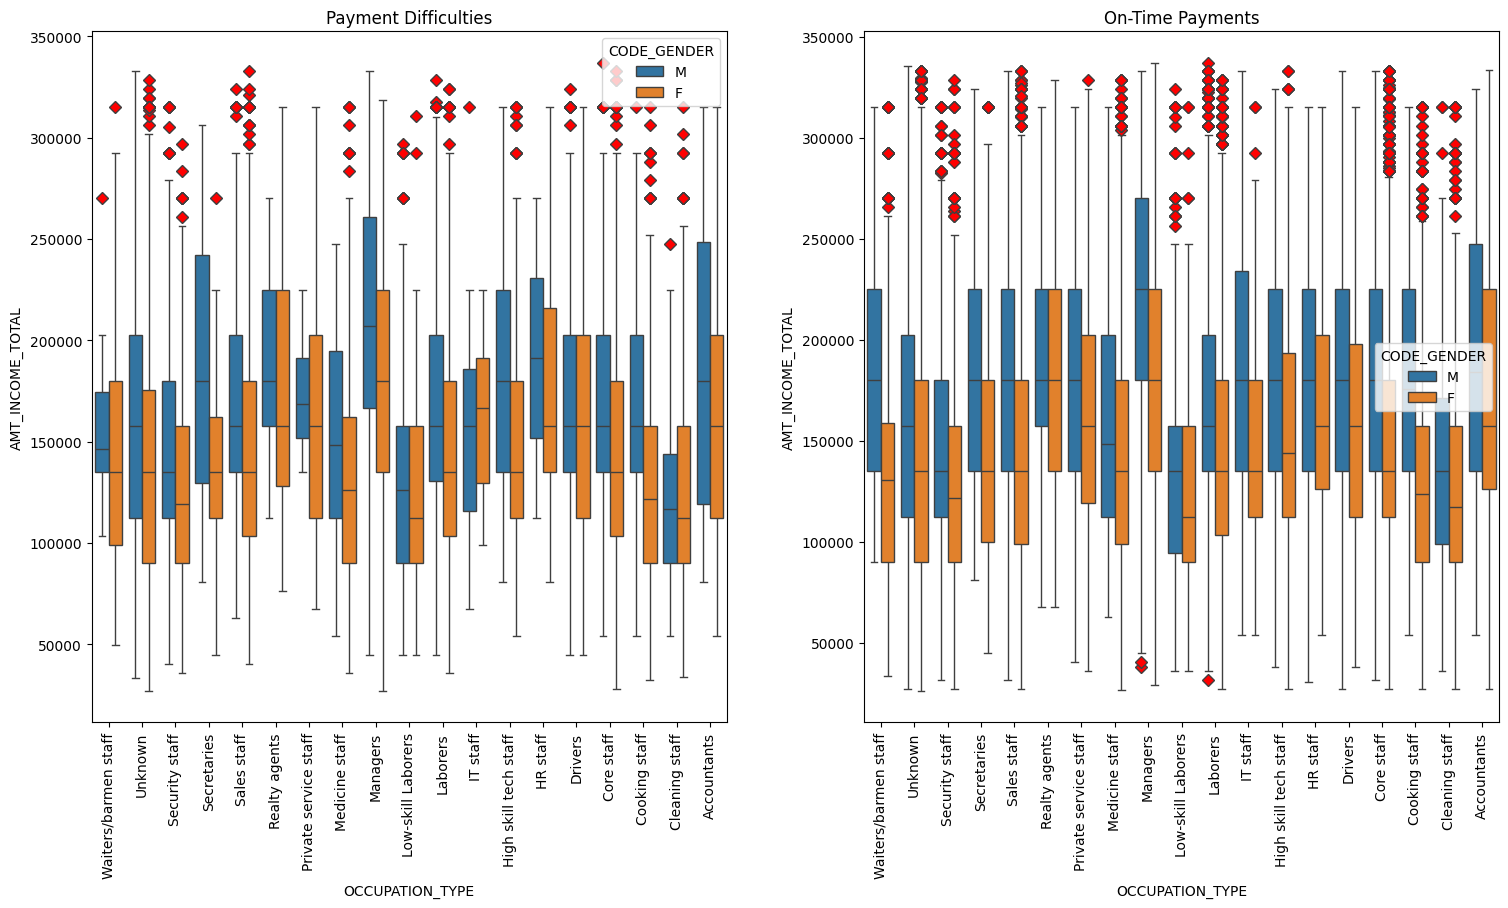

In [293]:
visualize_corr_analysis_for_triple_cat_cat_num('AMT_INCOME_TOTAL', 'OCCUPATION_TYPE', 'CODE_GENDER', df0, df1)

**Спостереження**
- Значних особливливостей не помiчено

## Категоріальні та категоріальні змінні

### Аналіз стовпців `NAME_INCOME_TYPE` vs `CODE_GENDER`

In [298]:
def bi_countplot_target(df0, df1, column, hue_column) :
    group_name = f'Нормалізований розподіл значень за категорією: {column}'
    print (group_name.upper())

    pltname = 'Клієнт зі складнощями щодо платності'
    unique_hue_values = df1[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,4)

    proportions = df1.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[0], title=pltname)

    # анотація значень в барплоті
    for container in ax.containers:
      ax. bar_label(container, fmt='{:,.1f}%')

    pltname = 'Клієнти зі своєчасними платежами'
    unique_hue_values = df0[hue_column].unique()

    proportions = df0.groupby(hue_column)[column].value_counts (normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
    by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[1], title=pltname)

    for container in ax.containers:
      ax.bar_label(container, fmt='{:,.1f}%')

    plt.show()

    #------------
    group_name = f'Кількість значень за категорією {column}'
    print(group_name.upper())

    pltname = 'Клієнт зі своєчасними платежами'
    unique_hue_values = df1[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,4)
    counts = df1.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
      by=unique_hue_values [0], ascending=False
      ).plot.bar(ax=axes [0], title=pltname )

    for container in ax.containers:
      ax.bar_label(container)

    pltname = 'Клієнти зі своєчасними платежами'
    unique_hue_values = df0[hue_column].unique()
    counts = df0.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values (
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[1], title=pltname)

    for container in ax. containers:
      ax.bar_label(container)

    plt.show()

НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_INCOME_TYPE


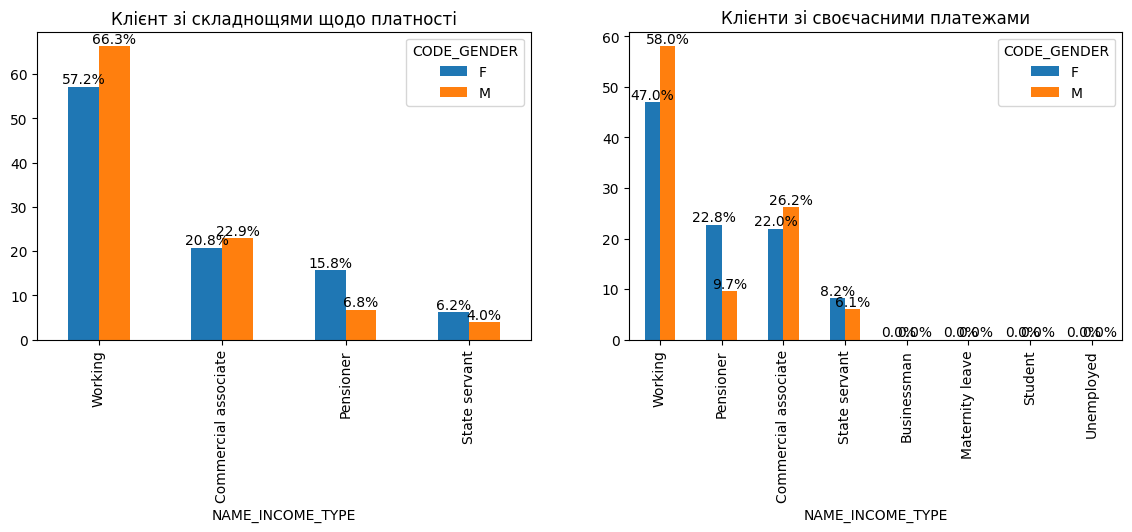

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ NAME_INCOME_TYPE


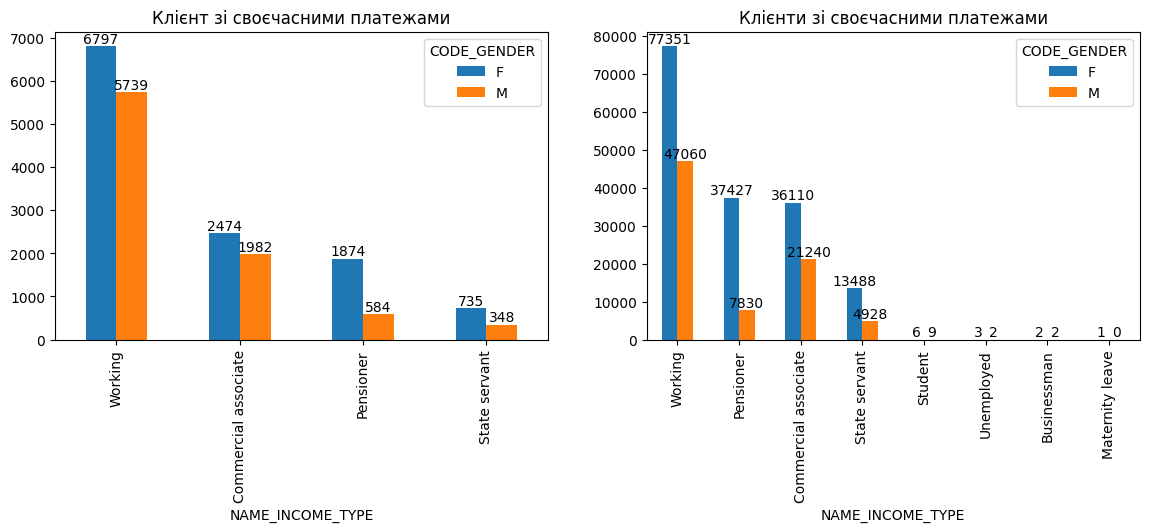

In [299]:
bi_countplot_target(df0, df1, 'NAME_INCOME_TYPE','CODE_GENDER')

**Спостереження**
- Клієнти категорії `Working` та `Male` мають більше труднощів з оплатою порівняно з тими, хто платить вчасно
- Клієнти категорії `Pensioner` та `Female` мають більше труднощів з оплатою порівняно з тими, хто платить вчасно
- Клієнти категорії `Businessman` та `Student` здійснюють платежі вчасно, хоча їхня історія невелика

# ДЗ 8. Аналіз взаємозалежностей між двома категоріальними змінними

Проведіть подібний до прикладу аналіз залежностей між категоріальними змінними для пар змінних

- NAME_EDUCATION_TYPE vs CODE_GENDER

Опціонально:
- NAME_FAMILY_STATUS vs OCCUPATION_TYPE
- OCCUPATION_TYPE vs NAME_CONTRACT_TYPE

Опишіть спостереження щодо того, чи є цікаві знахідки стосовно цільової змінної з цього аналізу.

### Аналіз стовпців `NAME_EDUCATION_TYPE` vs `CODE_GENDER`

НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_EDUCATION_TYPE


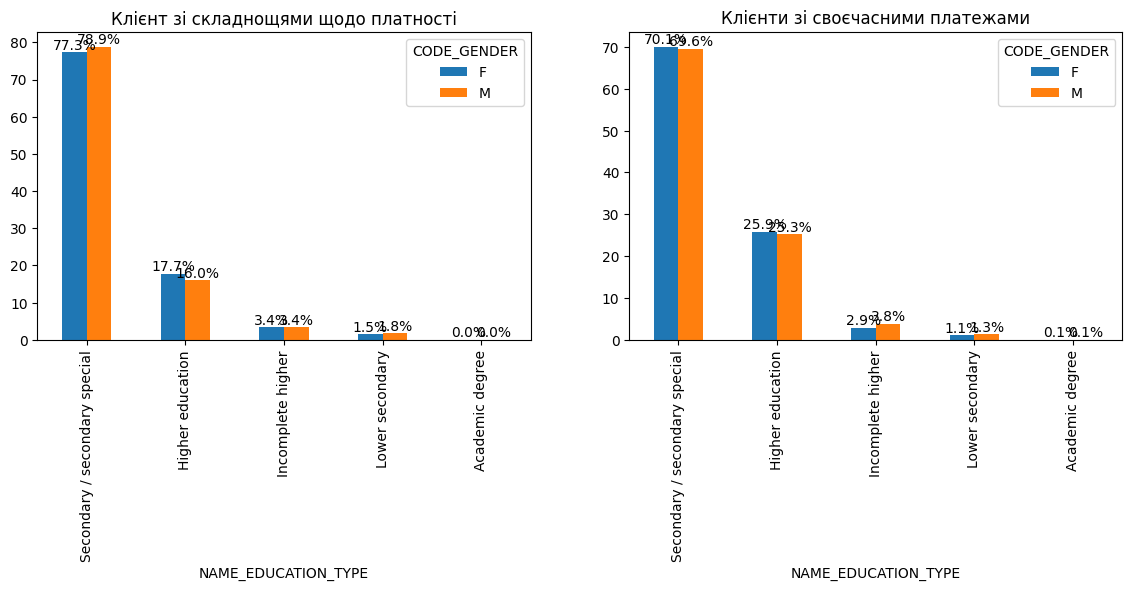

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ NAME_EDUCATION_TYPE


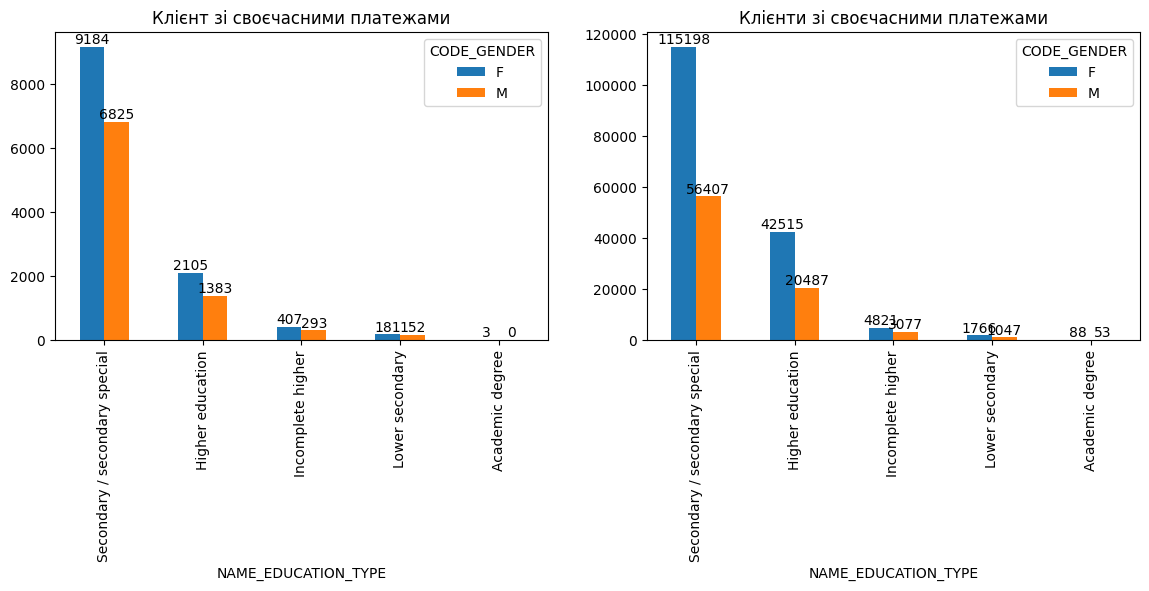

In [300]:
bi_countplot_target(df0, df1, 'NAME_EDUCATION_TYPE','CODE_GENDER')

***
# ДЗ 9. Висновок з проведеного аналізу
Напишіть Ваш висновок з проведеного ананлізу, яким категоріям осіб Ви б видали кредит? Категорія може бути, наприклад, люди з такою-то освітою, з таким-то доходом, з таким-то досвідом роботи.